In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy
import scipy.sparse as sp

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import sklearn.metrics
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import sklearn.svm
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer

from os import listdir, walk
from os.path import isfile, join, relpath

import scipy
from scipy.io import arff
# import arff
from io import StringIO
import math
from sklearn.utils import shuffle
from prettytable import PrettyTable

In [2]:
def svm_feature_imp(coef, names):   #this is for plotting  a bar graph 
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

In [3]:
def svm_feature(X,y):
    features_names = ["X0","X1","X2","X3","X4","X5","X6","X7","X8","X9","Y0","Y1","Y2","Y3","Y4","Y5","Y6","Y7","Y8","Y9","Z0","Z1","Z2","Z3","Z4","Z5","Z6","Z7","Z8","Z9","XAVG","YAVG","ZAVG","XPEAK","YPEAK","ZPEAK","XABSOLDEV","YABSOLDEV","ZABSOLDEV","XSTANDDEV","YSTANDDEV","ZSTANDDEV","RESULTANT"] 
    svm = sklearn.svm.SVC(kernel='linear')
    svm.fit(X, y.ravel())  #y.ravel is 1d array
    plt.figure(figsize=(20,10))
    names = svm_feature_imp(svm.coef_[0], features_names)

In [4]:
def calculate_cf(confusion_mat, i=0, to_print=True):        #this function shows the confusion matrix for all the activities 
    TP = confusion_mat[i,i]    #true positive
    FP = confusion_mat[:,i].sum() - TP    #false positive
    FN = confusion_mat[i,:].sum() - TP      #false negative
    TN = confusion_mat.sum().sum() - TP - FP - FN  #true negative
    return TP, FP, FN, TN

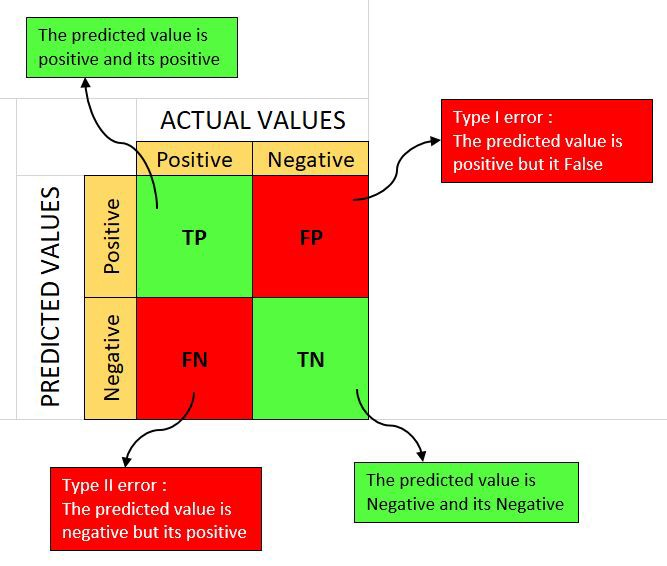

In [5]:
file_dict = {0 : "Phone Accel" , 1:"Watch Accel", 2:"Phone Gyro", 3:"Watch Gyro"}

In [6]:
# file1 = ["/content/drive/MyDrive/Data/transformed_data/phone/accel/" + f for f in listdir("/content/drive/MyDrive/Data/transformed_data/phone/accel/") if f.endswith('.csv')]
file2 = ["/content/drive/MyDrive/Data/transformed_data/watch/accel/" + f for f in listdir("/content/drive/MyDrive/Data/transformed_data/watch/accel/") if f.endswith('.csv')]
# file3 = ["/content/drive/MyDrive/Data/transformed_data/phone/gyro/" + f for f in listdir("/content/drive/MyDrive/Data/transformed_data/phone/gyro/") if f.endswith('.csv')]
file4 = ["/content/drive/MyDrive/Data/transformed_data/watch/gyro/" + f for f in listdir("/content/drive/MyDrive/Data/transformed_data/watch/gyro/") if f.endswith('.csv')]

In [8]:
files = [file2] + [file4]


In [9]:
files

[['/content/drive/MyDrive/Data/transformed_data/watch/accel/data_1609_accel_watch.csv',
  '/content/drive/MyDrive/Data/transformed_data/watch/accel/data_1606_accel_watch.csv',
  '/content/drive/MyDrive/Data/transformed_data/watch/accel/data_1608_accel_watch.csv',
  '/content/drive/MyDrive/Data/transformed_data/watch/accel/data_1604_accel_watch.csv',
  '/content/drive/MyDrive/Data/transformed_data/watch/accel/data_1602_accel_watch.csv',
  '/content/drive/MyDrive/Data/transformed_data/watch/accel/data_1603_accel_watch.csv',
  '/content/drive/MyDrive/Data/transformed_data/watch/accel/data_1605_accel_watch.csv',
  '/content/drive/MyDrive/Data/transformed_data/watch/accel/data_1601_accel_watch.csv',
  '/content/drive/MyDrive/Data/transformed_data/watch/accel/data_1607_accel_watch.csv',
  '/content/drive/MyDrive/Data/transformed_data/watch/accel/data_1600_accel_watch.csv',
  '/content/drive/MyDrive/Data/transformed_data/watch/accel/data_1621_accel_watch.csv',
  '/content/drive/MyDrive/Data/t

There are intotal 18 activities

In [10]:
activity_names = {'A': 'Walking', 'B': 'Jogging', 'C': 'Stairs', 'D': 'Sitting', 'E': 'Standing', 'F': 'Typing', 'G': 'Brushing Teeth', 'H': 'Eating Soup', 'I': 'Eating Chips', 'J': 'Eating Pasta', 'K': 'Drinking from Cup', 'L': 'Eating Sandwich', 'M': 'Kicking Soccer Ball', 'O': 'Playing Catch w/Tennis Ball', 'P': 'Dribbling (Basketball)', 'Q': 'Writing', 'R': 'Clapping', 'S': 'Folding Clothes'}

In [11]:
activity_names


{'A': 'Walking',
 'B': 'Jogging',
 'C': 'Stairs',
 'D': 'Sitting',
 'E': 'Standing',
 'F': 'Typing',
 'G': 'Brushing Teeth',
 'H': 'Eating Soup',
 'I': 'Eating Chips',
 'J': 'Eating Pasta',
 'K': 'Drinking from Cup',
 'L': 'Eating Sandwich',
 'M': 'Kicking Soccer Ball',
 'O': 'Playing Catch w/Tennis Ball',
 'P': 'Dribbling (Basketball)',
 'Q': 'Writing',
 'R': 'Clapping',
 'S': 'Folding Clothes'}

In [16]:
my_list = data.columns.values.tolist()

print (my_list)

['ACTIVITY', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'Y0', 'Y1', 'Y2', 'Y3', 'Y4', 'Y5', 'Y6', 'Y7', 'Y8', 'Y9', 'Z0', 'Z1', 'Z2', 'Z3', 'Z4', 'Z5', 'Z6', 'Z7', 'Z8', 'Z9', 'XAVG', 'YAVG', 'ZAVG', 'XPEAK', 'YPEAK', 'ZPEAK', 'XABSOLDEV', 'YABSOLDEV', 'ZABSOLDEV', 'XSTANDDEV', 'YSTANDDEV', 'ZSTANDDEV', 'XVAR', 'YVAR', 'ZVAR', 'XMFCC0', 'XMFCC1', 'XMFCC2', 'XMFCC3', 'XMFCC4', 'XMFCC5', 'XMFCC6', 'XMFCC7', 'XMFCC8', 'XMFCC9', 'XMFCC10', 'XMFCC11', 'XMFCC12', 'YMFCC0', 'YMFCC1', 'YMFCC2', 'YMFCC3', 'YMFCC4', 'YMFCC5', 'YMFCC6', 'YMFCC7', 'YMFCC8', 'YMFCC9', 'YMFCC10', 'YMFCC11', 'YMFCC12', 'ZMFCC0', 'ZMFCC1', 'ZMFCC2', 'ZMFCC3', 'ZMFCC4', 'ZMFCC5', 'ZMFCC6', 'ZMFCC7', 'ZMFCC8', 'ZMFCC9', 'ZMFCC10', 'ZMFCC11', 'ZMFCC12', 'XYCOS', 'XZCOS', 'YZCOS', 'XYCOR', 'XZCOR', 'YZCOR', 'RESULTANT', 'class']


In [17]:
# The “WISDM (Wireless Sensor Data Mining) Smartphone and Smartwatch Activity and Biometrics
# Dataset” [19] include data collected from 51 subjects, each of whom were asked to do 18 tasks for 3 minutes
# each. Each subject had a smartwatch placed on his/her dominant hand and a smartphone in their pocket.

In [13]:
# XYCOR: XY correlation

In [15]:
data

,ACTIVITY,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT,class
0,A,0.055,0.505,0.290,0.130,0.020,0.000,0.0,0.0,0.0,...,0.382641,0.377724,-0.656217,0.434751,-0.872423,-0.668576,0.435833,-0.878156,3.51984,1603
1,A,0.020,0.570,0.265,0.130,0.015,0.000,0.0,0.0,0.0,...,0.363604,0.358932,-0.632414,0.364342,-0.849677,-0.643642,0.364239,-0.857211,3.14816,1603
2,A,0.000,0.555,0.355,0.090,0.000,0.000,0.0,0.0,0.0,...,0.336407,0.332084,-0.690561,0.480337,-0.925224,-0.692707,0.480374,-0.926390,2.83716,1603
3,A,0.000,0.550,0.395,0.055,0.000,0.000,0.0,0.0,0.0,...,0.338357,0.334009,-0.750005,0.554306,-0.929674,-0.750952,0.553272,-0.930165,2.83077,1603
4,A,0.005,0.580,0.365,0.050,0.000,0.000,0.0,0.0,0.0,...,0.347129,0.342669,-0.786819,0.623637,-0.926564,-0.789724,0.623637,-0.929687,2.88730,1603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,S,0.100,0.455,0.320,0.100,0.020,0.005,0.0,0.0,0.0,...,0.354758,0.350199,-0.004796,-0.187161,0.079604,-0.005191,-0.185179,0.082034,2.37405,1649
321,S,0.055,0.520,0.320,0.070,0.035,0.000,0.0,0.0,0.0,...,0.340473,0.336098,-0.265055,-0.136352,0.148563,-0.268891,-0.136287,0.151572,2.22455,1649
322,S,0.095,0.445,0.350,0.080,0.030,0.000,0.0,0.0,0.0,...,0.391628,0.386596,-0.242185,-0.083276,0.140260,-0.243695,-0.083529,0.139776,2.54527,1649
323,S,0.040,0.490,0.380,0.050,0.040,0.000,0.0,0.0,0.0,...,0.361245,0.356603,-0.397367,-0.066541,0.154574,-0.399071,-0.069303,0.154570,2.02115,1649


(18211, 93)
[1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650]
Subject ID 1600:


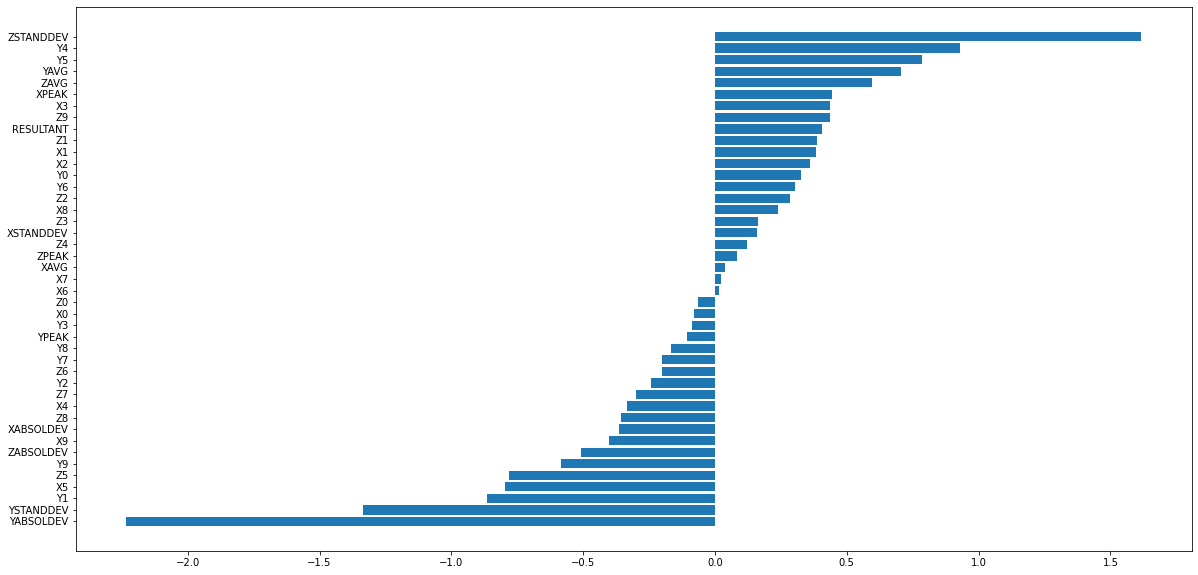

[[10  0  0  0  0  0  0  0  0  0  0  0  0  8  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0]
 [ 9  0  0  0  0  0  0  0  0  0  0  0  9  0  0  0  0  0]
 [12  0  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0]
 [14  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0]
 [13  0  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0]
 [16  1  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [20  0  0  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


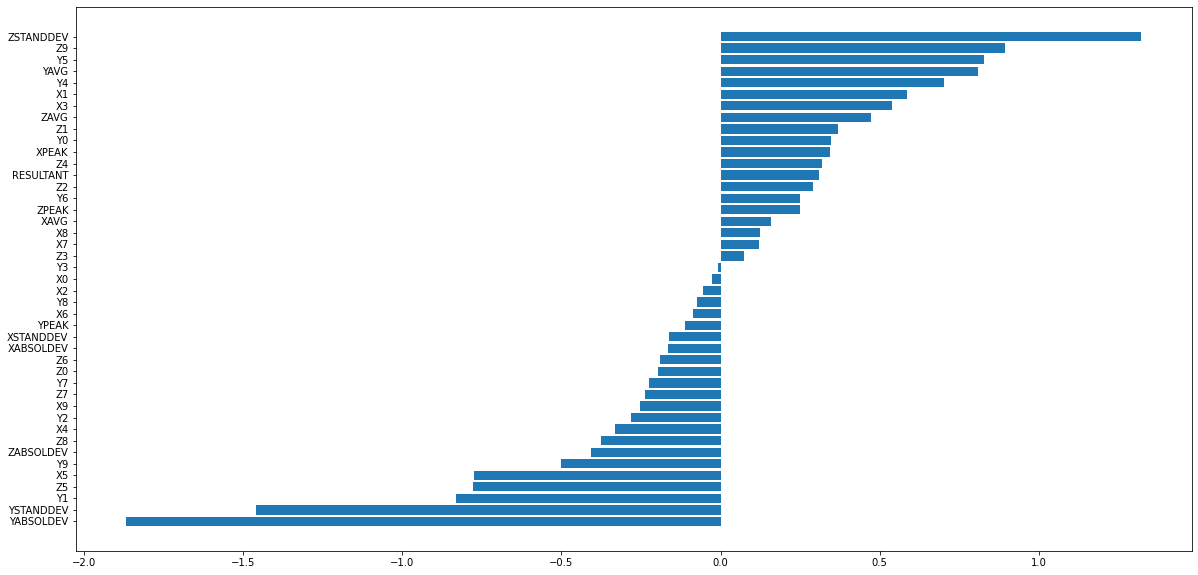

[[15  0  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0  0  0  0 14  0  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0]
 [15  0  1  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0]
 [13  0  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0]
 [14  0  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [10  0  0  0  0  0  0  0  0  0  0  0  4  4  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


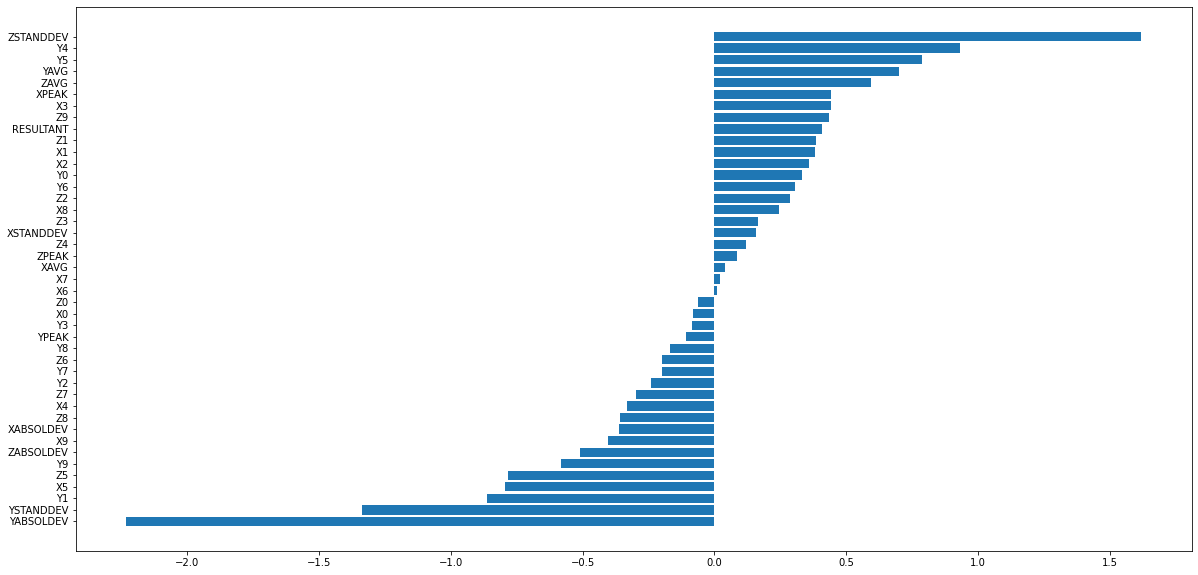

[[17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0  0  0  0 14  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 5  0  0  0  0  0  0  0  0  0  0  0  0 13  0  0  0  0]
 [13  2  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


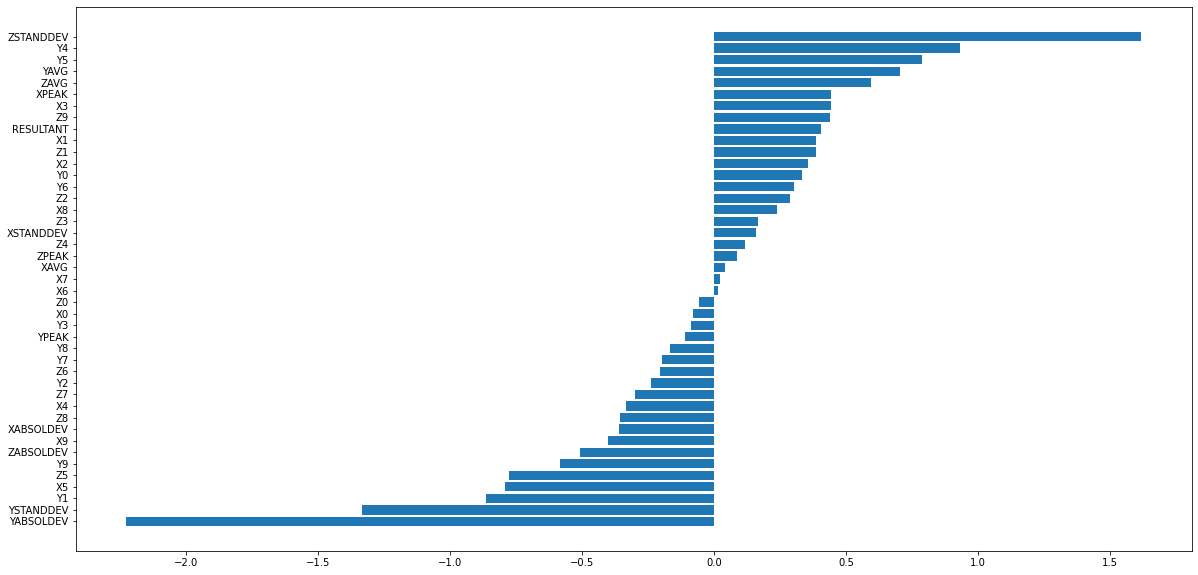

[[16  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [12  0  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0  0 15  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [13  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [11  0  0  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


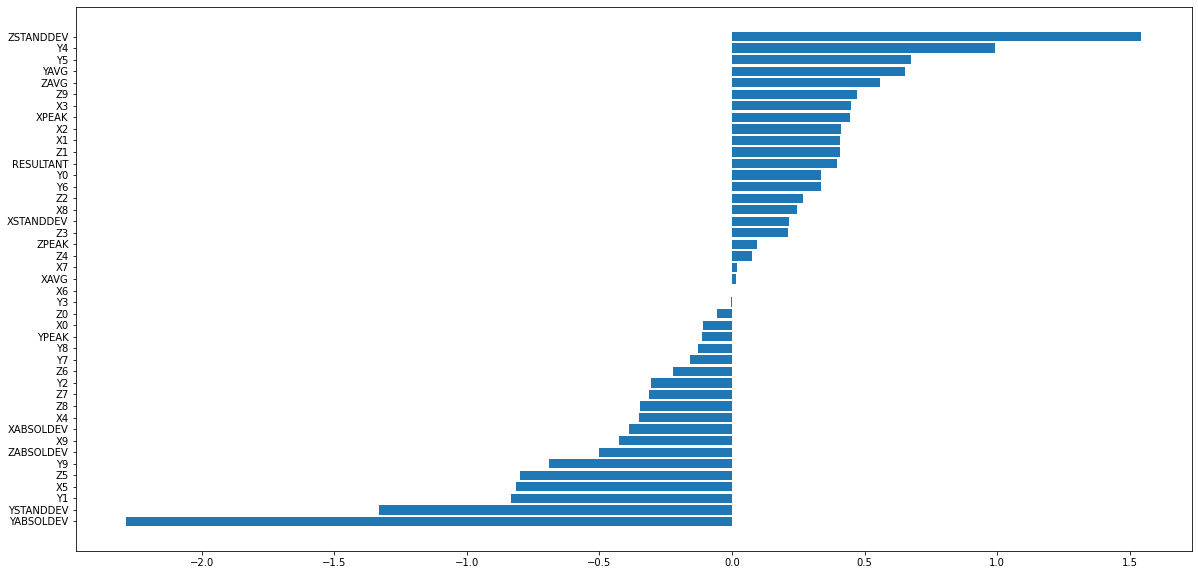

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [14  0  0  0  0  0  0  0  0  0  0  0  1  0  3  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  1  1  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [13  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0]
 [ 3  1  0  0  0  0  0  0  0  0  0  0  0 14  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


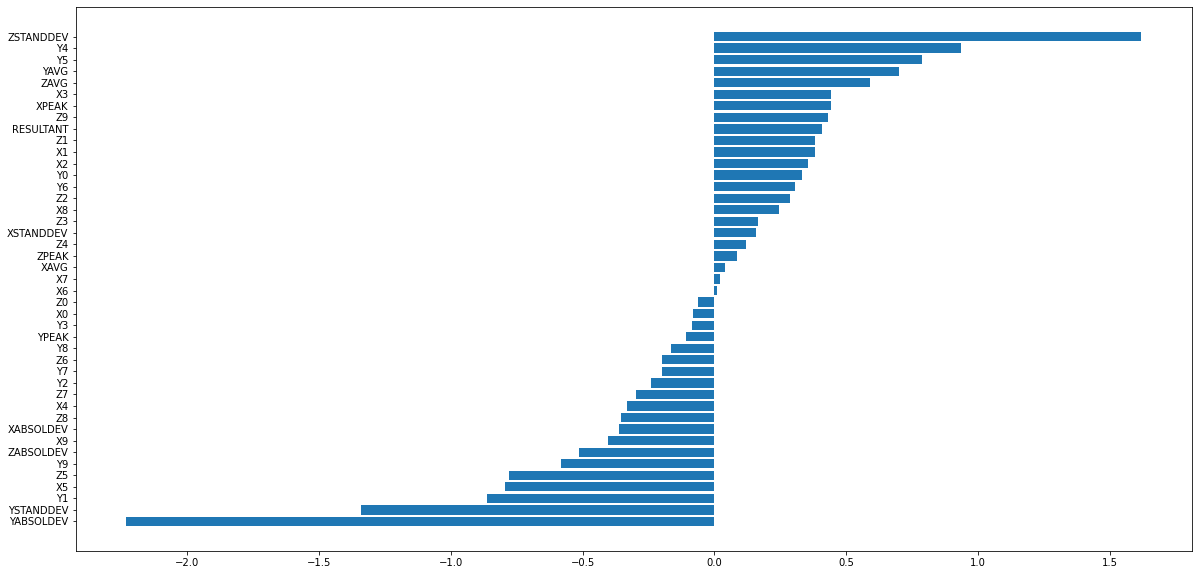

[[15  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 7  0  0  0  0  0  0  0  0  0  0  0  0 11  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [22  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


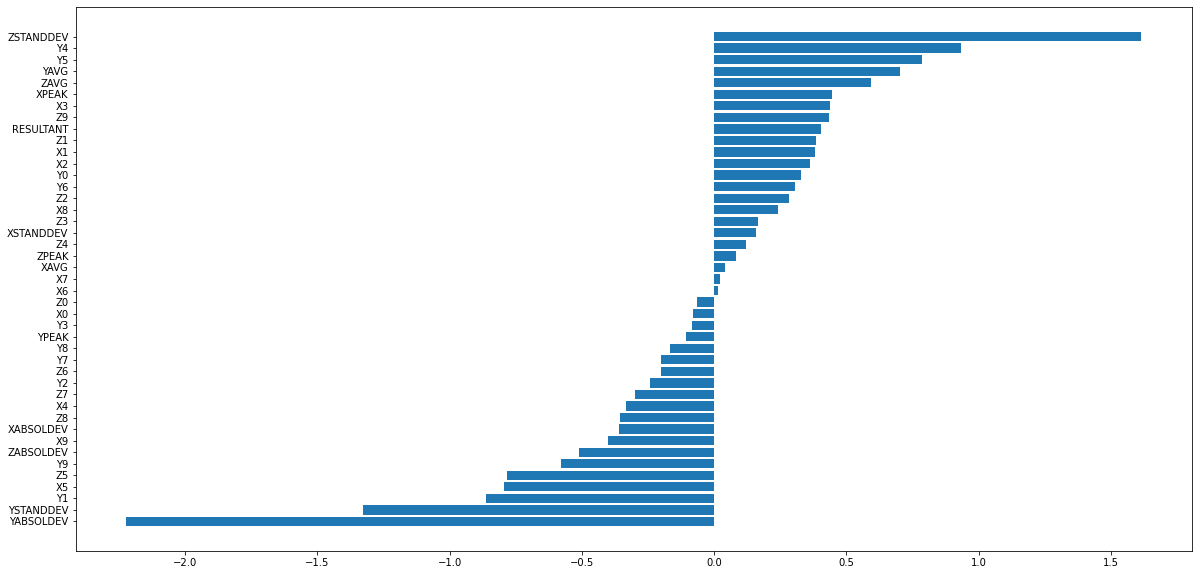

[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [14  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [10  0  0  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  0  0  0  0  1 11  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [14  1  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


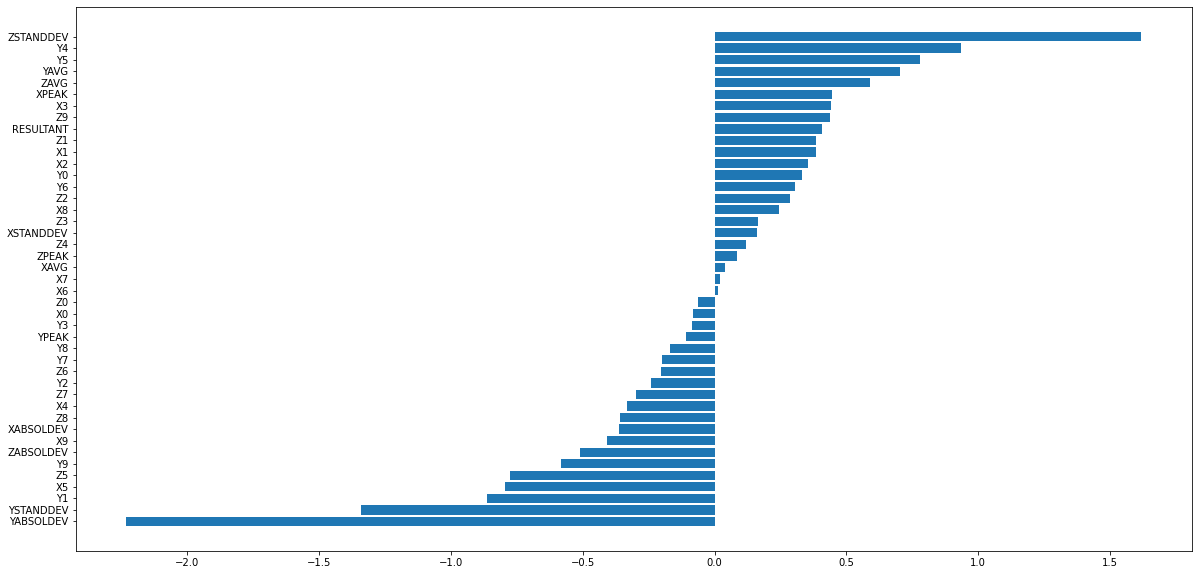

[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [10  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [12  0  0  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0  0  0  0 13  1  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0]
 [ 7  0  0  0  0  0  0  0  0  0  0  0  0 11  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  1  2  0  0  0  0]
 [13  0  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [ 5  0  0  0  0  0  0  0  0  0  0  0  2 16  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


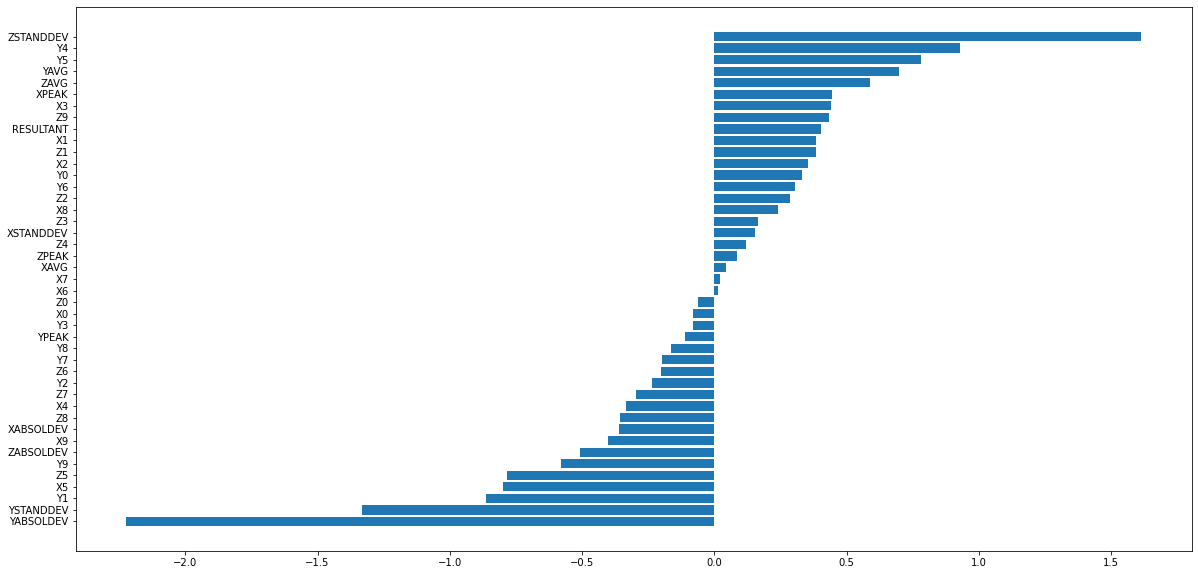

[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [13  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0  0 15  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  1  1  0  0  0  0]
 [29  0  0  0  0  0  0  0  0  0  0  0  3  2  0  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0  0  0  0  1  9  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [11  2  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


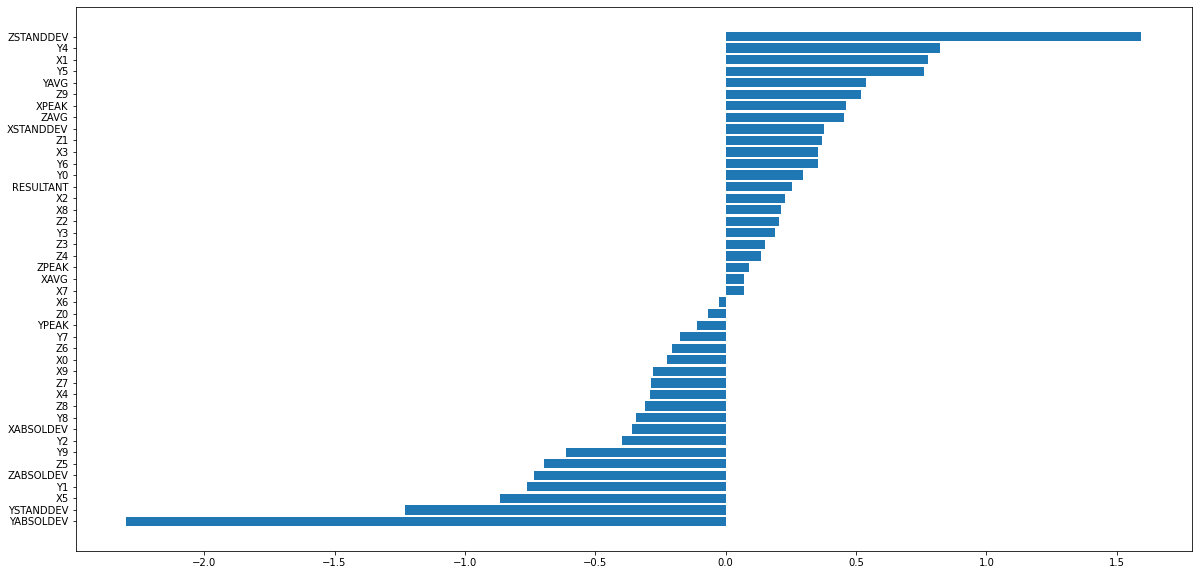

[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 5 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [13  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [21  1  0  0  0  0  0  0  0  0  0  0  0  8  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [22  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0]
 [16  2  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


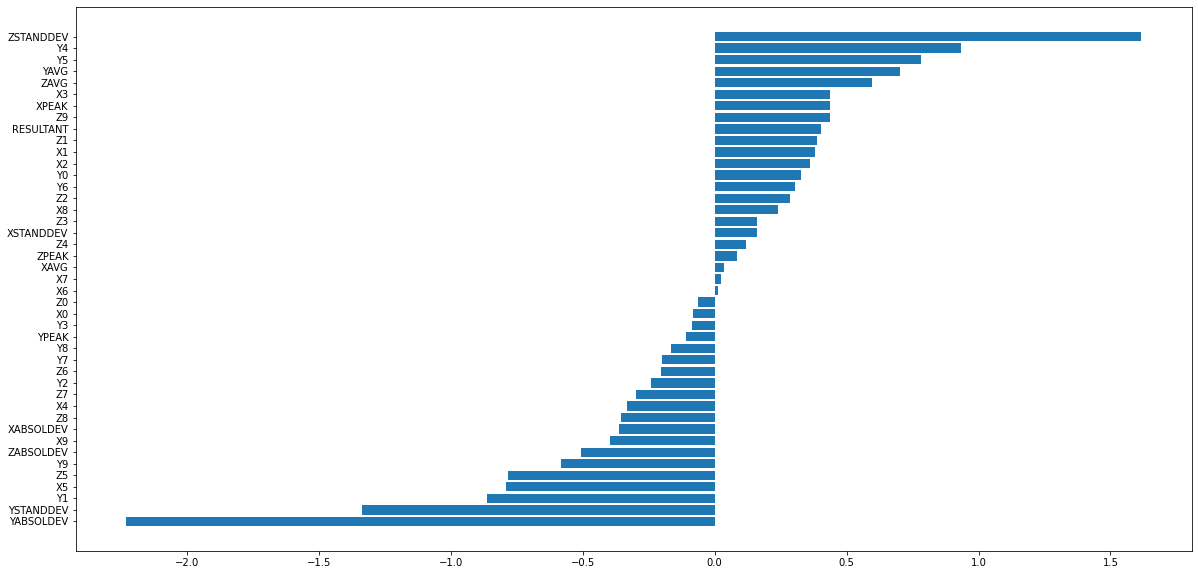

[[13  0  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0  0 15  0  0  0  0]
 [13  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [10  0  0  0  0  0  0  0  0  0  0  0  3  5  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0 16  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


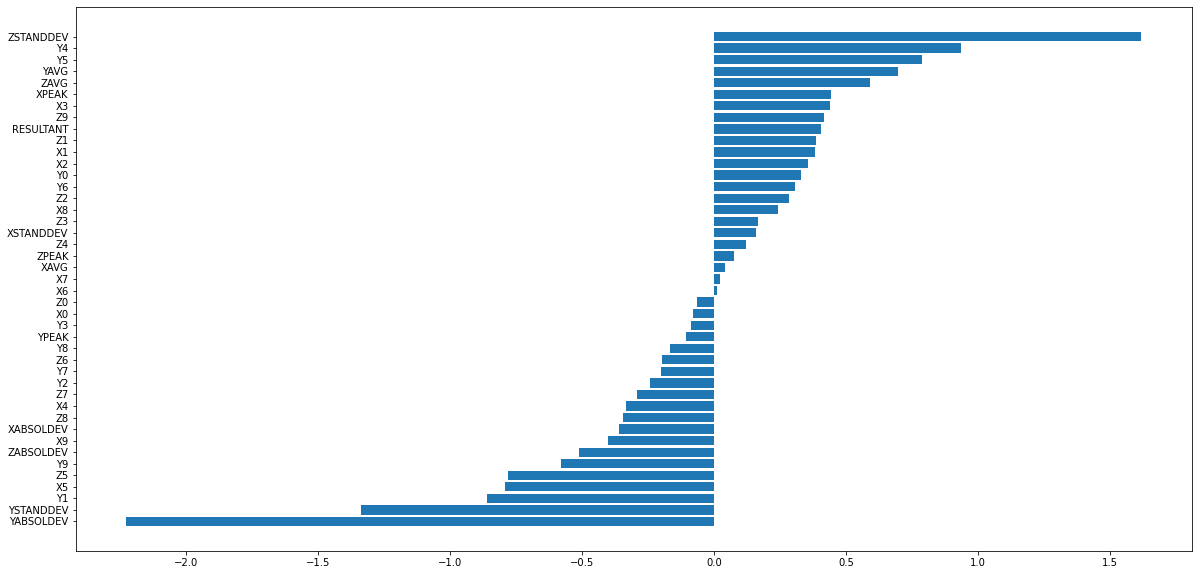

[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [16  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [13  0  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [13  0  0  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0 14  1  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [13  0  0  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


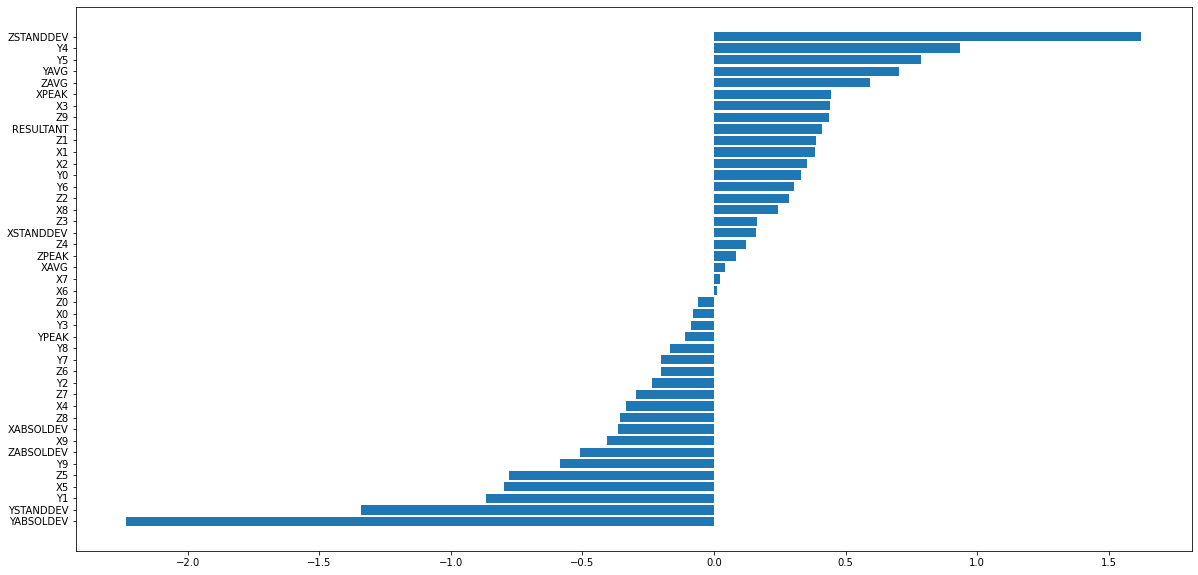

[[16  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [12  0  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 7  0  0  0  0  0  0  0  0  0  0  0  0  0 11  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0 16  1  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0]
 [ 7  0  0  0  0  0  0  0  0  0  0  0  0 11  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  0  3  2  0  0  0]
 [11  0  0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [16  0  1  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [13  0  0  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


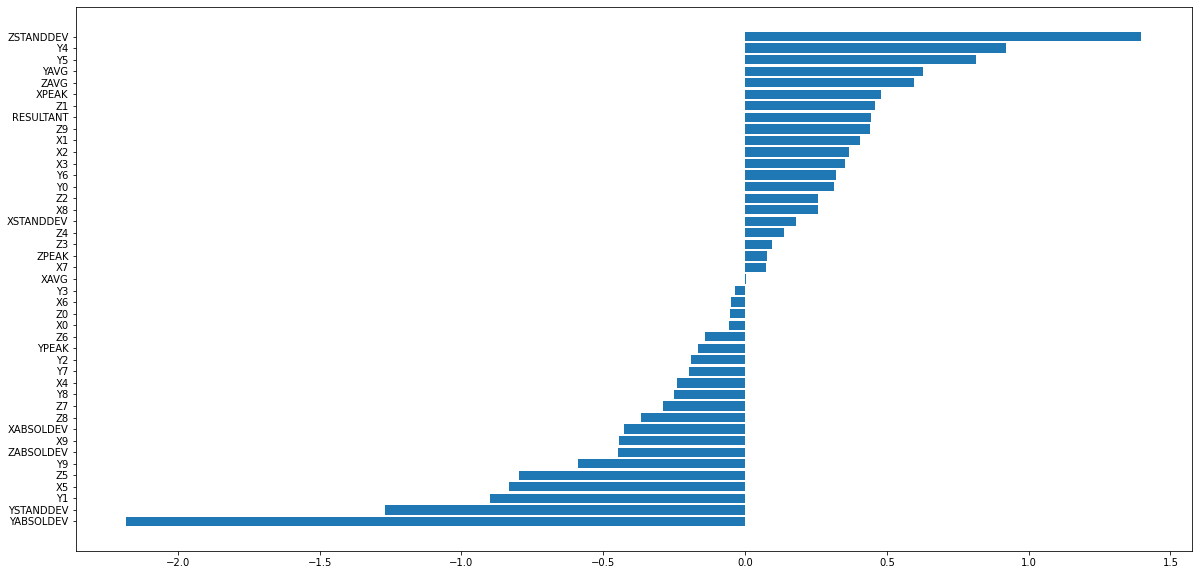

[[11  0  0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0]
 [ 5  0  0  0  0  0  0  0  0  0  0  0  0 13  0  0  0  0]
 [12  0  0  0  0  0  0  0  0  0  0  0  2  4  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0  0  0 14  0  0  0  0  0]
 [11  0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [14  0  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [12  0  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [13  0  0  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


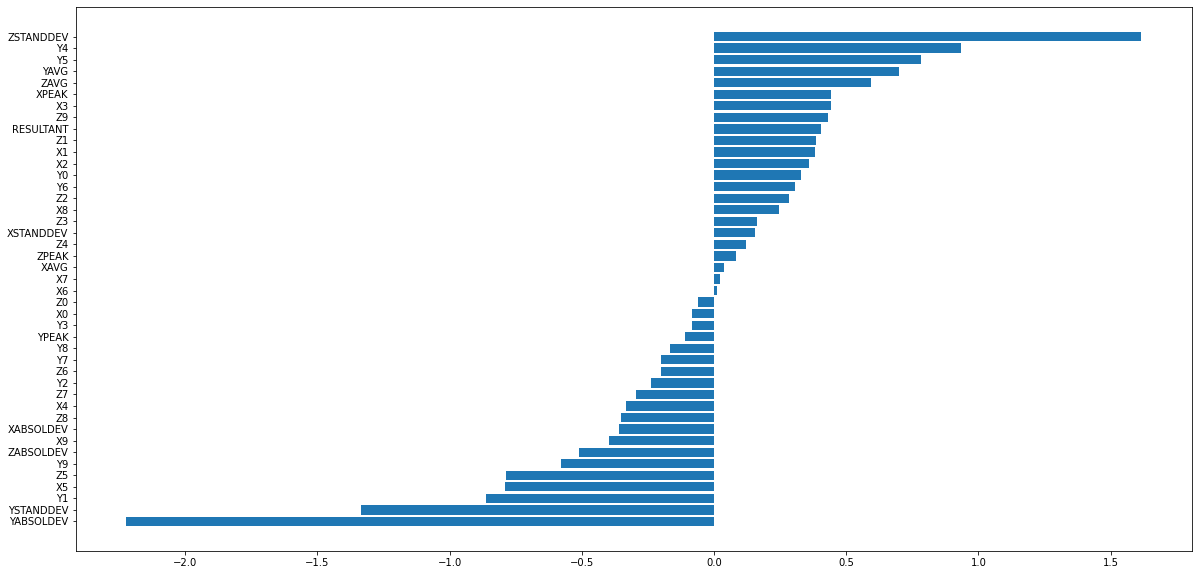

[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0]
 [14  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0]
 [14  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [14  0  0  0  0  0  0  0  0  0  0  0  3  0  1  0  0  0]
 [14  0  0  0  0  0  0  0  0  0  0  0  3  0  1  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [13  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [13  2  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


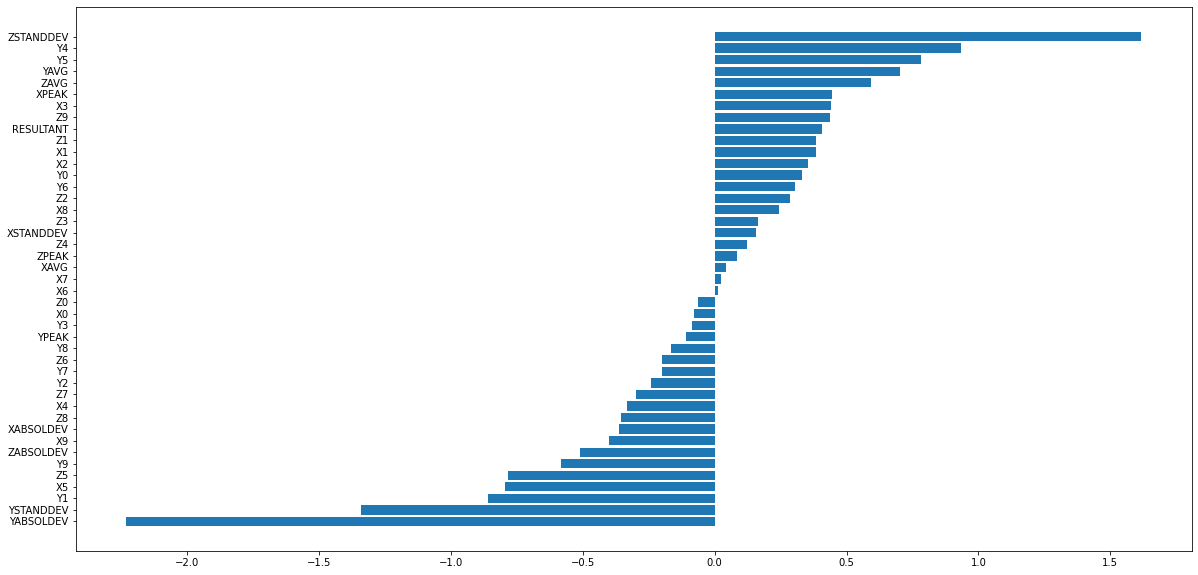

[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 5  0  0  0  0  0  0  0  0  0  0  0  0 13  0  0  0]
 [14  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0]
 [13  0  0  0  0  0  0  0  0  0  0  0  2  3  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0]
 [14  0  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0]
 [10  0  0  0  0  0  0  0  0  0  0  0  0  8  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 9  0  0  0  0  0  0  0  0  0  0  0  8  0  1  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.07   

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


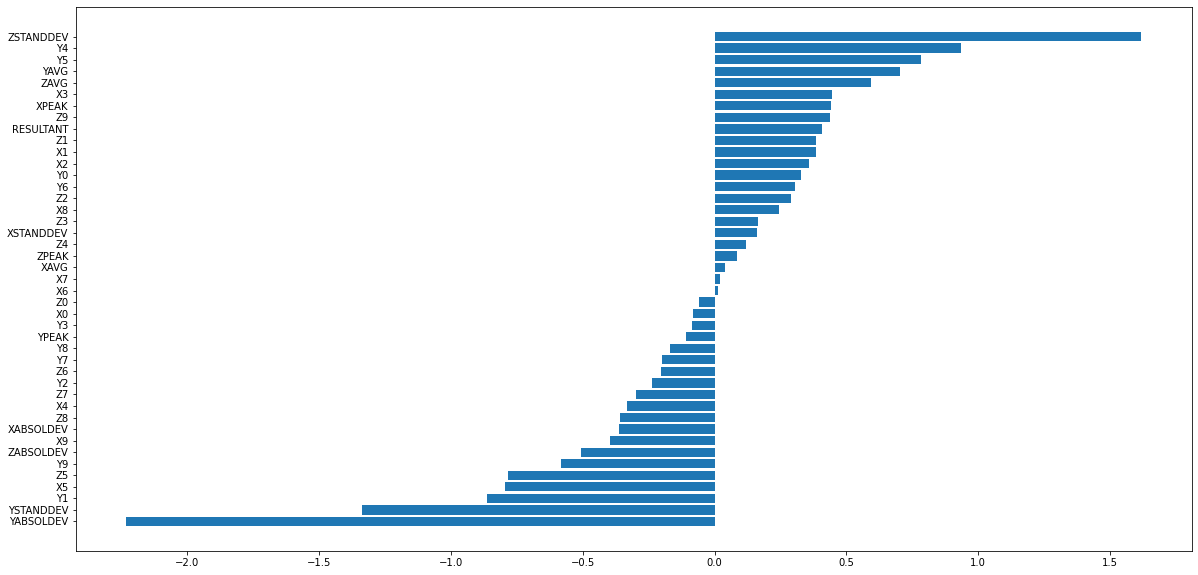

[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [14  0  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0]
 [10  0  1  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  5  0 11  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [14  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [12  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0]
 [14  0  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0 16  0  0  0  0]
 [10  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [10  0  0  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0]
 [12  0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


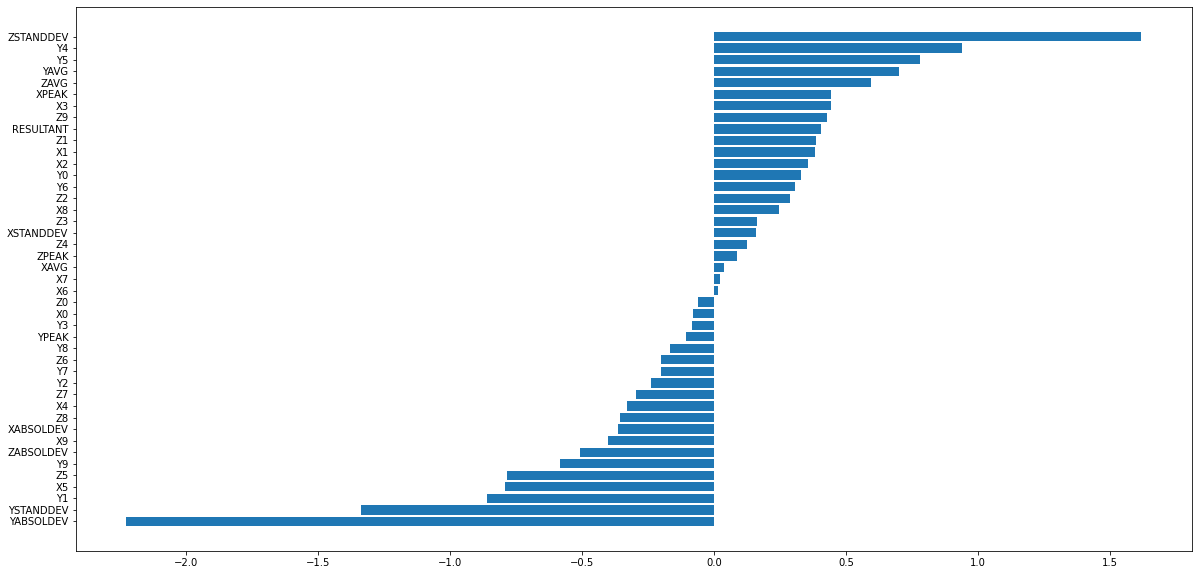

[[17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  0  0  0  0 12  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0]
 [10  0  0  0  0  0  0  0  0  0  0  0  7  0  1  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]]
              precision    recall  f1-score   support

           0       0.06   

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


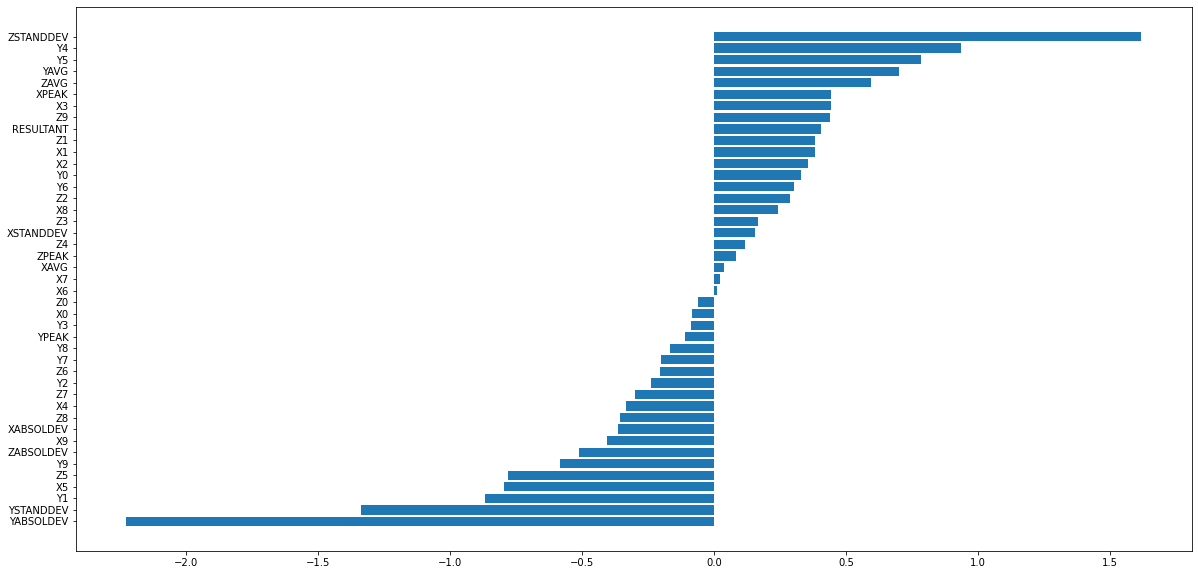

[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [16  1  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0  0 15  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 5  0  0  0  0  0  0  0  0  0  0  0  0  0 13  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [12  0  0  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


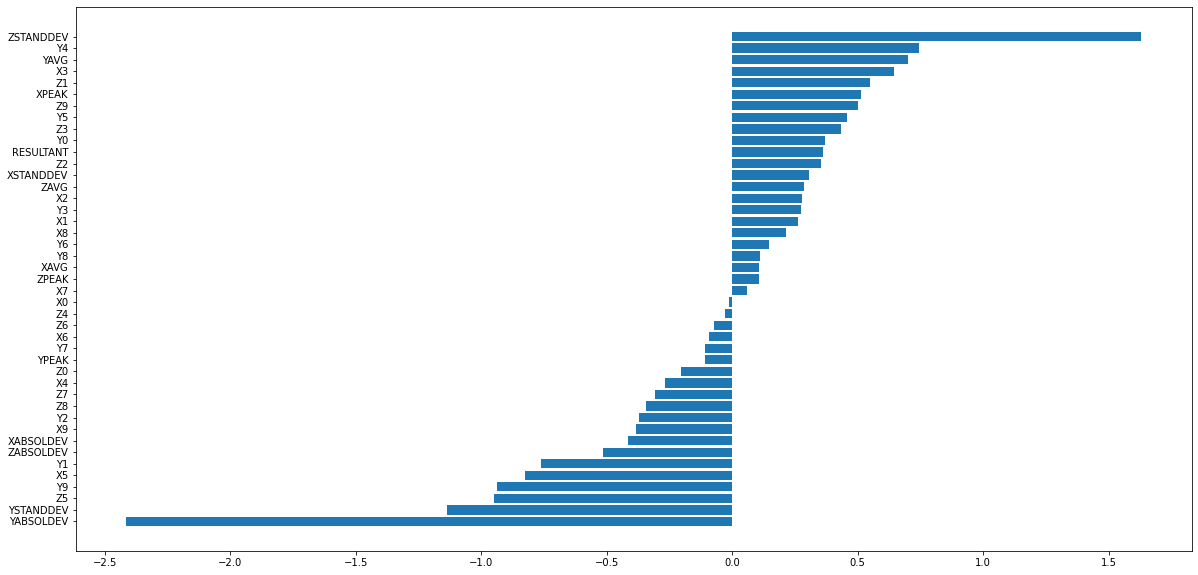

[[12  0  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0]
 [ 7  0  0  0  0  0  0  0  0  0  0  0  0 11  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0  0  0  0 14  0  0  0  0]
 [14  0  0  0  0  0  0  0  0  0  0  0  0  2  2  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0]
 [14  0  0  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0  0 15  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [22  0  0  0  0  0  0  0  0  0  0  0  2  5  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 5  0  0  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


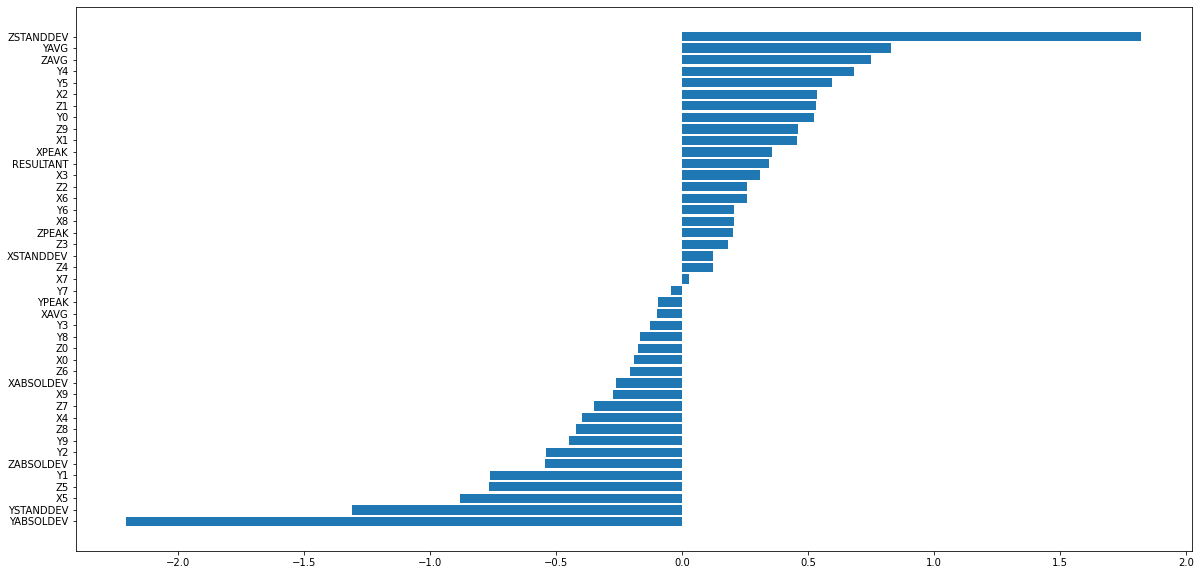

[[17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [11  0  0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0]
 [21  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [28  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [11  0  0  0  0  0  0  0  0  0  0  0  0  3  4  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [12  0  0  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


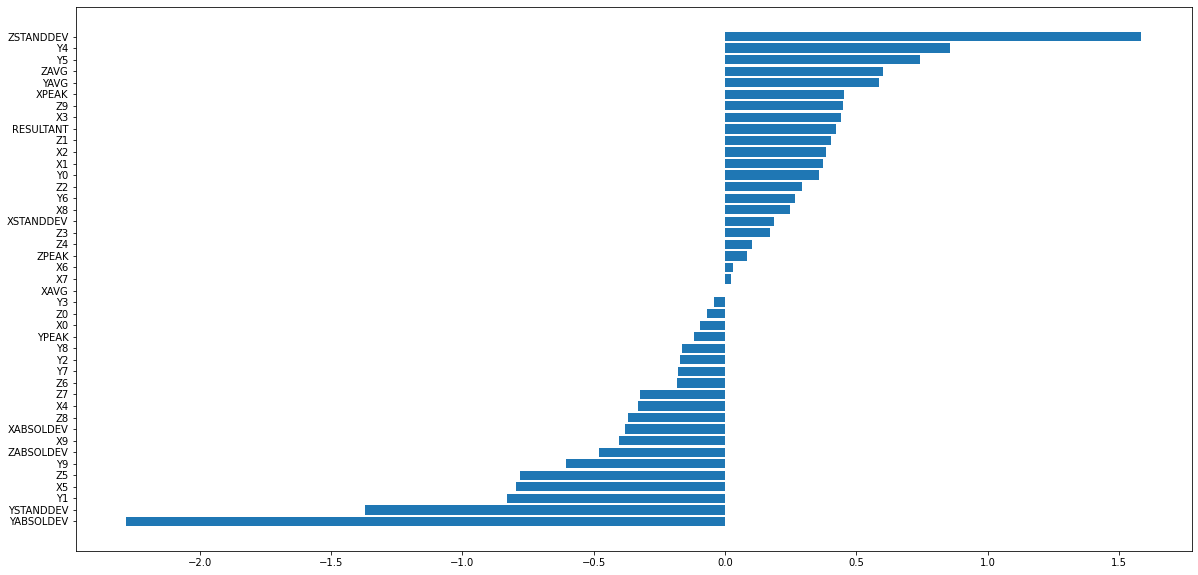

[[12  0  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0]
 [16  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0]
 [10  0  0  0  0  0  0  0  0  0  0  0  0  8  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0  4 11  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [12  0  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [12  0  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


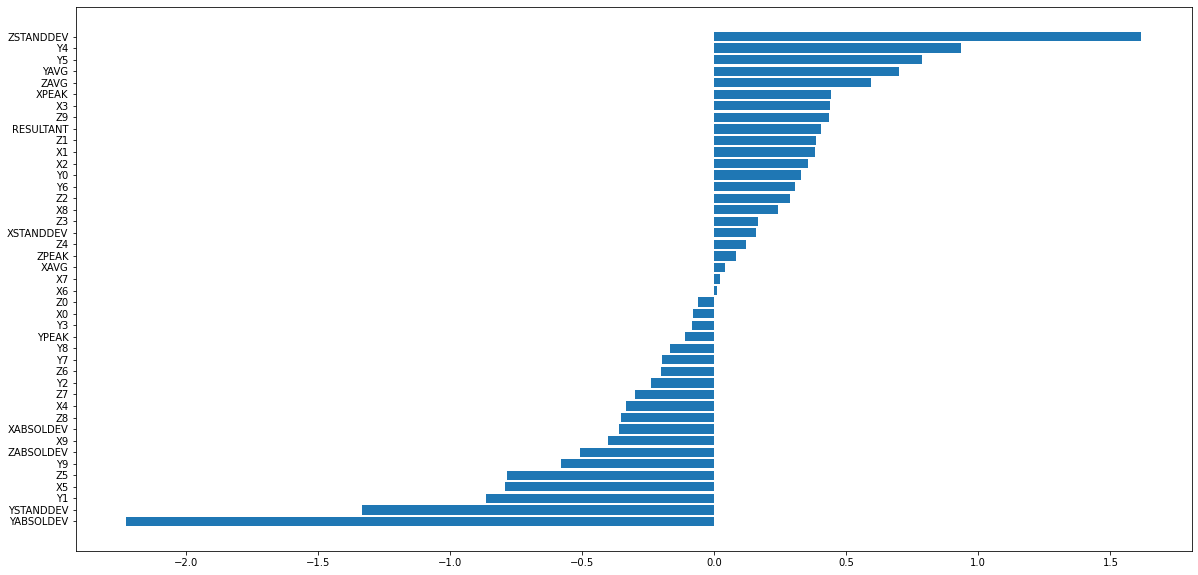

[[17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0  0 15  0  0  0  0]
 [13  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [14  0  0  0  0  0  0  0  0  0  0  0  0  3  1  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [13  0  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


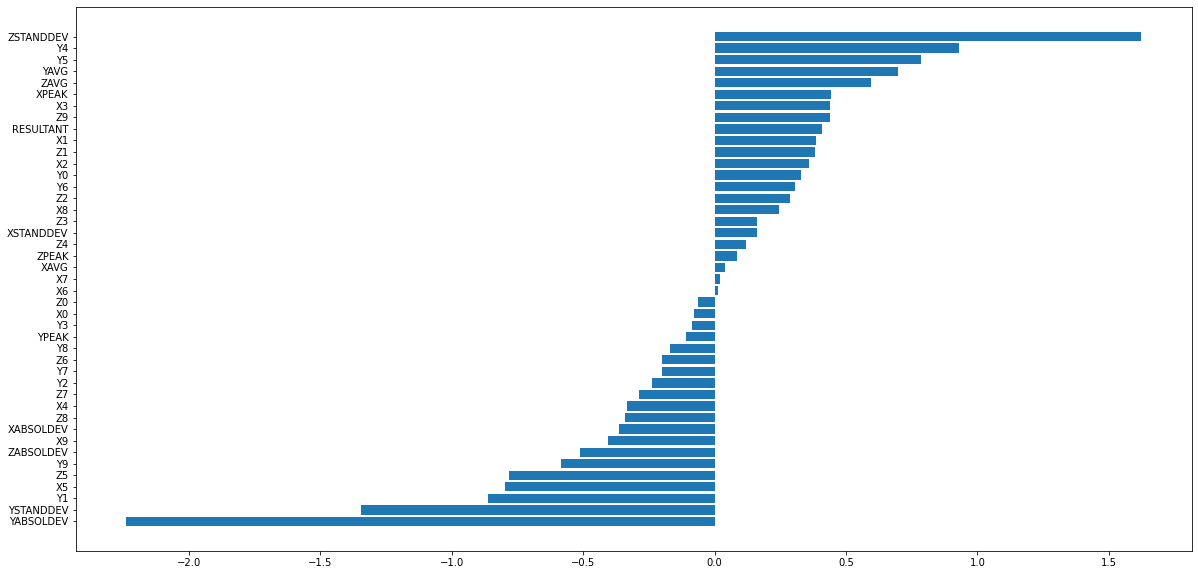

[[16  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [11  0  0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [12  0  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  8  1  8  0  0  0]
 [14  0  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0  0  0  0 14  0  0  0  0]
 [11  0  0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  3 15  0  0  0  0]
 [35  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


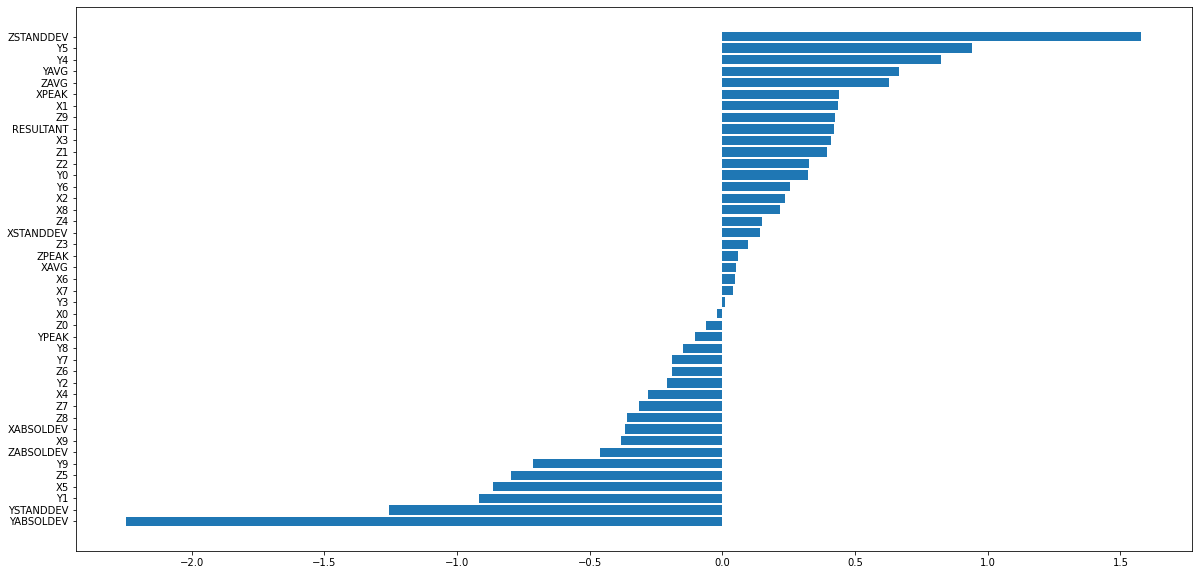

[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [10  7  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0]
 [ 7  0  0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [14  0  0  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [12  0  0  0  0  0  0  0  0  0  0  0  0 15  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


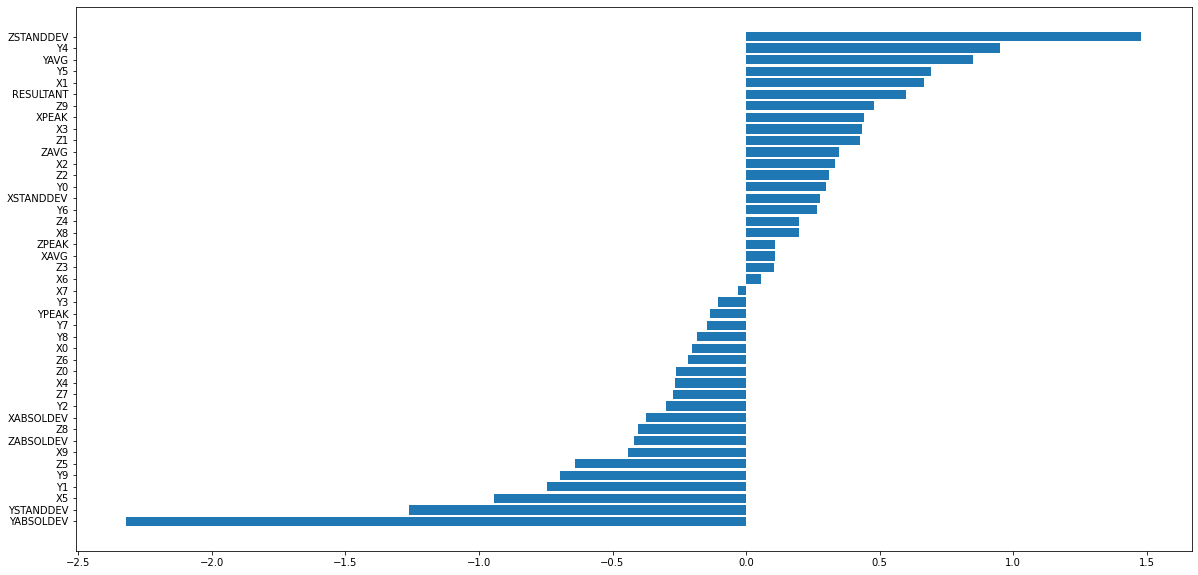

[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 6  9  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0  0  0  0 14  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [ 5  0  0  0  0  0  0  0  0  0  0  0  0 13  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 13  5  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0 14  2  0  0  0]
 [30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 9  0  0  0  0  0  0  0  0  0  0  0  0  0  9  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [14  0  0  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


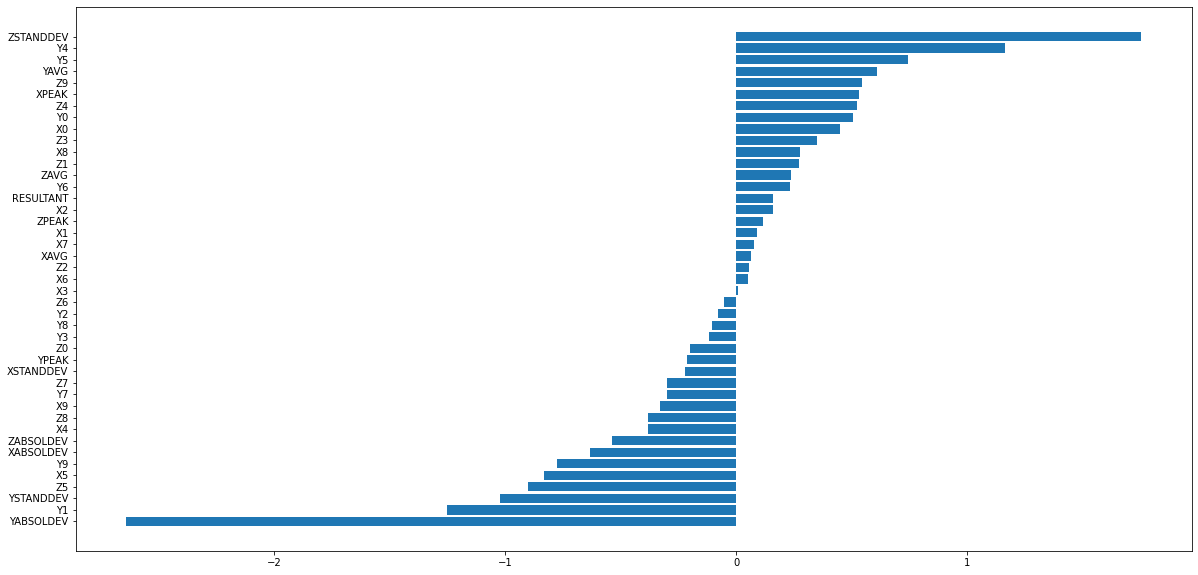

[[17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [13  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [10  0  0  0  0  0  0  0  0  0  0  0  0  8  0  0  0  0]
 [12  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  4  6  8  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0]
 [16  0  0  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


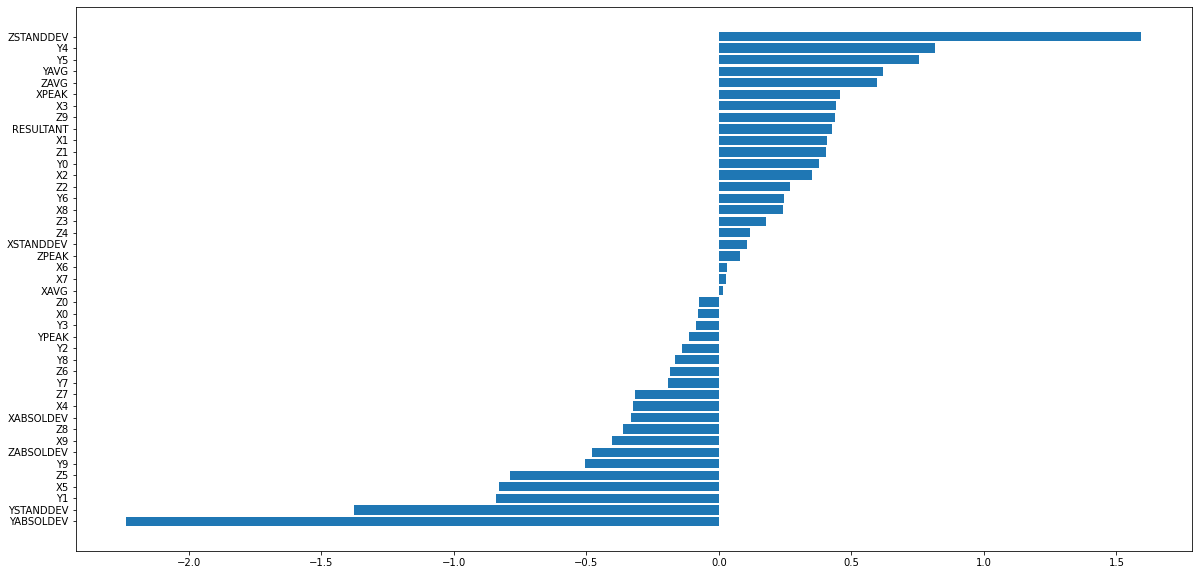

[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [13  0  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


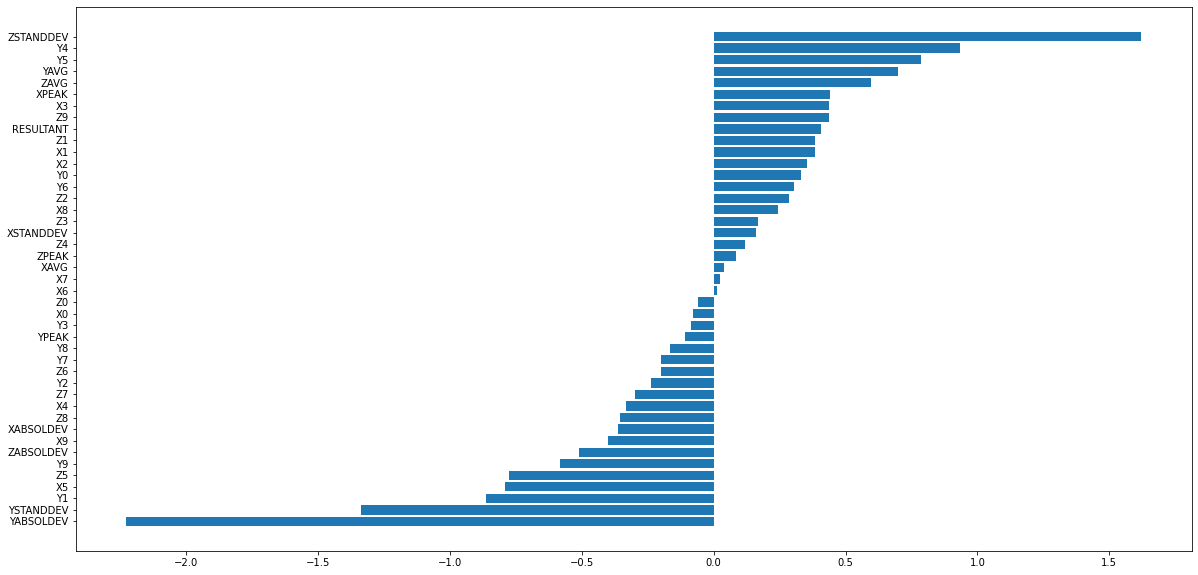

[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [16  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 9  0  0  0  0  0  0  0  0  0  0  0  0  9  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  0  0  0  0 12  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [13  0  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  1  1  0  0  0  0]
 [ 7  0  0  0  0  0  0  0  0  0  0  0  0 11  0  0  0  0]
 [ 9  1  0  0  0  0  0  0  0  0  0  0  0  8  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


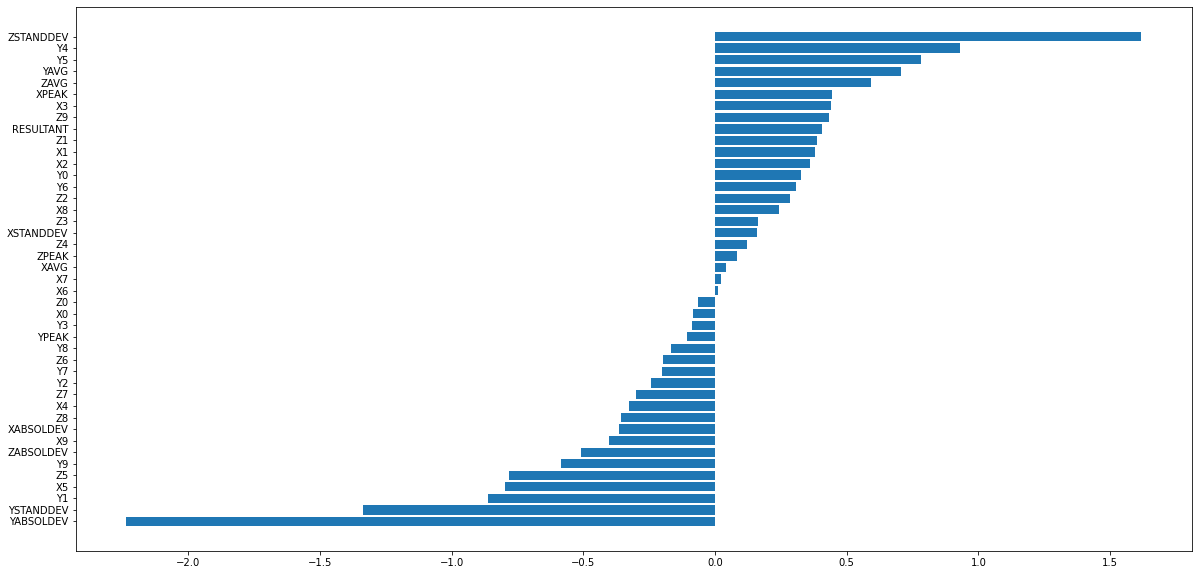

[[12  0  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0]
 [15  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [12  0  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  0  0  0  0 12  0  0  0  0]
 [14  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0]
 [ 7  0  0  0  0  0  0  0  0  0  0  0  0 11  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


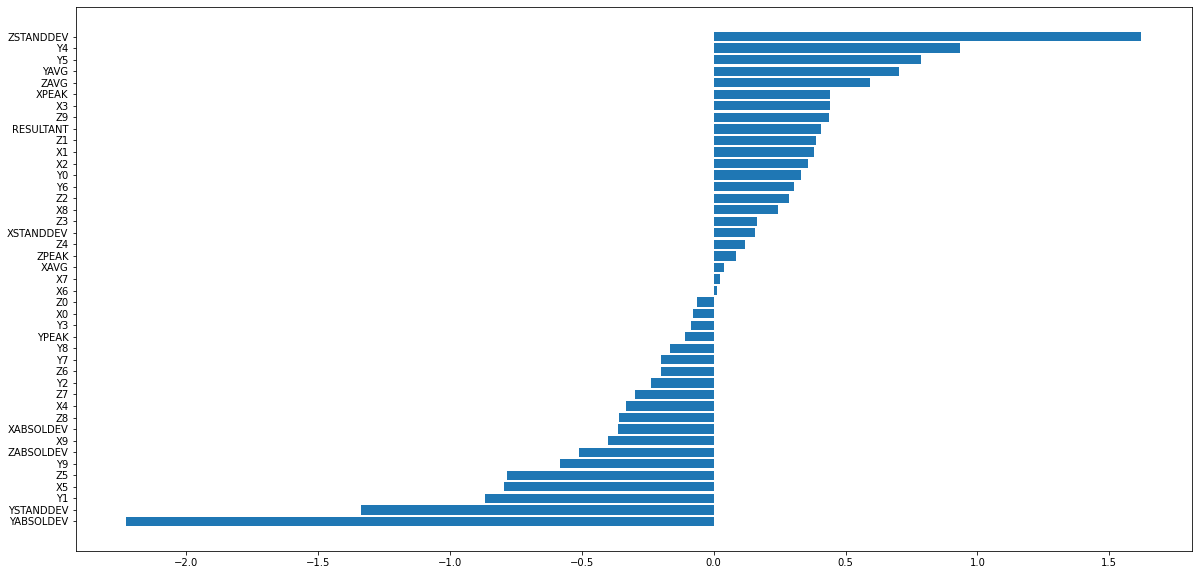

[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [16  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0]
 [10  0  0  0  0  0  0  0  0  0  0  0  2  6  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [14  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [13  2  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0]
 [ 2  7  0  0  0  0  0  0  0  0  0  0  0  9  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


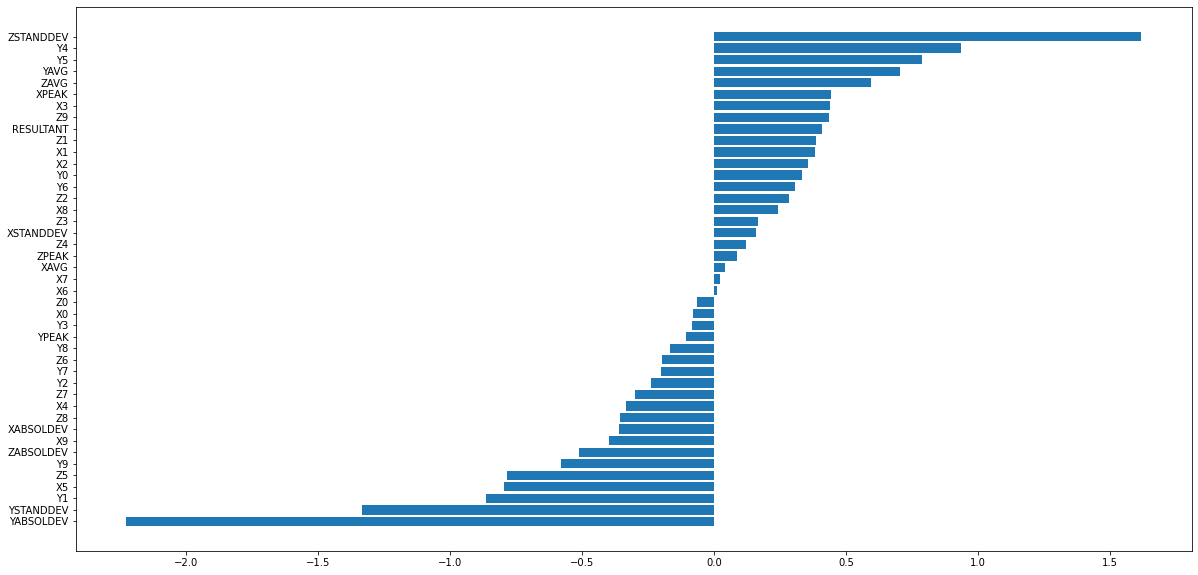

[[ 1  0  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0]
 [15  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0 16  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0]
 [12  0  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0]
 [14  0  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


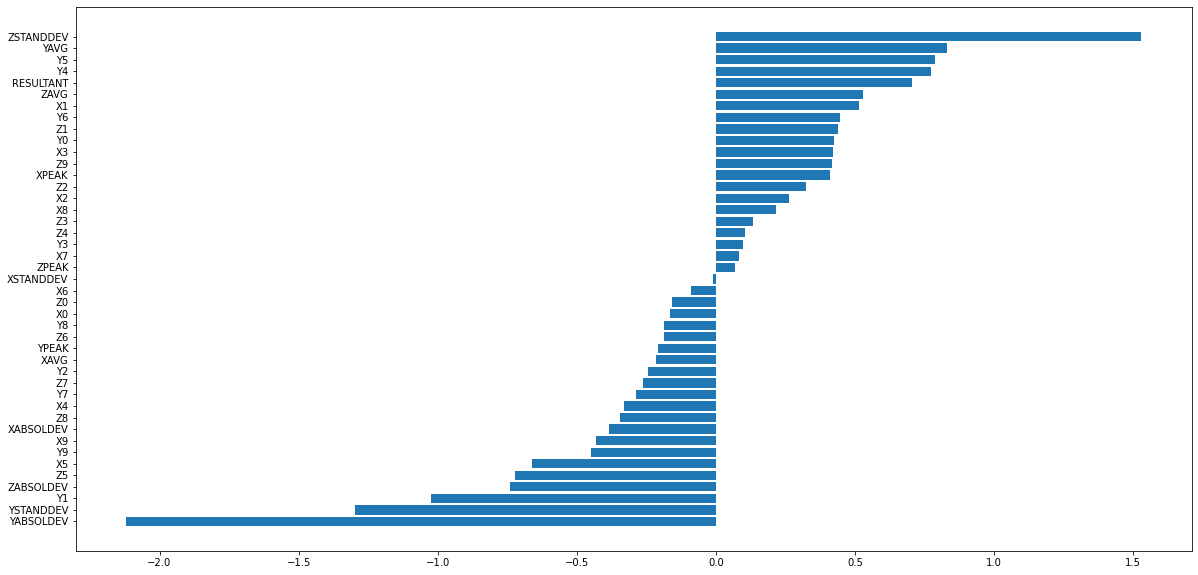

[[ 7  0  0  0  0  0  0  0  0  0  0  0  0  3  8  0  0  0]
 [14  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 9  0  0  0  0  0  0  0  0  0  0  0  0  0  9  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0  0  0  0  0 14  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0 11  4  0  0  0  0]
 [17  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


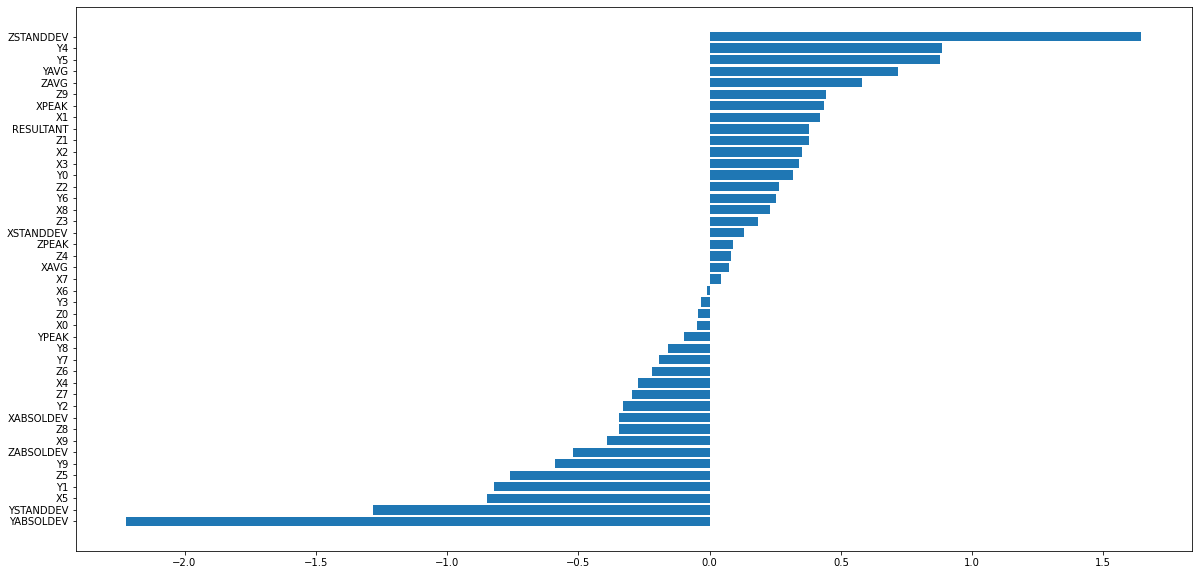

[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [16  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


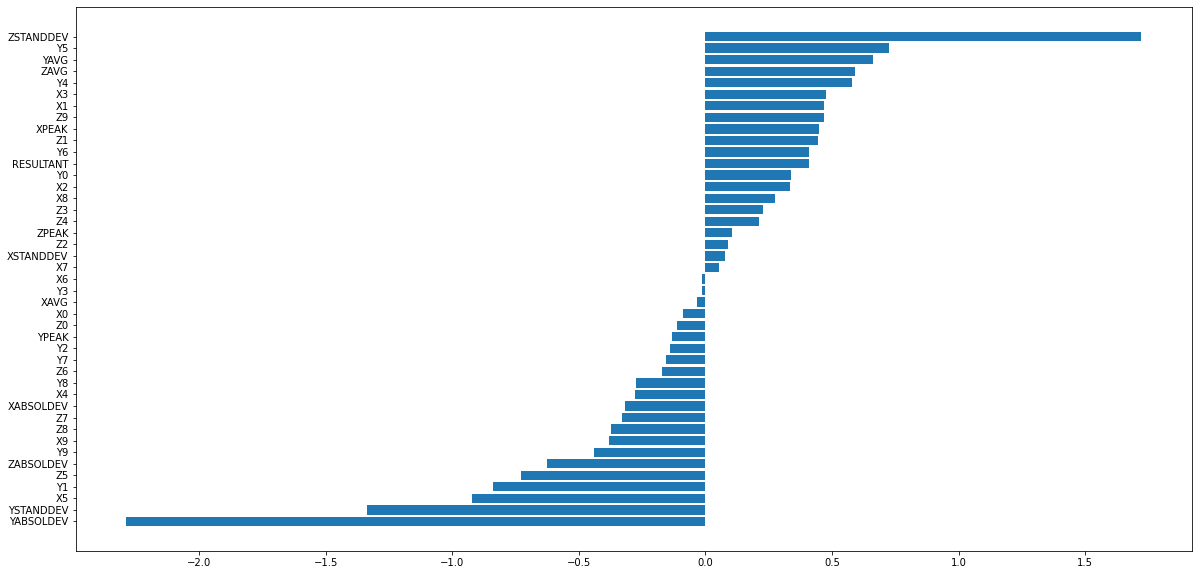

[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [10  0  0  0  0  0  0  0  0  0  0  0  0  8  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [14  0  0  0  0  0  0  0  0  0  0  0  3  1  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [ 7  0  0  0  0  0  0  0  0  0  0  0  0  3  8  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  1  0  1  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


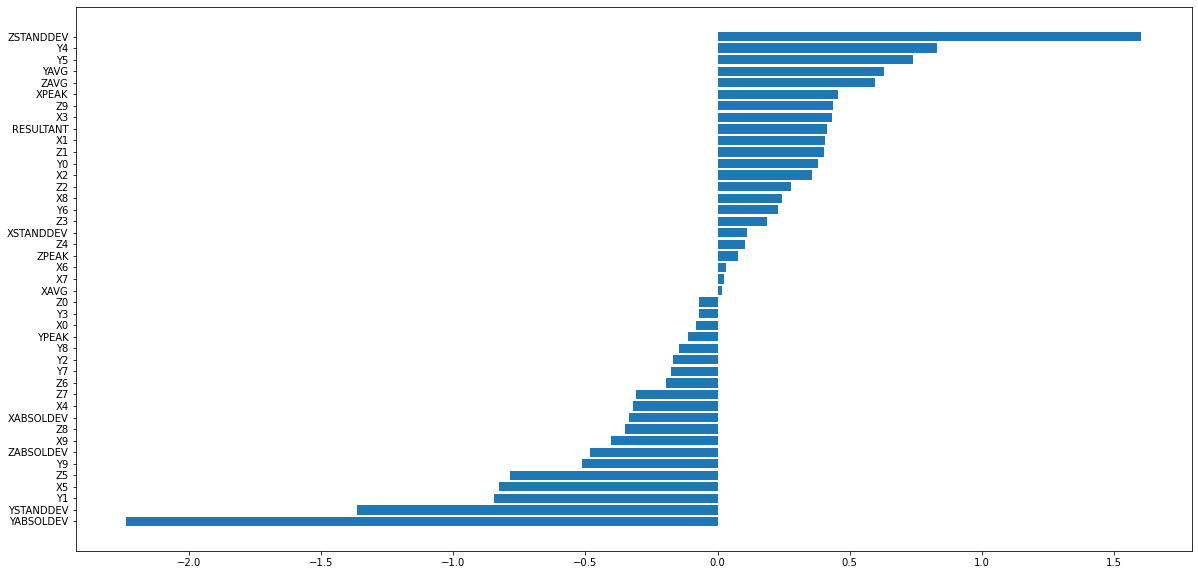

[[17  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 7  0  0  0  0  0  0  0  0  0  0  0  0  2  9  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [13  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 7  0  0  0  0  0  0  0  0  0  0  0  0  1 10  0  0  0]
 [12  0  0  0  0  0  0  0  0  0  0  0  0  5  1  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


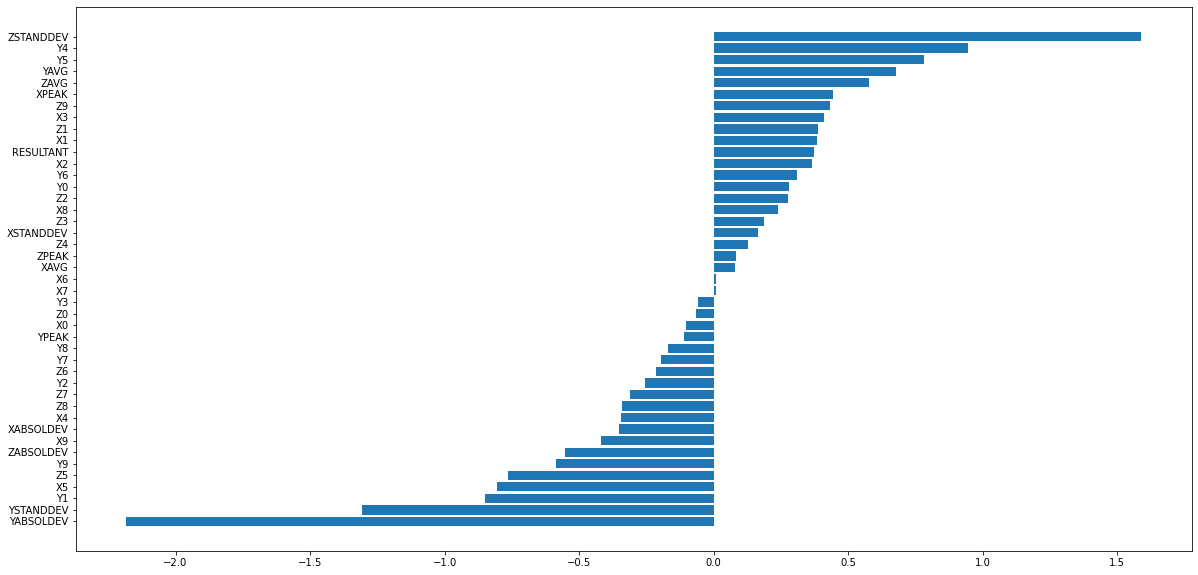

[[44  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1 44  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 9  0  0  0  0  0  0  0  0  0  0  0  0 35  0  0  0]
 [42  0  0  0  0  0  0  0  0  0  0  0  2  1  0  0  0]
 [ 7  0  0  0  0  0  0  0  0  0  0  0 29  5  4  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 44  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  1 42  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 45  0  0  0]
 [13  0  0  0  0  0  0  0  0  0  0  0  0 31  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 45  0  0  0]
 [25  0  0  0  0  0  0  0  0  0  0  0 14  6  0  0  0]
 [28  0  0  0  0  0  0  0  0  0  0  0  0 13  3  0  0]
 [33  0  0  0  0  0  0  0  0  0  0  0  3  0  9  0  0]
 [ 8  0  1  0  0  0  0  0  0  0  0  0 12 22  2  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 44  0  0  0]
 [13  0  0  0  0  0  0  0  0  0  0  0 11 21  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  0  0  0  2  3 34  0  0]]
              precision    recall  f1-score   support

           0       0.19   

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


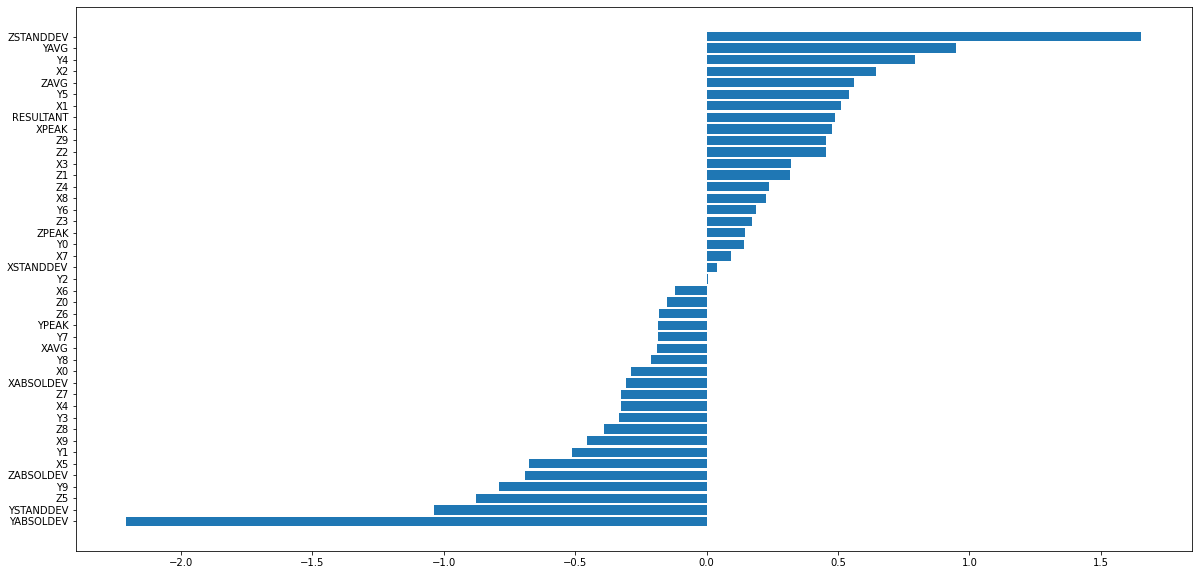

[[44  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0 42  0  0  0  0]
 [33  0  6  0  0  0  0  0  0  0  0  0  2  4  0  0  0  0]
 [18  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [31  0 12  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [36  0  5  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0]
 [26  0  8  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0]
 [27  0  5  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0]
 [12  0 25  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0]
 [25  0  8  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0]
 [45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [27  0  5  0  0  0  0  0  0  0  0  0  1 12  0  0  0  0]
 [36  0  0  0  0  0  0  0  0  0  0  0  1  8  0  0  0  0]
 [32  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  0 29  0  0  0  0]
 [26  0  6  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


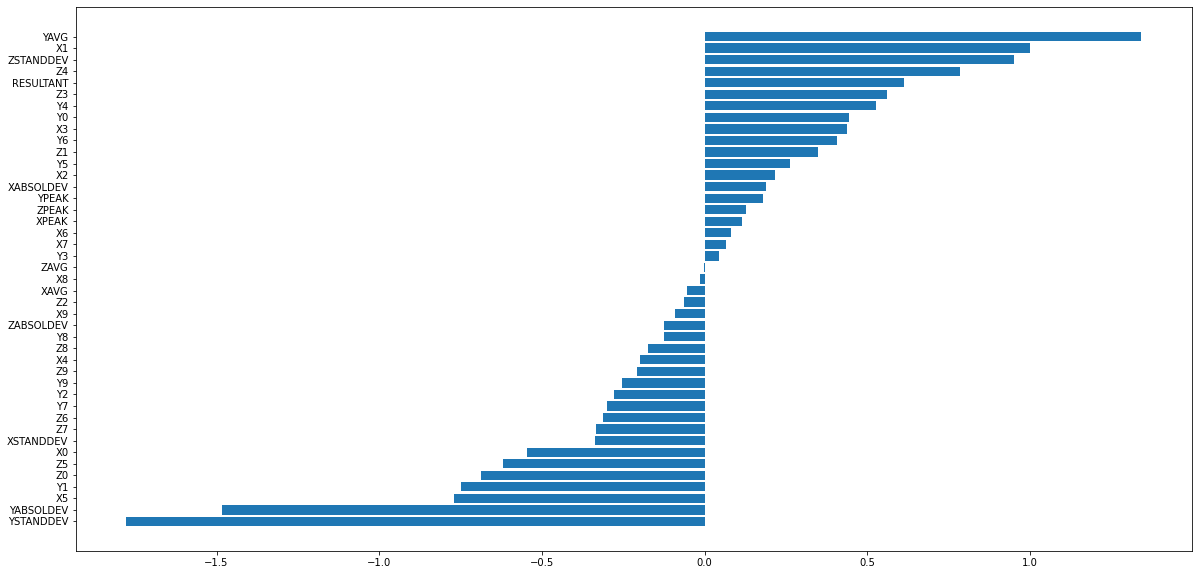

[[14 28  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0]
 [45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [29  0  0  0  0  0  0  0  0  0  0  0  0 15  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 43  1  0  0  0]
 [11  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0]
 [34  0  3  0  0  0  0  0  0  0  0  0  5  2  0  0  0]
 [16  0 10  0  0  0  0  0  0  0  0  0 10  9  0  0  0]
 [23  0  7  0  0  0  0  0  0  0  0  0 13  2  0  0  0]
 [24  0  0  0  0  0  0  0  0  0  0  0 11  9  0  0  0]
 [21  0 11  0  0  0  0  0  0  0  0  0  7  6  0  0  0]
 [14  0  1  0  0  0  0  0  0  0  0  0 30  0  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  0  0  0  1 37  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 45  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0  0  0  0 37  0  0  0]
 [40  0  2  0  0  0  0  0  0  0  0  0  1  1  0  0  0]
 [30  0  1  0  0  0  0  0  0  0  0  0  8  6  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 45  0  0  0]]
              precision    recall  f1-score   support

           0       0.04   

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


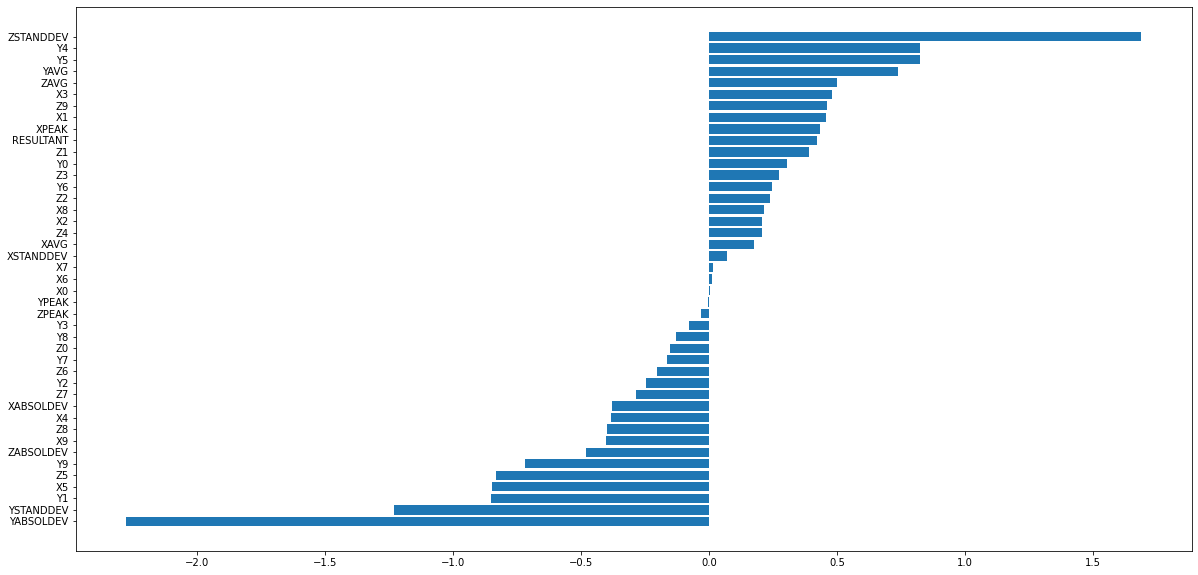

[[44  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [30 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [44  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0 44  0  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  0  0  0  0 39  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 45  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 41  3  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 29 16  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 12 32  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0  0  2 40  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  2 43  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 26 18  0  0  0]
 [30  0  0  0  0  0  0  0  0  0  0  0  0 14  1  0  0  0]
 [16  0  4  0  0  0  0  0  0  0  0  0  0 25  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 44  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 45  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 45  0  0  0  0]
 [30  0  0  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


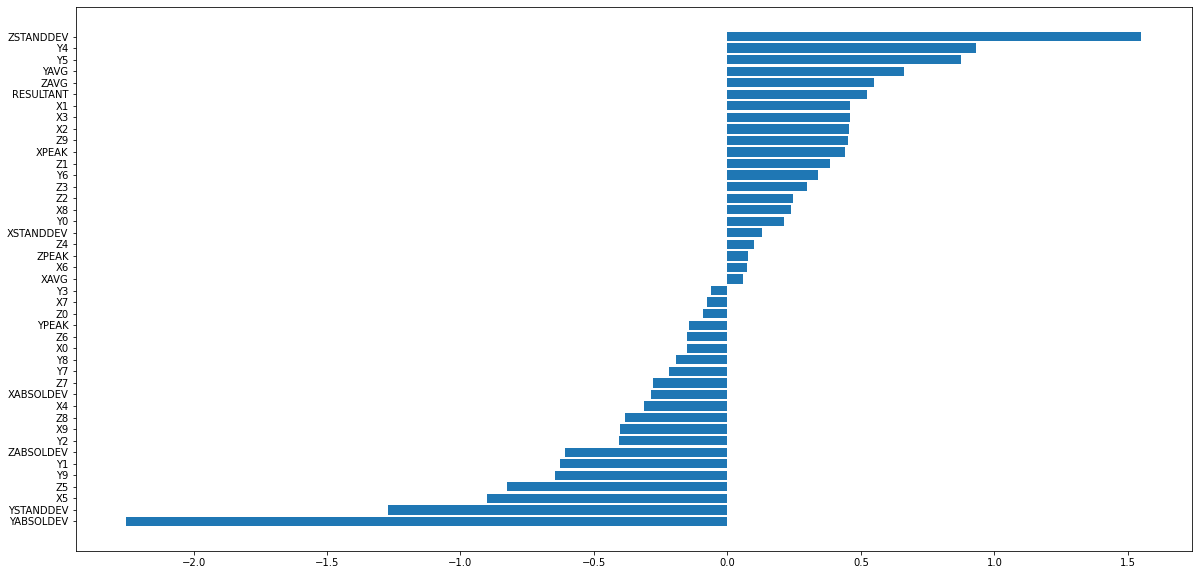

[[16  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0]
 [13  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0 16  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [14  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  4 12  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [13  0  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0]
 [ 5  0  0  0  0  0  0  0  0  0  0  0  0 13  0  0  0  0]
 [ 1  1  0  0  0  0  0  0  0  0  0  0  0 16  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


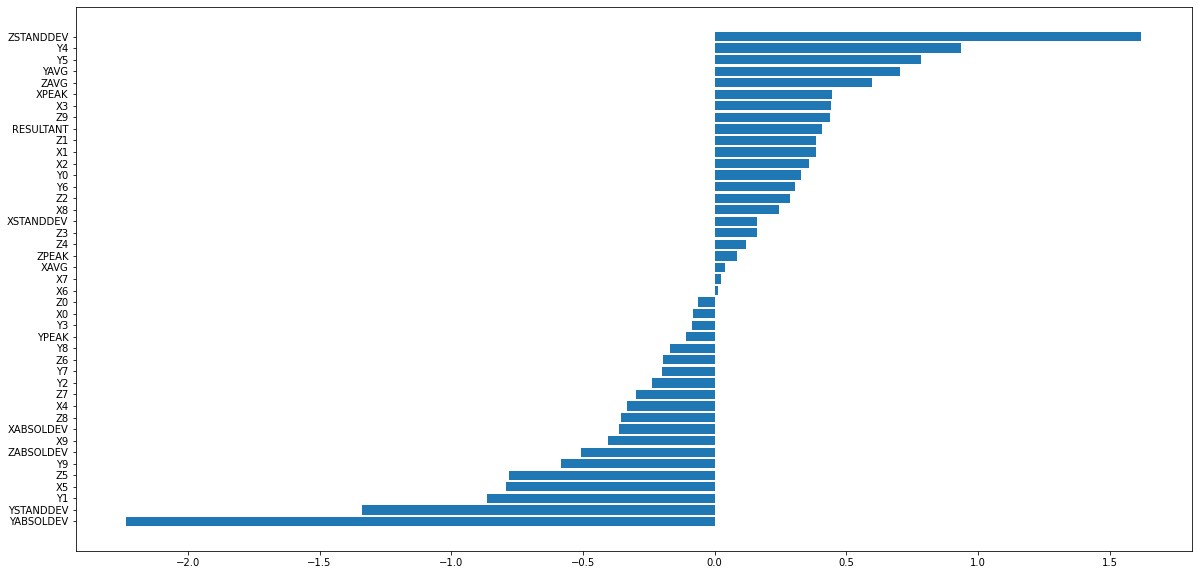

[[15  0  0  0  0  0  0  0  0  0  0  0  0  2  1  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0]
 [ 5  0  0  0  0  0  0  0  0  0  0  0 11  0  2  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [12  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [25  0  0  0  0  0  0  0  0  0  0  0  4  1  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  0  0  0  0 12  0  0]
 [ 4  0  0  0  0  0  0  0  0  0  0  0  0 14  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.07      0.83      0.12        18
           1       0.00      0.00      0.00        18
           2       0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


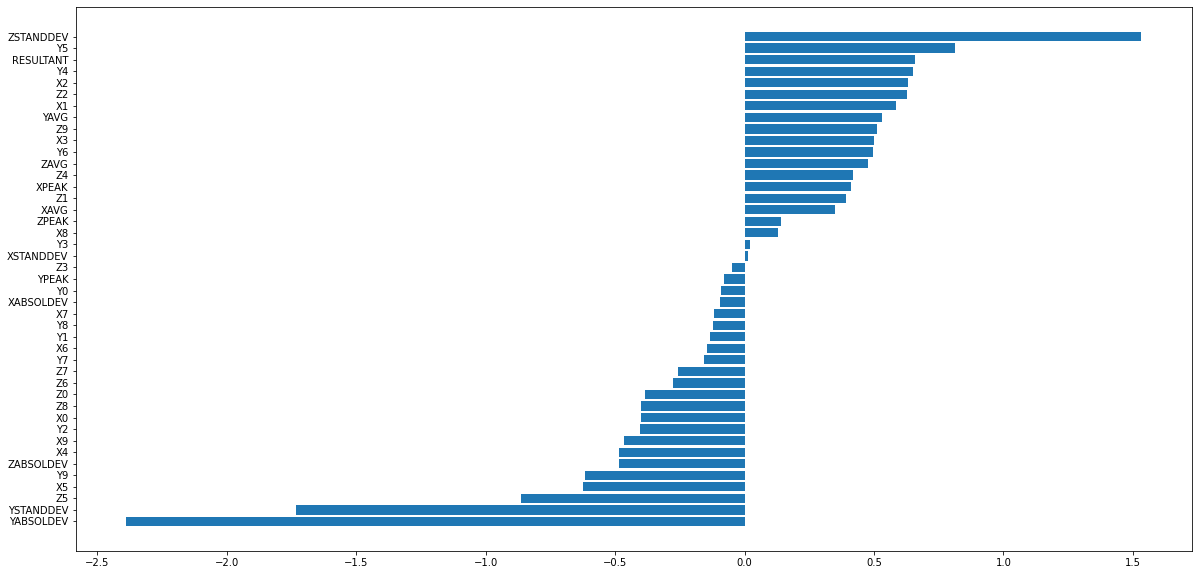

[[17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [13  0  0  0  0  0  0  0  0  0  0  0  1  4  0  0  0  0]
 [11  0  0  0  0  0  0  0  0  0  0  0  6  1  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  1  0  1  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  1  0  1  0  0  0]
 [19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  0  0  0  0 12  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


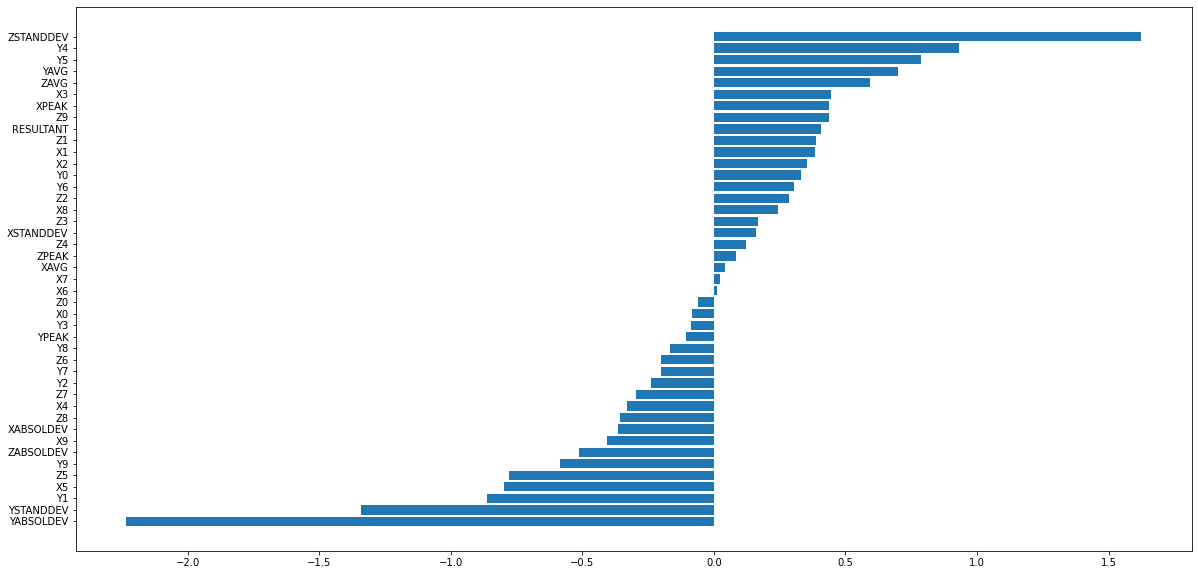

[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [12  0  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [10  0  0  0  0  0  0  0  0  0  0  0  0  8  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [14  0  1  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  0  0  0  3  9  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [29  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  9  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  2  7  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


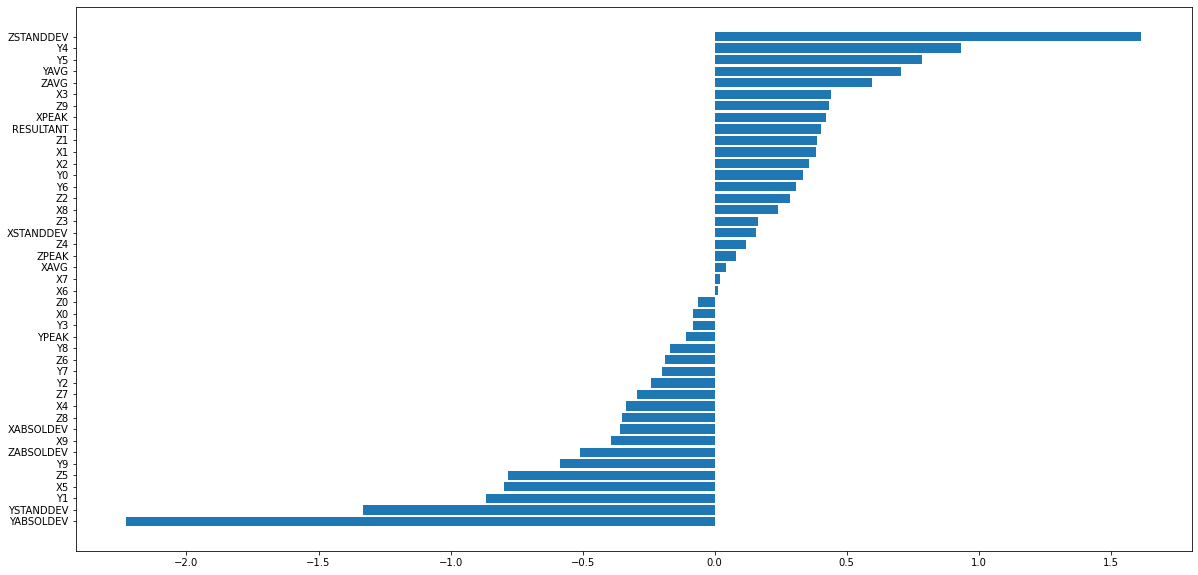

[[17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [12  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [11  1  0  0  0  0  0  0  0  0  0  0  5 11  0  0  0  0]
 [10  0  0  0  0  0  0  0  0  0  0  0  7  1  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [20  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [12  1  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0]
 [10  1  0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


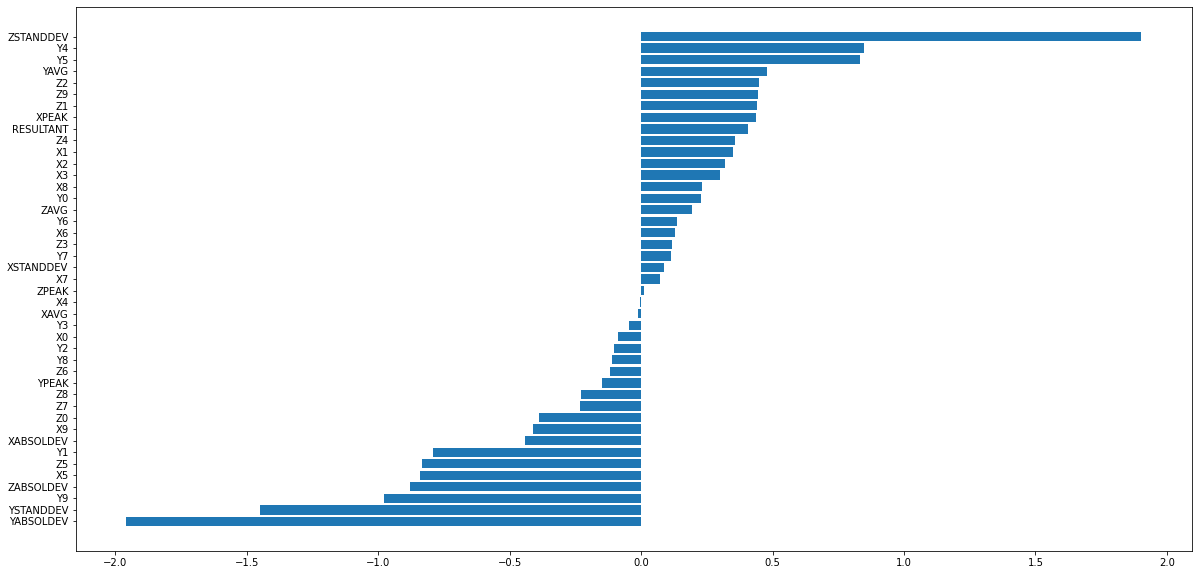

[[17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [17  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0  0  0  1 13  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [11  0  0  0  0  0  0  0  0  0  0  0  0  0  7  0  0  0]
 [14  0  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0]
 [ 7  0  0  0  0  0  0  0  0  0  0  0  0 11  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  0  0  0  0  0 16  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [10  0  0  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


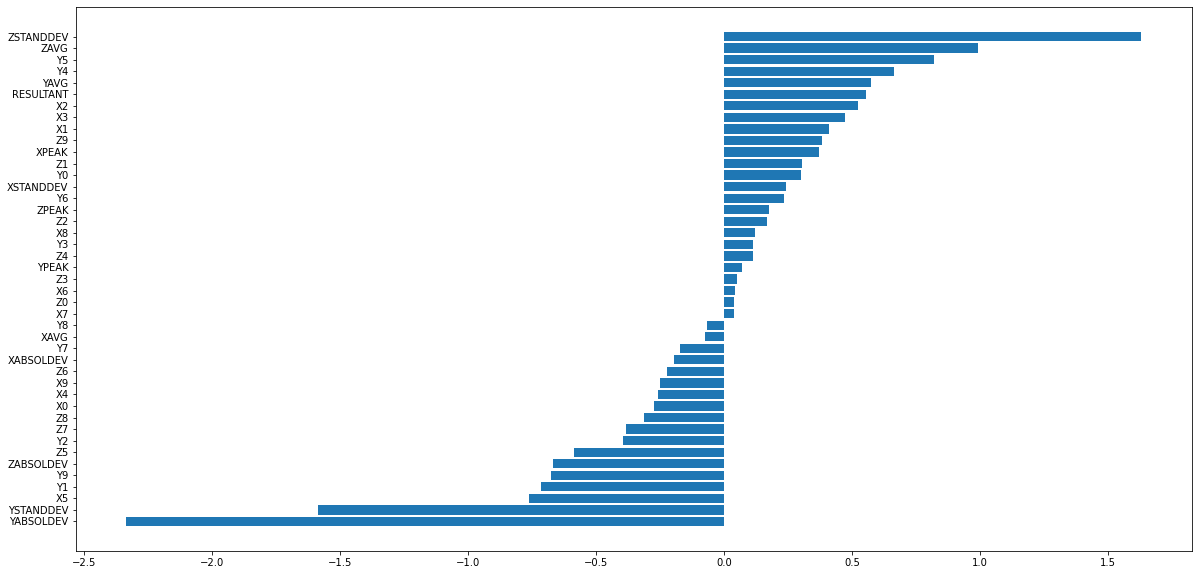

[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [14  0  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 9  0  0  0  0  0  0  0  0  0  0  0  1  0  8  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  0  0  0  0 12  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 7  0  0  0  0  0  0  0  0  0  0  0  0  0 11  0  0  0]
 [17  0  0  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


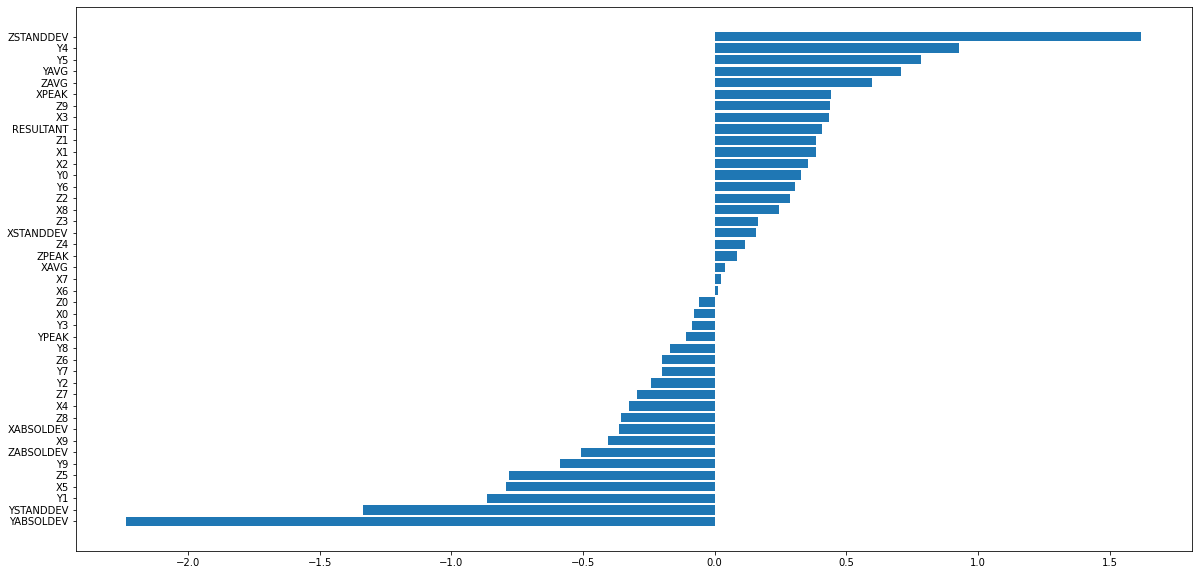

[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  2  1  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  0  0  0 10  2  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


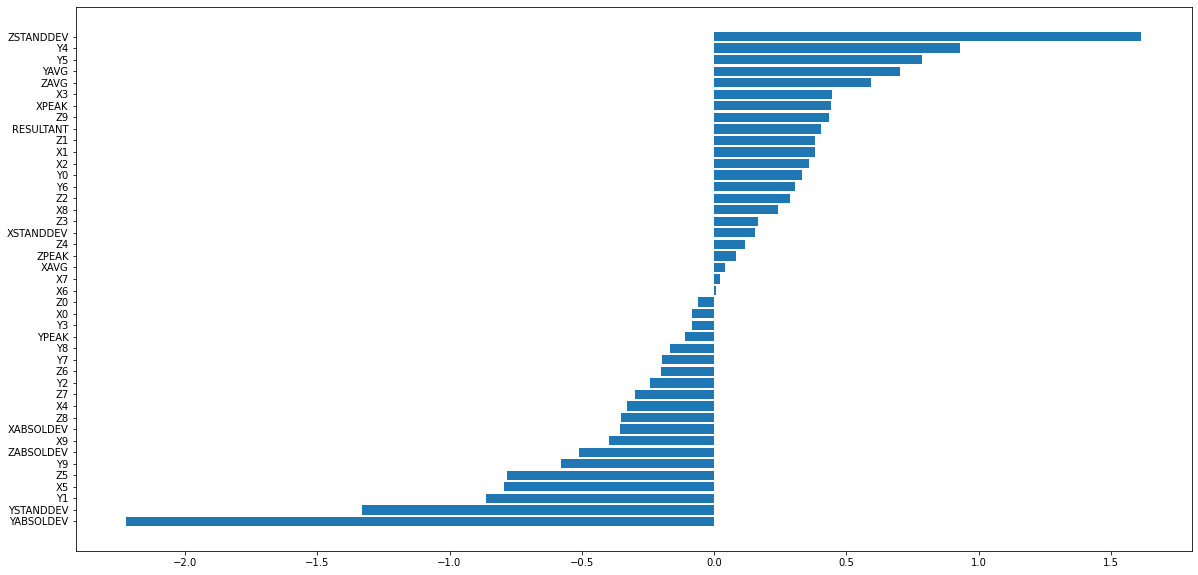

[[17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [17  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  0  0  0  0 12  0  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [ 8  1  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0]
 [ 5  0  0  0  0  0  0  0  0  0  0  0  0 13  0  0  0  0]
 [16  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [10  0  0  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


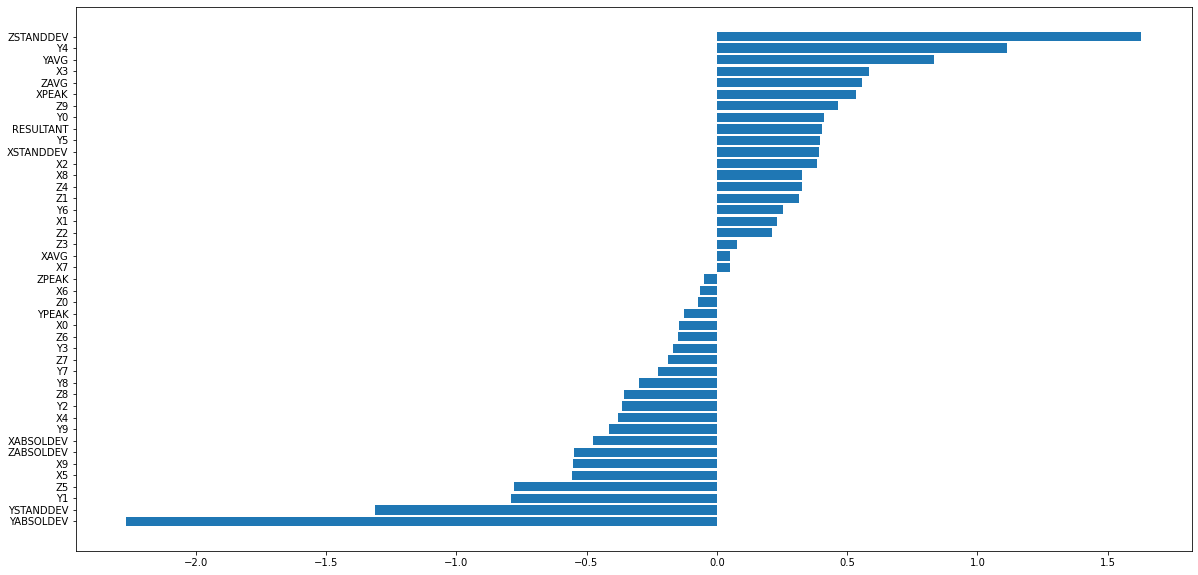

[[ 9  0  0  0  0  0  0  0  0  0  0  0  1 16  0  0  0  0]
 [17  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0 16  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0  0  0  1  0 13  0  0  0]
 [ 4  0  1  0  0  0  0  0  0  0  0  0 13  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0  0  0 12  0  2  0  0  0]
 [ 9  0  1  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0]
 [12  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0 16  0  0  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0  0  0  2  8  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 3  4  0  0  0  0  0  0  0  0  0  0  1 10  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 16  1  0  0  0  0]
 [11  0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(16533, 93)
[1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650]
Subject ID 1600:


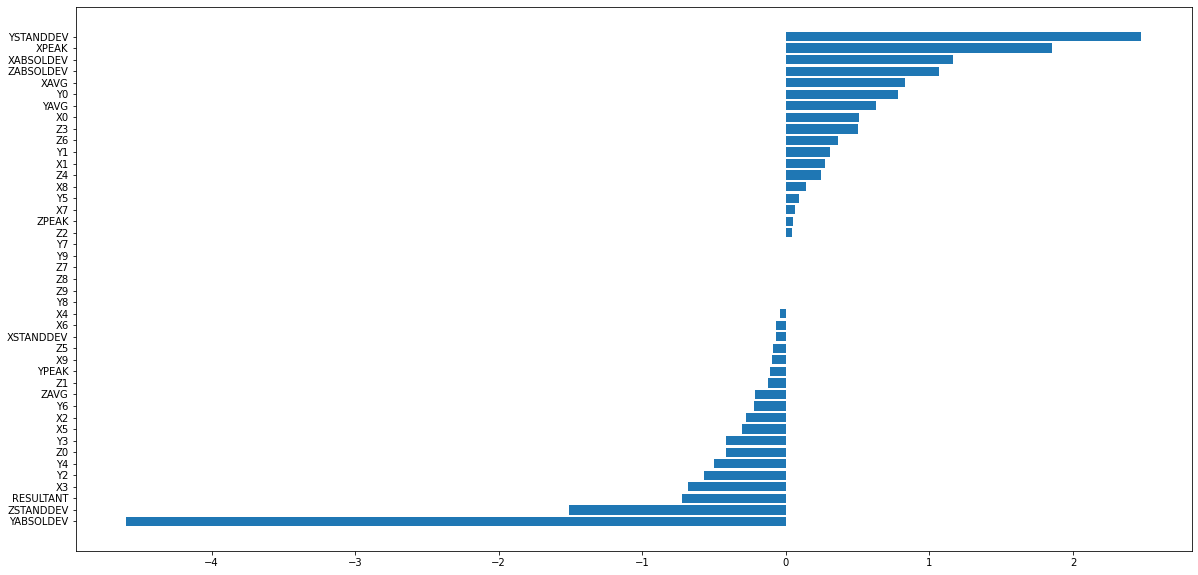

[[ 0  0  2  0  0  0  0  0  0  0  0  0  0 16  0  0  0  0]
 [ 3  0  4  0  0  0  0  0  0  0  0  0  7  4  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  1 16  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  4 14  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  8 10  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  3 15  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 11  7  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  0  0 14  2  0  0  0  0]
 [ 4  0  2  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 10  8  0  0  0  0]
 [ 0  0  6  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0]
 [ 0  0  9  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


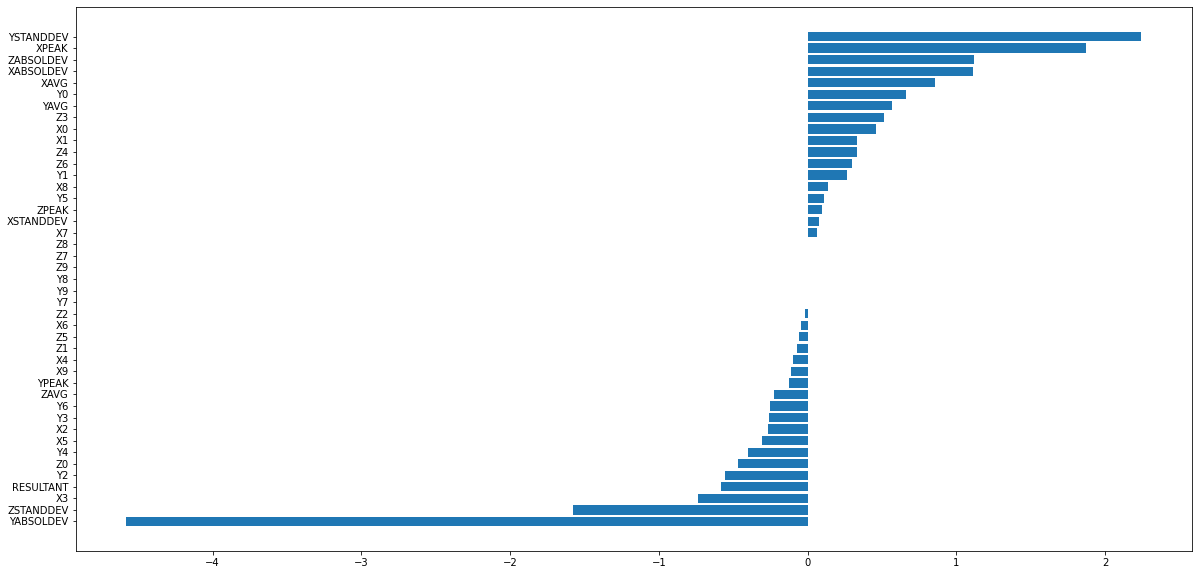

[[ 0  0  0  0  0  0  0  4  0  0  0  0  9  5  0  0  0  0]
 [ 0  0 16  0  0  0  0  0  0  0  0  0  1  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  6 12  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 10  8  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  2 15  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  1 16  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  3 15  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [ 0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  3 15  0  0  0  0]
 [ 0  0  0  0  0  0  0  6  0  1  0  0  8  3  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


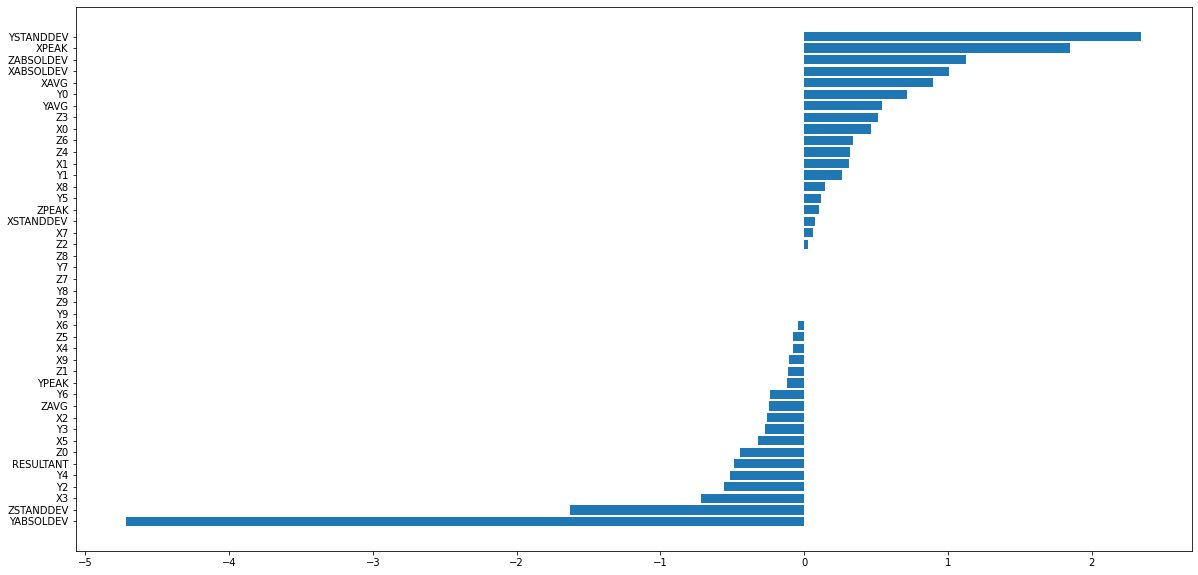

[[ 0  0  0  0  0  0  0  0  0  0  0  0  8 10  0  0  0  0]
 [ 0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  8  5  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  3 15  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  6 12  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  4 14  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  3 15  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2 16  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  9  9  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  8 10  0  0  0  0]
 [ 0  0  6  0  0  0  0  0  0  0  0  0  8  4  0  0  0  0]
 [ 0  0 15  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [ 9  0  8  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0 10  7  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


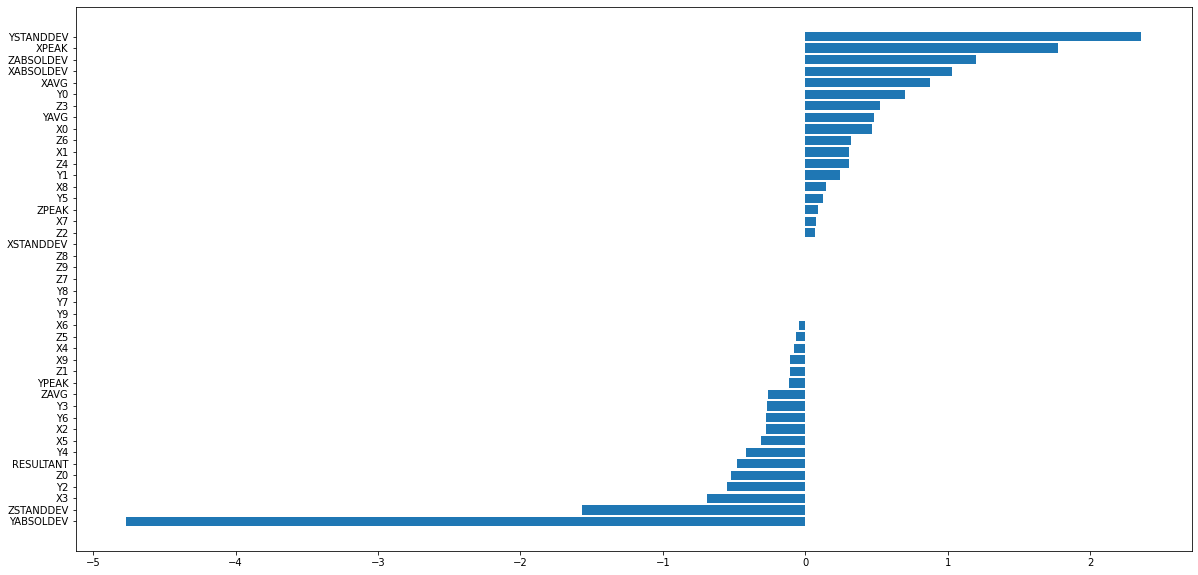

[[ 0  0  9  0  0  0  0  1  0  1  0  0  5  2  0  0  0  0]
 [ 8  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 16  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2 16  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  0 16  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  3 13  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2 16  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  5 13  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  1 16  0  0  0  0]
 [ 0  0  3  0  0  0  0  0  0  0  0  0 12  3  0  0  0  0]
 [ 0  0  5  0  0  0  0  1  0  0  0  0 12  0  0  0  0  0]
 [ 0  0  6  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  7 11  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  0  0 15  1  0  0  0  0]
 [ 0  0  5  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


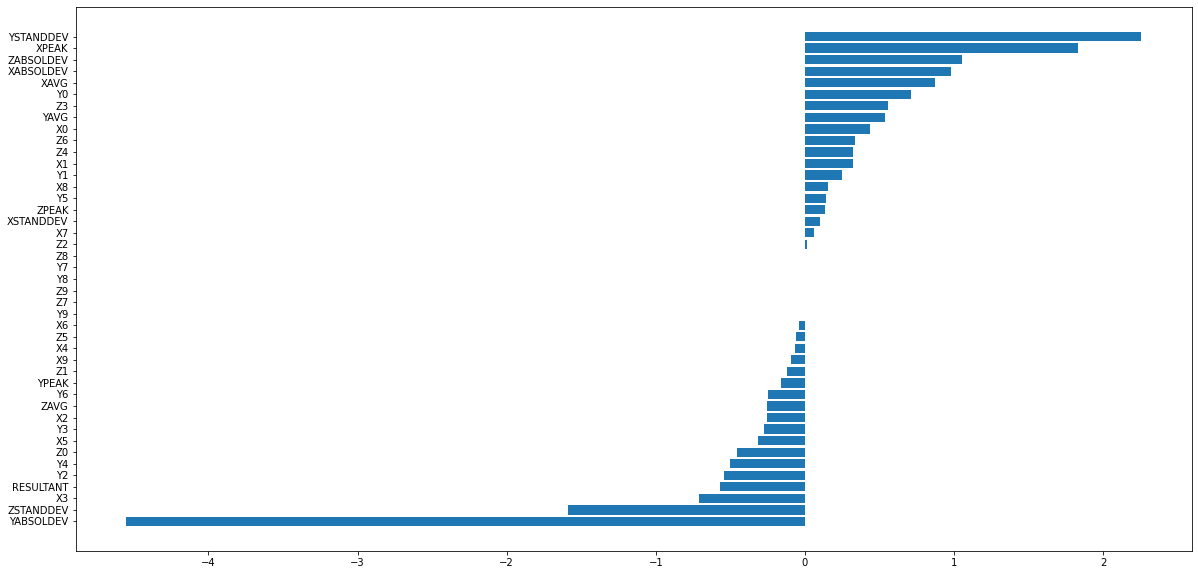

[[ 0  0  5  0  0  0  0  0  0  0  0  0  2 11  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  0  0  0 12  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2 16  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  6 12  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  3 15  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  6 12  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2 16  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  3 14  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 10  8  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  3 15  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2 16  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  0  0 13  3  0  0  0  0]
 [ 0  0  7  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0 11  6  0  0  0  0]
 [ 0  0  8  0  0  0  0  1  0  0  0  0  9  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


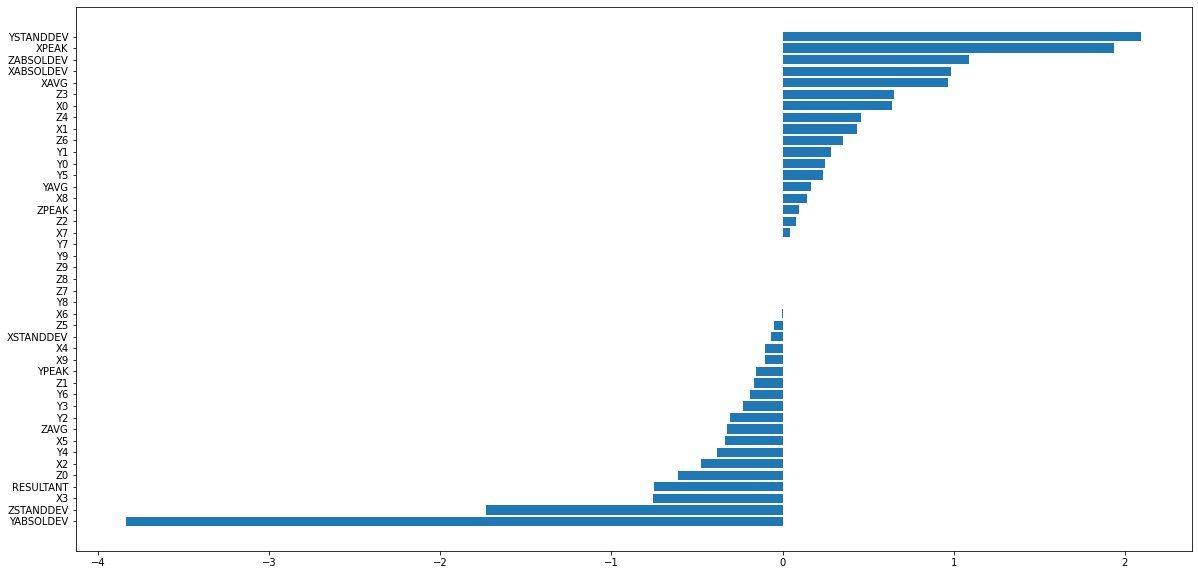

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0 16  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2 16  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  4  0  0  0  0  0 14  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  3 19  0  0  0  0]
 [ 0  0  0  0  0  0  0  4  0  0  0  0  1 13  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  4 13  0  0  0  0]
 [ 0  0  8  0  0  0  0  2  0  0  0  0  2  6  0  0  0  0]
 [ 0  0  9  0  0  0  0  0  0  0  0  0  9  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  0  0 15  1  0  0  0  0]
 [ 0  0  3  0  0  0  0  2  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


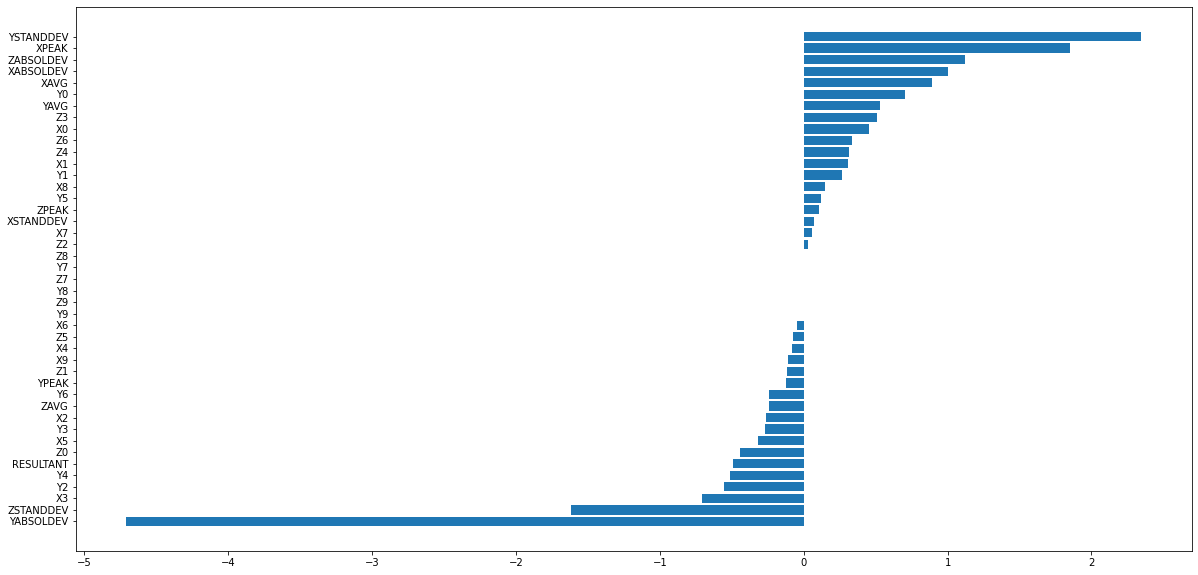

[[ 0  0  2  0  0  0  0  0  0  0  0  0  3 13  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 1  0  8  0  0  0  0  0  0  0  0  0  9  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0 10  7  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2 16  0  0  0  0]
 [ 0  0 12  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  2 15  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  6 12  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  4 14  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2 16  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  2 15  0  0  0  0]
 [ 0  0  6  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0]
 [ 7  0  8  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [13  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0]
 [ 4  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


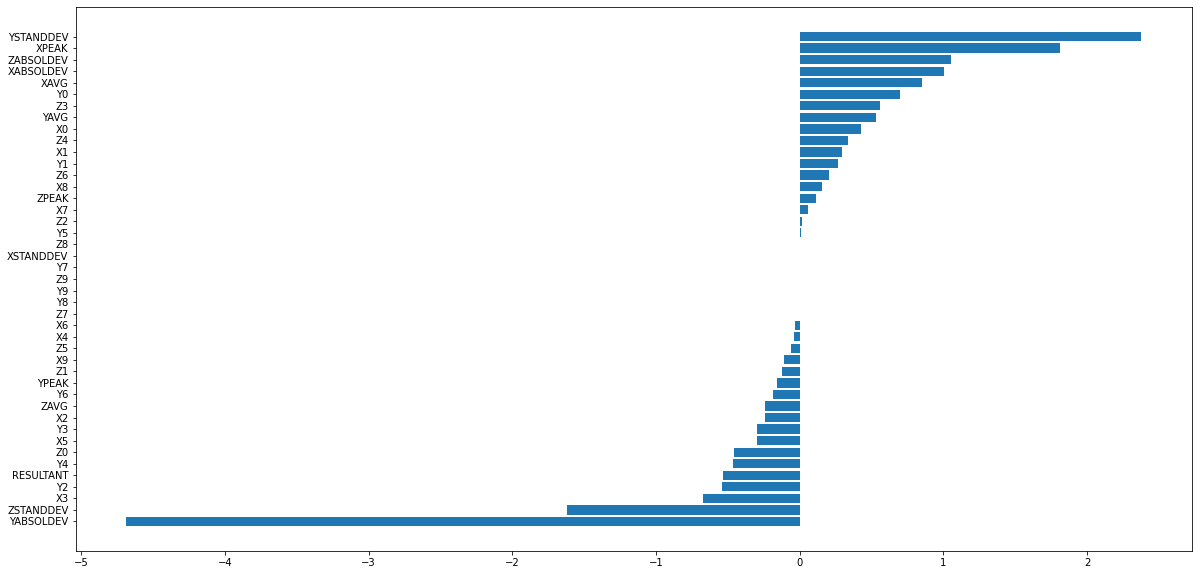

[[ 0  0 11  0  0  0  0  1  0  0  0  0  0  6  0  0  0  0]
 [ 0  0 13  0  0  0  0  0  0  0  0  0  5  0  0  0  0  0]
 [ 0  0  9  0  0  0  0  0  0  0  0  0  8  1  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  1 16  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  7 11  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  2 15  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  4 14  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 15  3  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  7 14  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  7 11  0  0  0  0]
 [ 0  0  9  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0]
 [12  0  2  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2 16  0  0  0  0]
 [ 0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


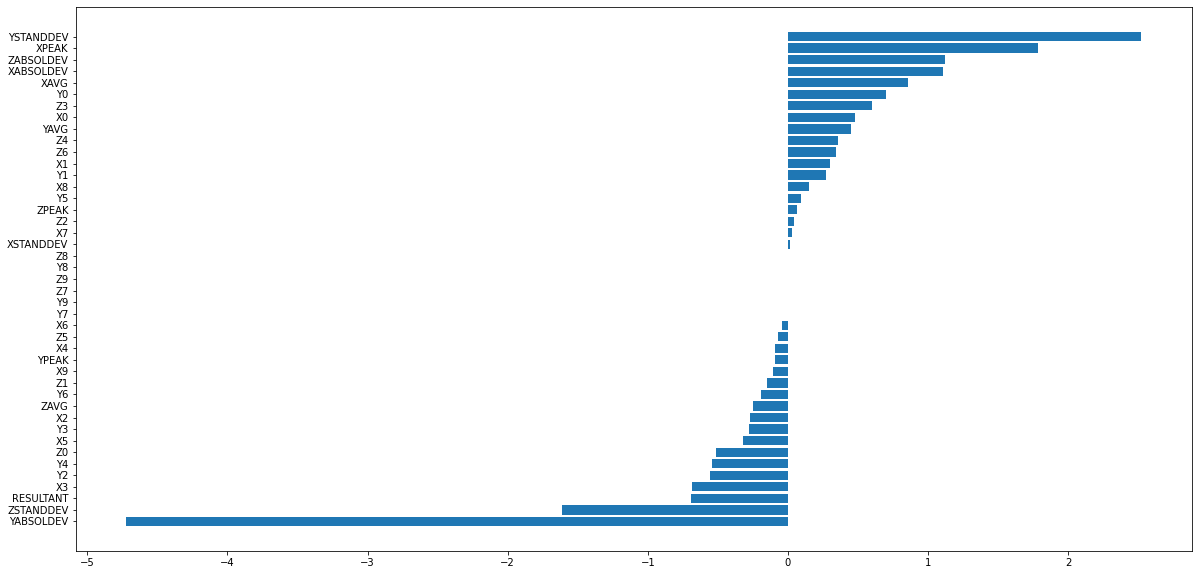

[[ 0  0  0  0  0  0  0  0  0  0  0  0  8 10  0  0  0  0]
 [13  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  7 11  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  7 11  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 16  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  9  0  0  0  0  1  8  0  0  0  0]
 [ 0  0  1  0  0  0  0  1  0  0  0  0  6 10  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0 16 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 10  8  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  8  9  0  0  0  0]
 [ 0  0  6  0  0  0  0  0  0  0  0  0 10  2  0  0  0  0]
 [ 1  0 12  0  0  0  0  0  0  0  0  0  5  0  0  0  0  0]
 [17  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  7 10  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0 15  1  0  0  0  0]
 [ 0  0  8  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


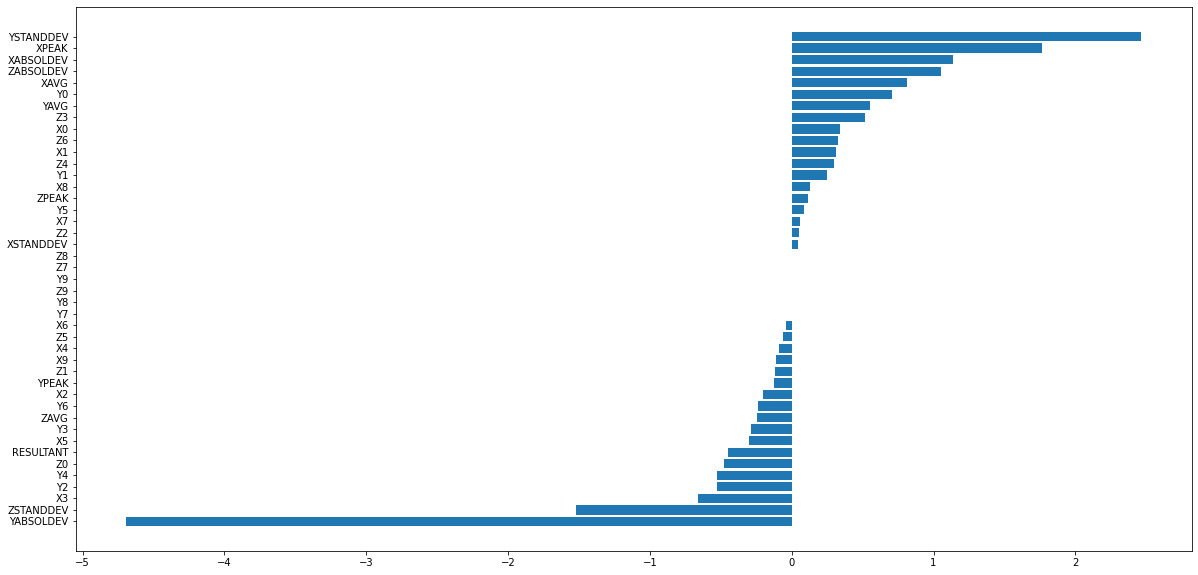

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 6  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 15  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  5 13  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 11  7  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  0  0  0 14  0  0  0  0  0]
 [ 0  0  7  0  0  0  0  6  0  0  0  0  3  2  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  0  0  8  8  0  0  0  0]
 [ 0  0 11  0  0  0  0  0  0  0  0  0  5  2  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  0  0  0  4 22  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0  0  0  1  7  0  0  0  0]
 [ 0  0 13  0  0  0  0  0  0  0  0  0  1  6  0  0  0  0]
 [10  0 12  0  0  0  0  0  0  0  0  0  2  1  0  0  0  0]
 [ 4  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  0  0 16  0  0  0  0  0]
 [ 0  0 11  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0]
 [ 0  0 18  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


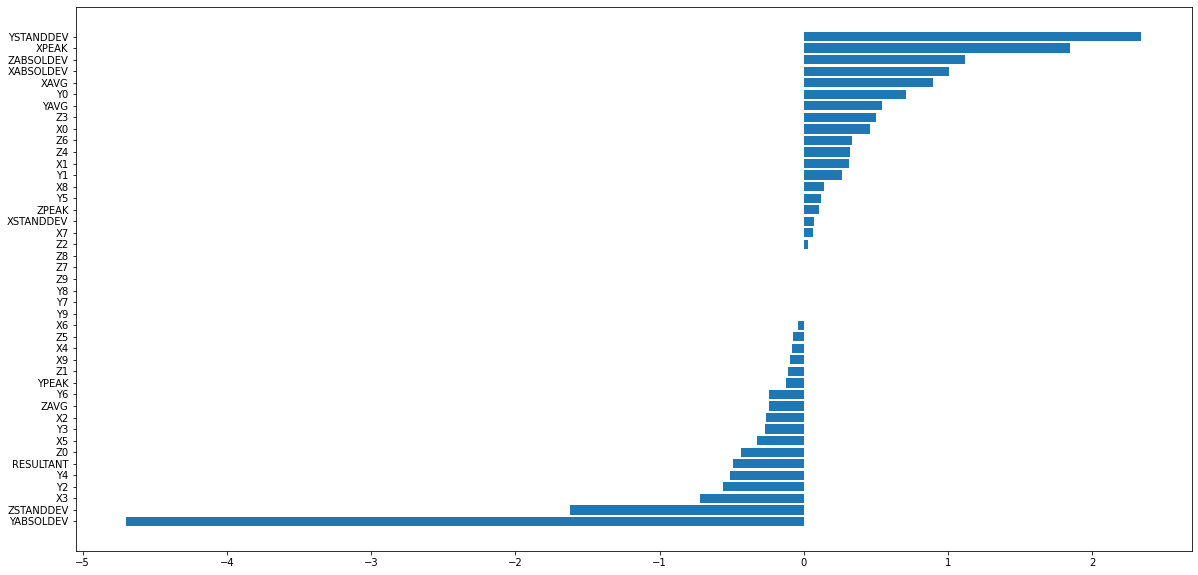

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  1 15  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2 16  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  0  0  2 14  0  0  0  0]
 [ 2  0  3  0  0  0  0  0  0  0  0  0 12  1  0  0  0  0]
 [ 3  0 13  0  0  0  0  0  0  0  0  0  1  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [ 0  0  7  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0]
 [ 0  0  8  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


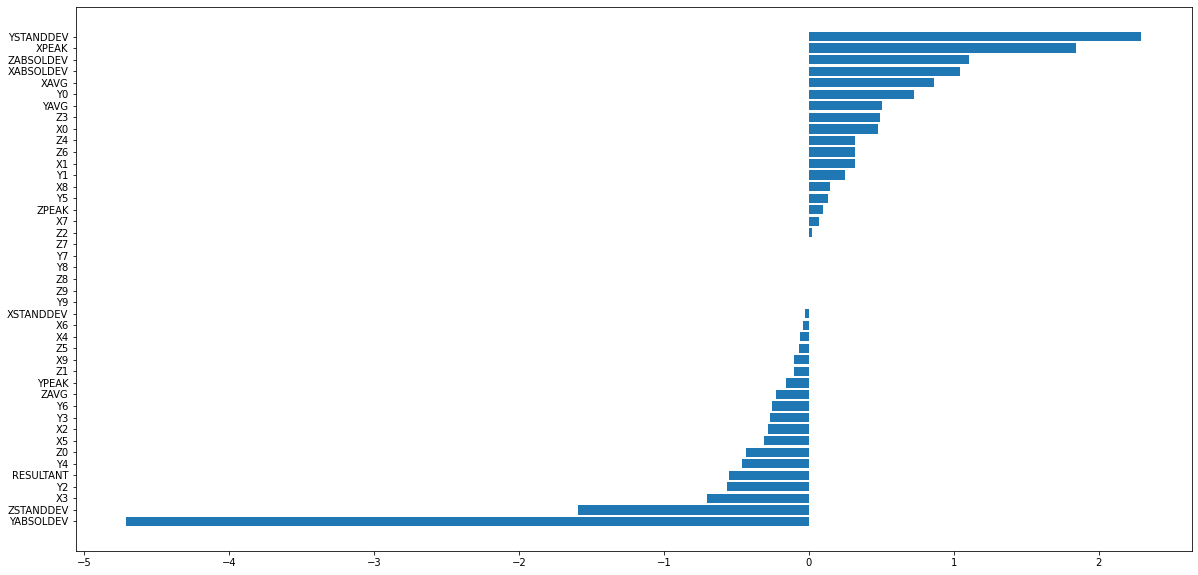

[[ 0  0  0  0  0  0  0  8  0  0  0  0  0 10  0  0  0  0]
 [ 5  0  4  0  0  0  0  0  0  0  0  0  8  1  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  0  0  0  1 13  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  4 13  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  4 12  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  4 14  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  3  0  0  0  0  0  0  0  0  0  1 14  0  0  0  0]
 [ 0  0  9  0  0  0  0  0  0  0  0  0  9  0  0  0  0  0]
 [ 0  0  2  0  0  0  0 15  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  3 15  0  0  0  0]
 [ 0  0  0  0  0  0  0  5  0  1  0  0 12  0  0  0  0  0]
 [ 0  0 14  0  0  0  0  1  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


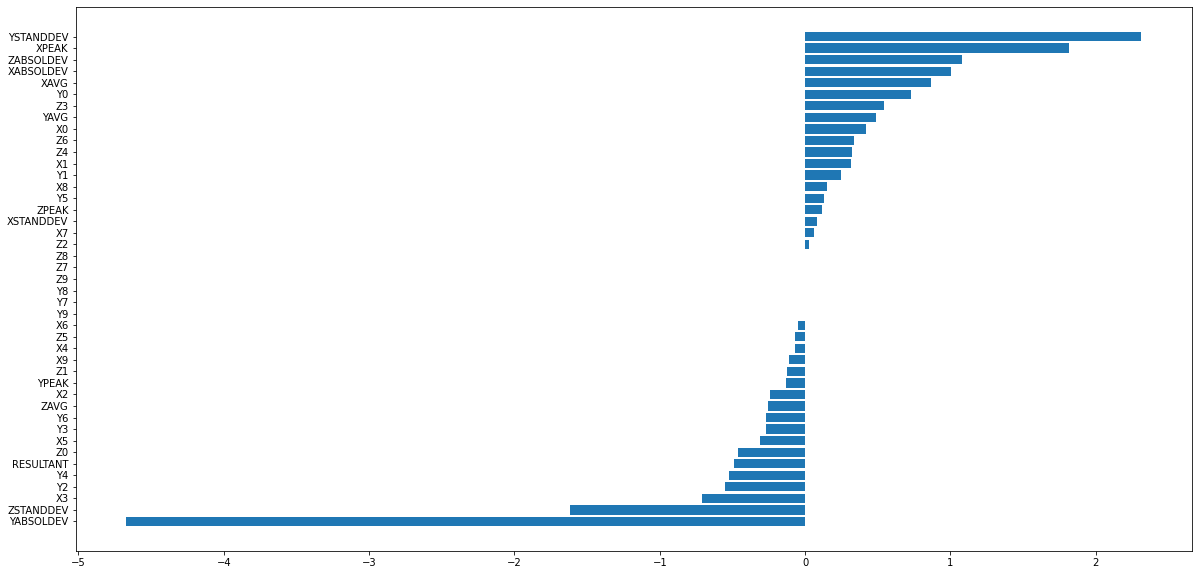

[[ 0  0  3  0  0  0  0  0  0  0  0  0  4 11  0  0  0  0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0 10  3  0  0  0  0]
 [ 0  0  6  0  0  0  0  0  0  0  0  0  8  4  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2 16  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  9  7  0  0  0  0]
 [ 0  0  0  0  0  0  0  5  0  0  0  0  0 13  0  0  0  0]
 [ 0  0  0  0  0  0  0  4  0  0  0  0  5  9  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  1 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  7 11  0  0  0  0]
 [ 0  0  7  0  0  0  0  0  0  0  0  0  8  3  0  0  0  0]
 [ 0  0  1  0  0  0  0 16  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  5 13  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  7 11  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


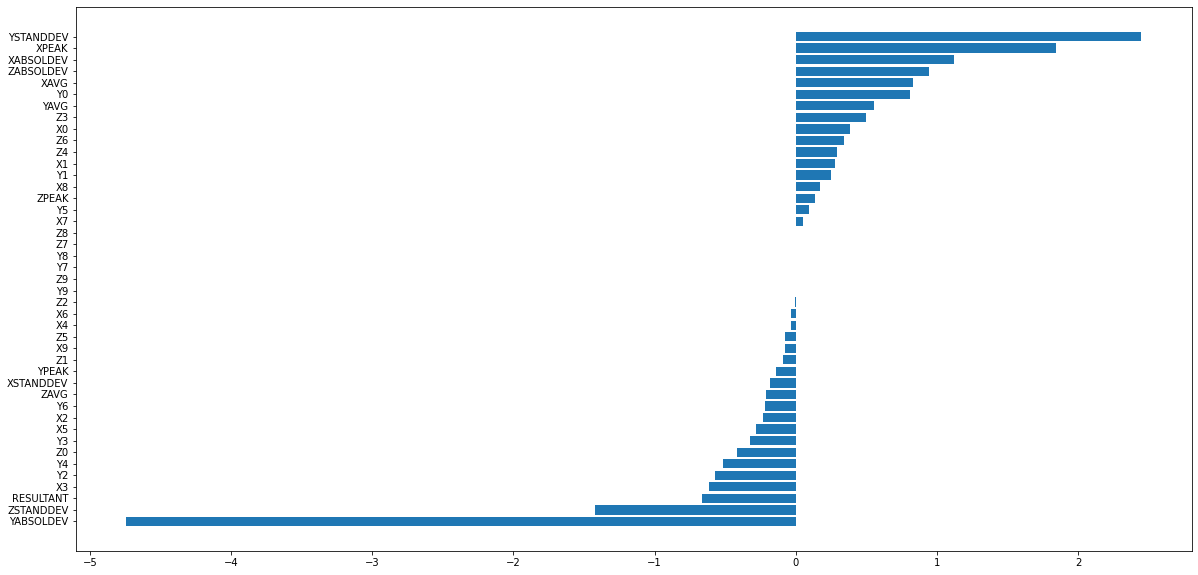

[[ 0  0  0  0  0  0  0  0  0  0  0  0  1 16  0  0  0  0]
 [ 0  0 15  0  0  0  0  0  0  0  0  0  3  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  5 13  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  4  0  0  0  0  0 14  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  5  0  0  0  0  0 13  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0 12  5  0  0  0  0]
 [ 0  0  6  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0]
 [13  0  4  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  6 12  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [ 0  0  3  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


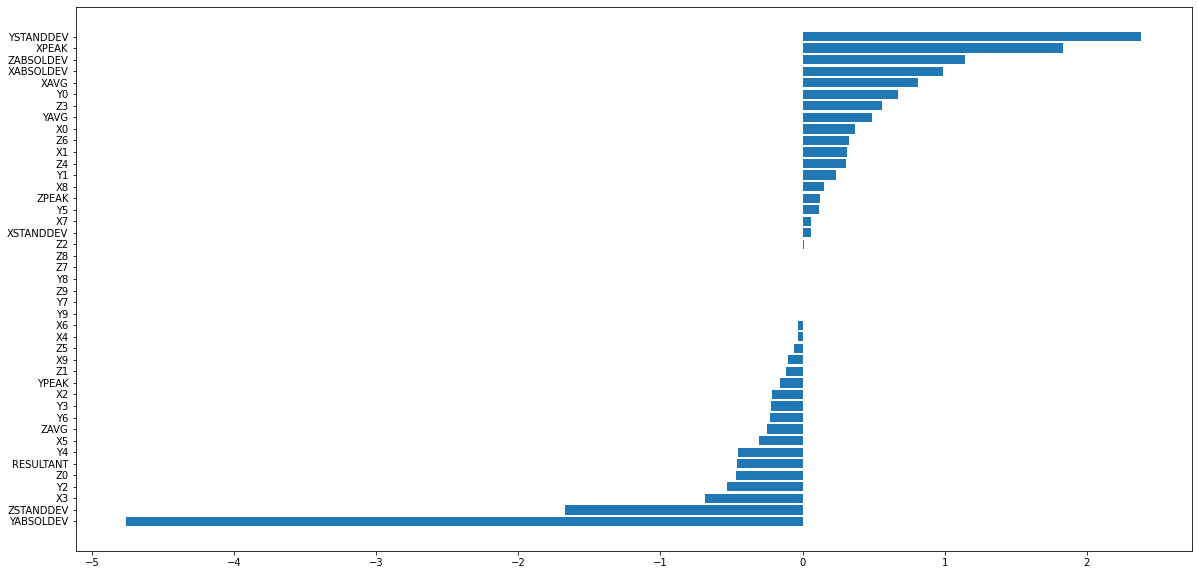

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 2  0  5  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0]
 [ 0  0  3  0  0  0  0  0  0  0  0  0 14  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  0  0  0 12  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  1 16  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2 16  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  1 16  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  0  0  0  0  1 14  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  9  8  0  0  0  0]
 [ 0  0 15  0  0  0  0  0  0  0  0  0  2  1  0  0  0  0]
 [10  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  5 13  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  0  0 16  0  0  0  0  0]
 [ 0  0  7  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


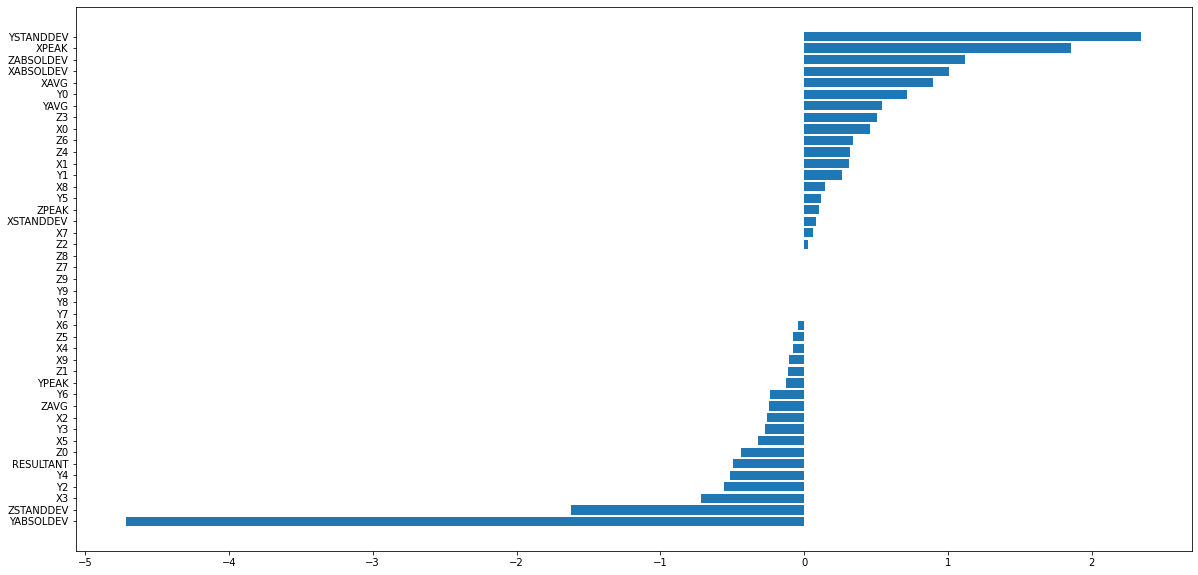

[[ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0]
 [ 0  0  3  0  0  0  0  0  0  0  0  0  5 10  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  6 12  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  3 14  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2 16  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  5 12  0  0  0]
 [ 2  0  3  0  0  0  0  0  0  0  0  0 13  0  0  0  0]
 [ 9  0  5  0  0  0  0  0  0  0  0  0  4  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  7 11  0  0  0]
 [ 0  0  8  0  0  0  0  0  0  0  0  0  8  2  0  0  0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0 11  2  0  0  0]]
              precision    recall  f1-score   support

           0       0.00   

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


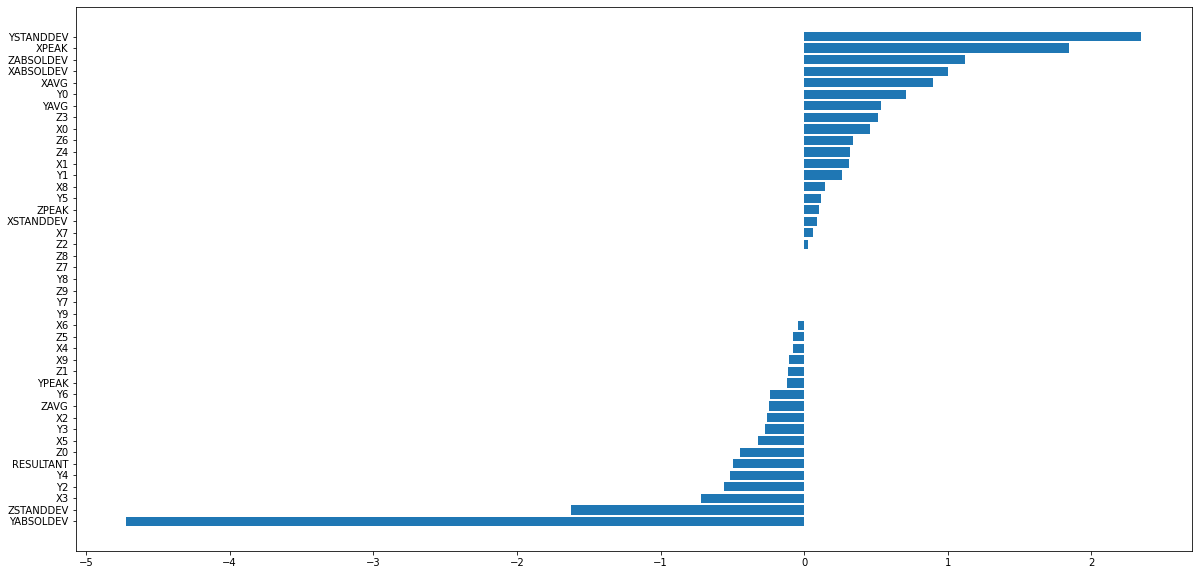

[[ 0  0  0  0  0  0  0  0  0  0  0  0 11  7  0  0  0  0]
 [ 5  0  0  0  0  0  0  0  0  0  0  0 13  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 13  5  0  0  0  0]
 [ 0  0  0  0  0  0  0  4  0  0  0  0  0 14  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  5  0  0  0  0 11  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 12  6  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0 16  1  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0]
 [ 1  0  2  0  0  0  0  0  0  0  0  0 20  5  0  0  0  0]
 [ 0  0  0  0  0  0  0 12  0  0  0  0  1  5  0  0  0  0]
 [ 0  0  0  0  0  0  0  5  0  0  0  0 13  0  0  0  0  0]
 [ 0  0  7  0  0  0  0  1  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


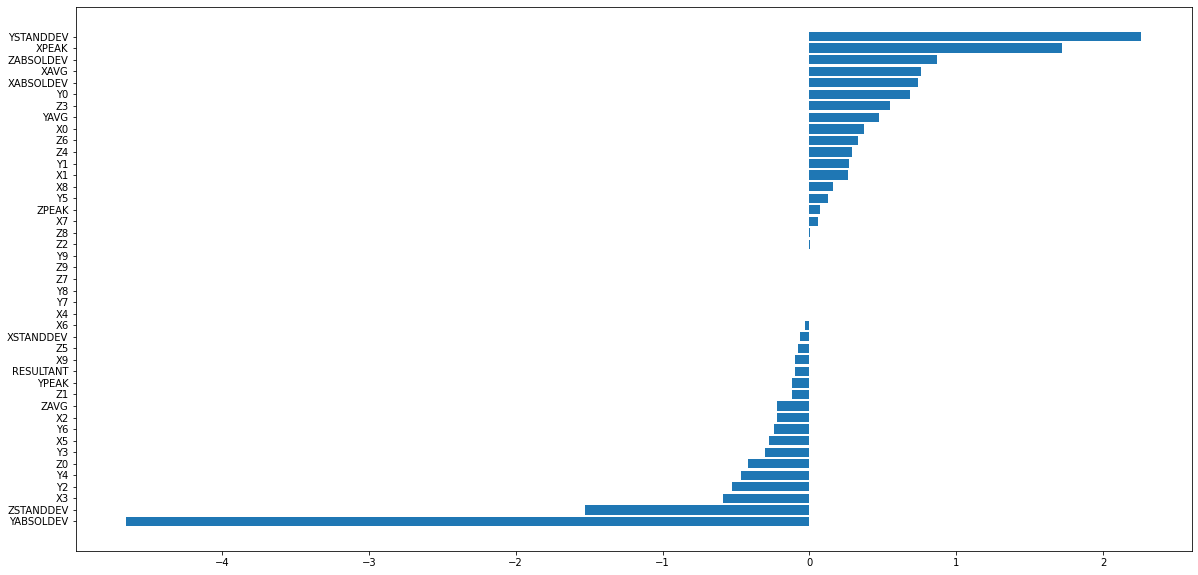

[[ 0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0 17  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  9  9  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  0 16  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  5 13  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2 16  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  4 14  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  0 16  0  0  0]
 [ 0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0]
 [ 0  0 10  0  0  0  0  2  0  0  0  0  1  5  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0 10  6  0  0  0]]
              precision    recall  f1-score   support

           0       0.00   

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


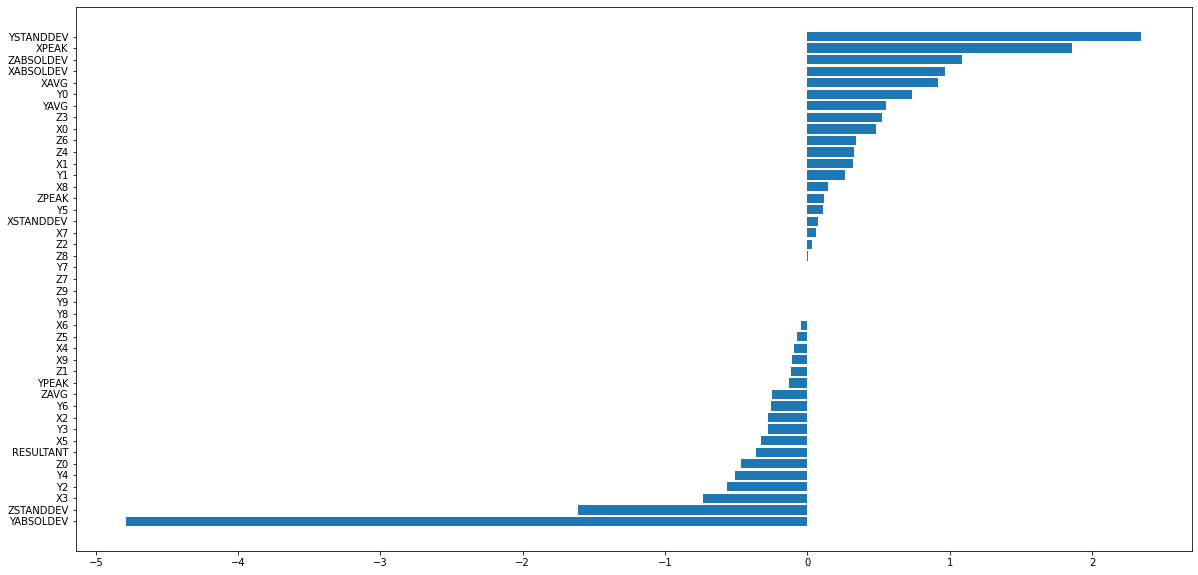

[[ 0  0  0  0  0  0  0  0  0  0  0  0 12  5  0  0  0  0]
 [ 4  0  3  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0]
 [ 0  0  3  0  0  0  0  0  0  0  0  0 12  3  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2 16  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 10  8  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  1 16  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2 16  0  0  0  0]
 [ 0  0  3  0  0  0  0  0  0  0  0  0 12  3  0  0  0  0]
 [ 1  0  3  0  0  0  0  0  0  0  0  0  6  8  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  4 14  0  0  0  0]
 [ 0  0  1  0  0  0  0  3  0  0  0  0  3 11  0  0  0  0]
 [ 0  0  2  0  0  0  0  3  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


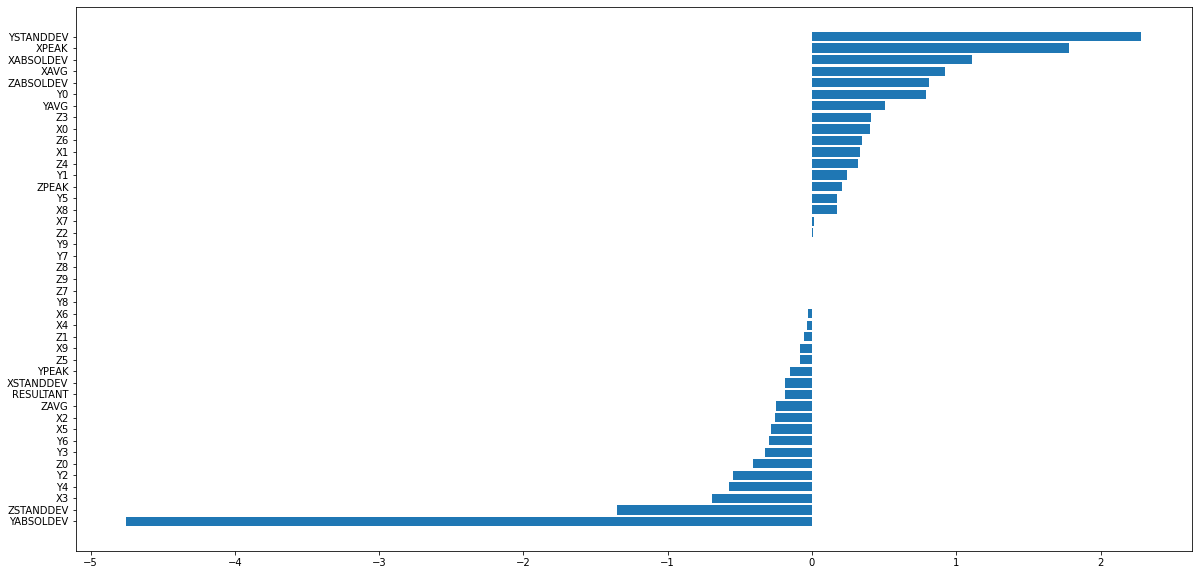

[[ 1  0  7  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0]
 [14  0  1  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [ 0  0  6  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  0  0  8  8  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  7 10  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2 16  0  0  0  0]
 [ 0  0  6  0  0  0  0  0  0  0  0  0 10  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  3 15  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  0  0  3 13  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  7 10  0  0  0  0]
 [ 0  0  1  0  0  0  0  2  0  0  0  0  0 15  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  3  0  0  0  0  0  0  0  0  0  9  6  0  0  0  0]
 [ 0  0  8  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0 15 13  0  0  0  0]
 [ 1  0 15  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [ 0  0 13  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


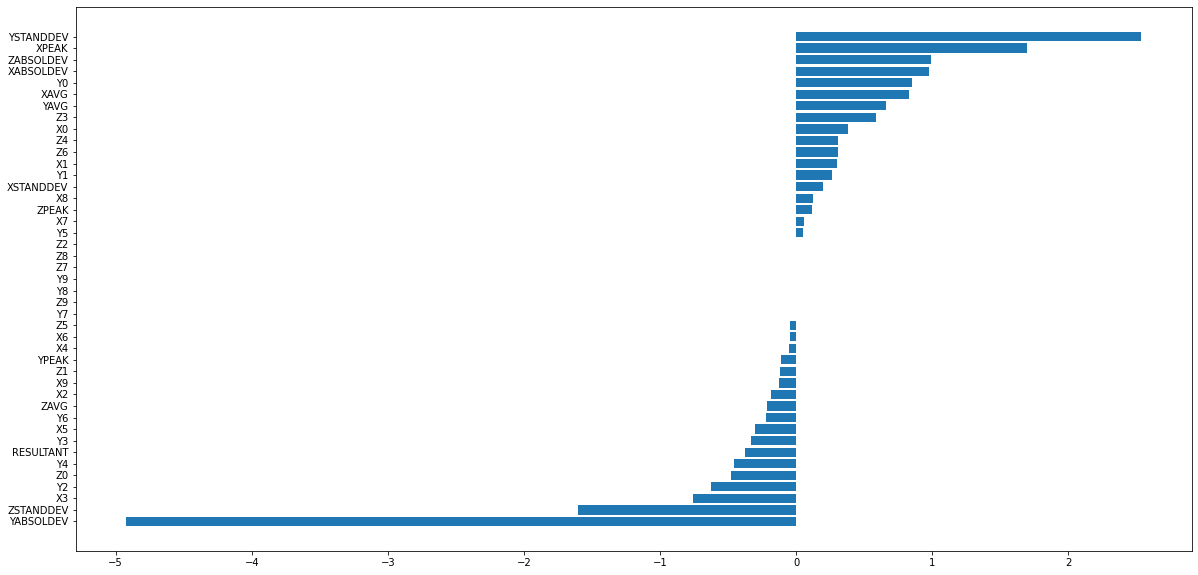

[[ 3  0  8  0  0  0  0  0  0  0  0  0  5  1  0  0  0  0]
 [13  0  2  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [ 2  0  1  0  0  0  0  0  0  0  0  0 14  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 27 13  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 10 19  0  0  0  0]
 [ 0  0  0  0  0  0  0  6  0  0  0  0  3  9  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 17  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  5 13  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  3 14  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  0 16  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  4  0  0  0  0  0 14  0  0  0  0]
 [ 0  0  9  0  0  0  0  0  0  0  0  0  8  1  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  0  0 16  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  8  9  0  0  0  0]
 [ 0  0  3  0  0  0  0  0  0  0  0  0 15  0  0  0  0  0]
 [ 0  0  8  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


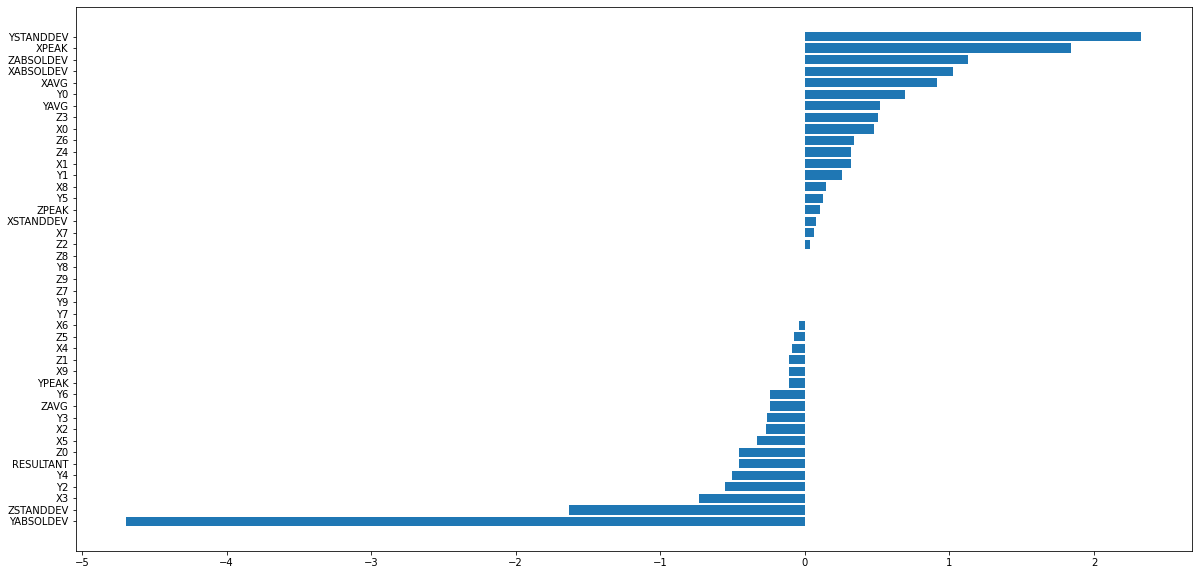

[[ 0  0  7  0  0  0  0  0  0  0  0  0  5  6  0  0  0  0]
 [ 3  0  4  0  0  0  0  0  0  0  0  0 10  1  0  0  0  0]
 [ 0  0  6  0  0  0  0  0  0  0  0  0  9  3  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  1 16  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  1 16  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  0  0  3 13  0  0  0  0]
 [ 0  0 13  0  0  0  0  0  0  0  0  0  3  2  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0 13  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


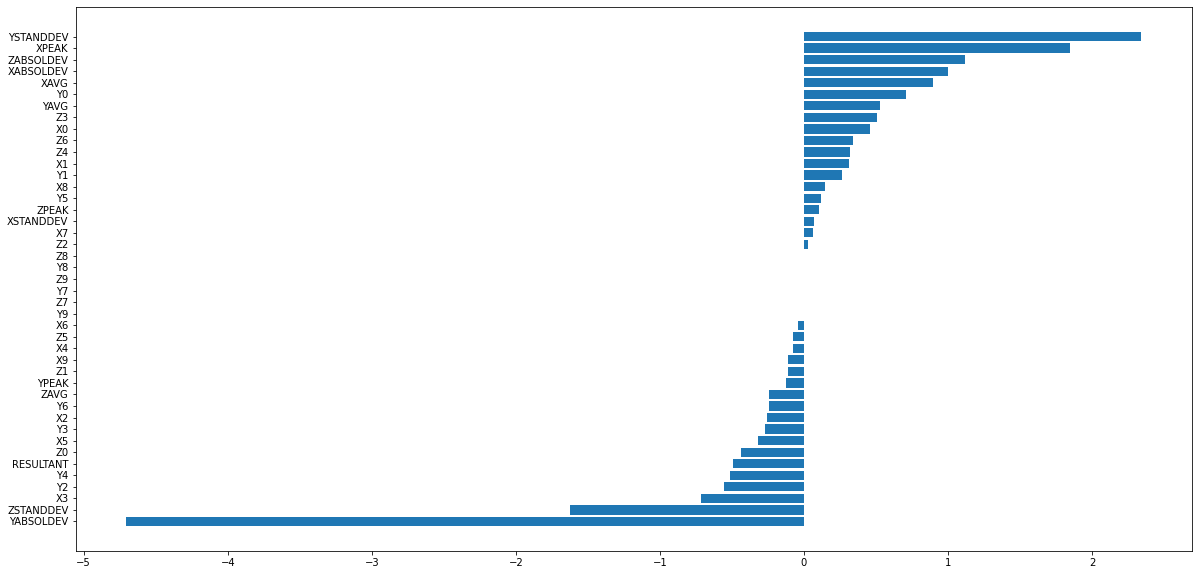

[[ 0  0  0  0  0  0  0  0  0  0  0  0  6 12  0  0  0  0]
 [ 2  0 13  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  7 10  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2 15  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0]
 [ 0  0  4  0  0  0  0  3  0  0  0  0  5  6  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  9  9  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0 11  6  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  1 16  0  0  0  0]
 [ 0  0  3  0  0  0  0  0  0  0  0  0 10  5  0  0  0  0]
 [ 4  0  4  0  0  0  0  0  0  0  0  0  8  2  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  5 13  0  0  0  0]
 [ 0  0  6  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0]
 [ 0  0 12  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


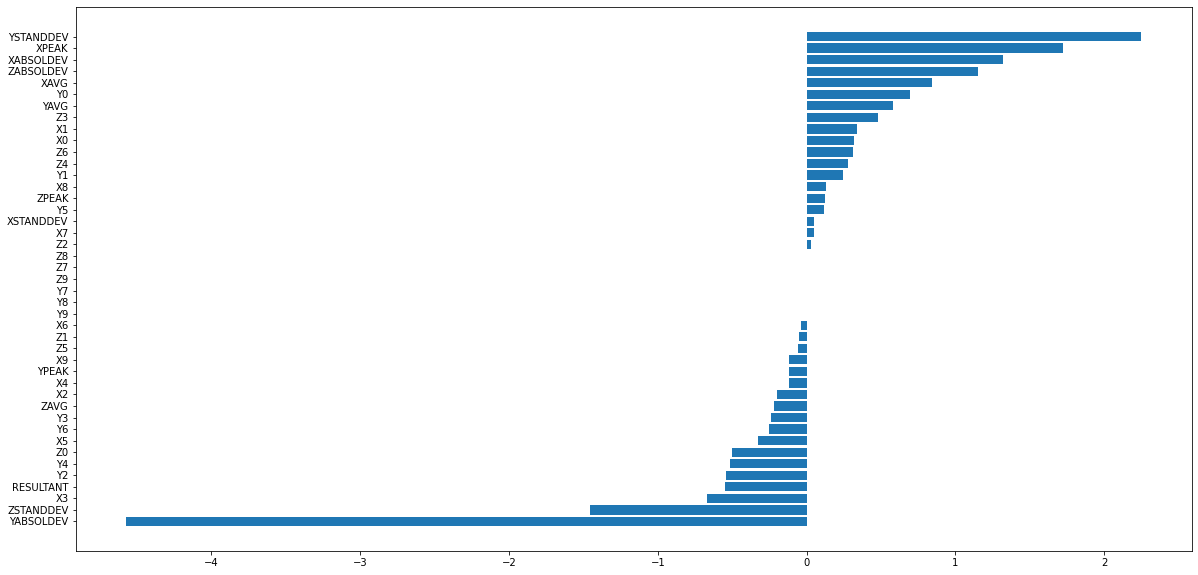

[[ 0  0  2  0  0  0  0  0  0  0  0  0 12  4  0  0  0  0]
 [ 0  0 16  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  0  0  9  7  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  5 13  0  0  0  0]
 [ 0  0  1  0  0  0  0  1  0  0  0  0  0 16  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0 12  0  2  0  0  0  4  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  3 15  0  0  0  0]
 [ 0  0  1  0  0  0  0  1  0  0  0  0  1 15  0  0  0  0]
 [ 0  0  1  0  0  0  0 16  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 18 21  0  0  0  0]
 [ 0  0  1  0  0  0  0  3  0  0  0  0 13  1  0  0  0  0]
 [ 0  0  2  0  0  0  0  2  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


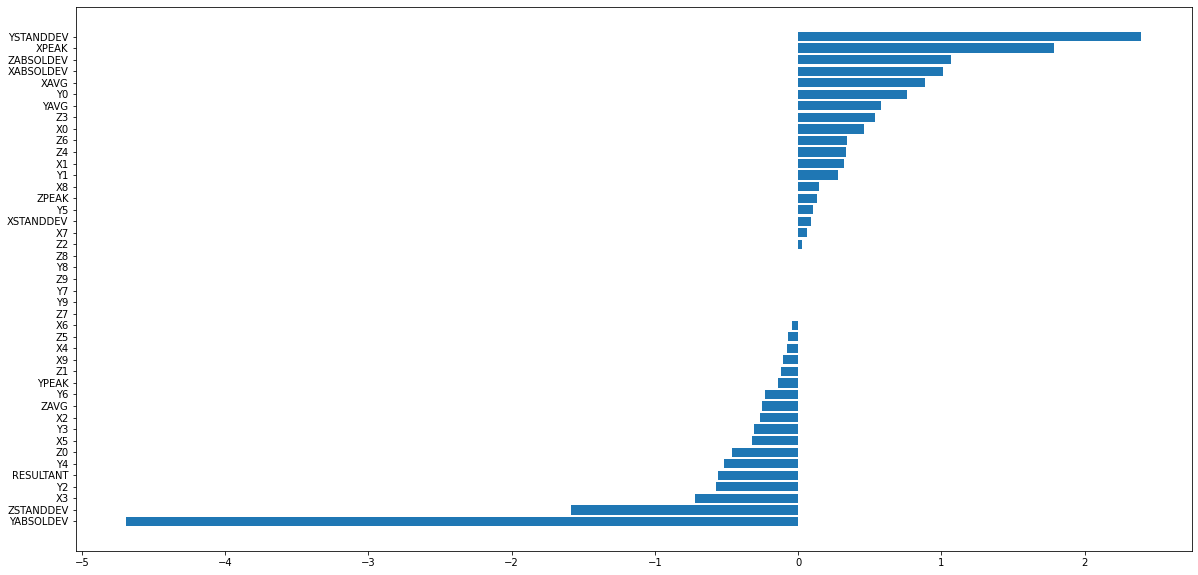

[[ 0  0  2  0  0  0  0  0  0  0  0  0 15  1  0  0  0  0]
 [ 8  0  8  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [ 0  0  7  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0 13  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0 14  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0 17  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0 15  2  0  0  0  0]
 [ 0  0 14  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0]
 [ 8  0  8  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


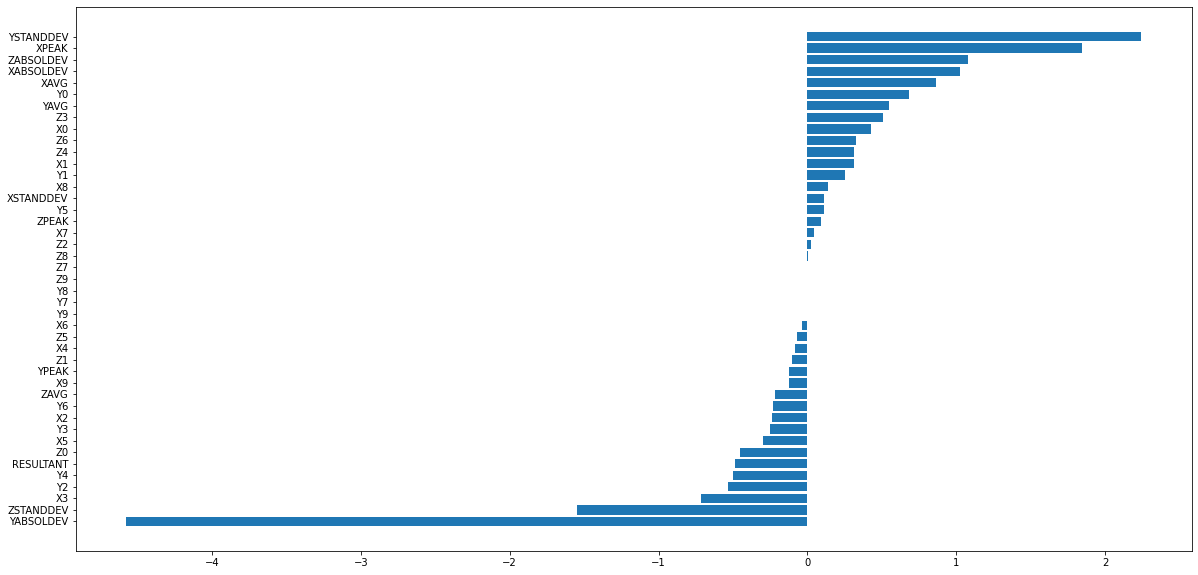

[[ 0  0  2  0  0  0  0  0  0  0  0  0  7  9  0  0  0  0]
 [ 9  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  0  0  0 13  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  0  0  0 14  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  4  0  0  0  0  1 13  0  0  0  0]
 [ 0  0  0  0  0  0  0  4  0  0  0  0  2 12  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  3 14  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  9 21  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  0  0  0  0  1 14  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  0  0  0 10  4  0  0  0  0]
 [ 0  0  9  0  0  0  0  1  0  0  0  0  4  4  0  0  0  0]
 [17  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2 16  0  0  0  0]
 [ 0  0 16  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [ 0  0  7  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


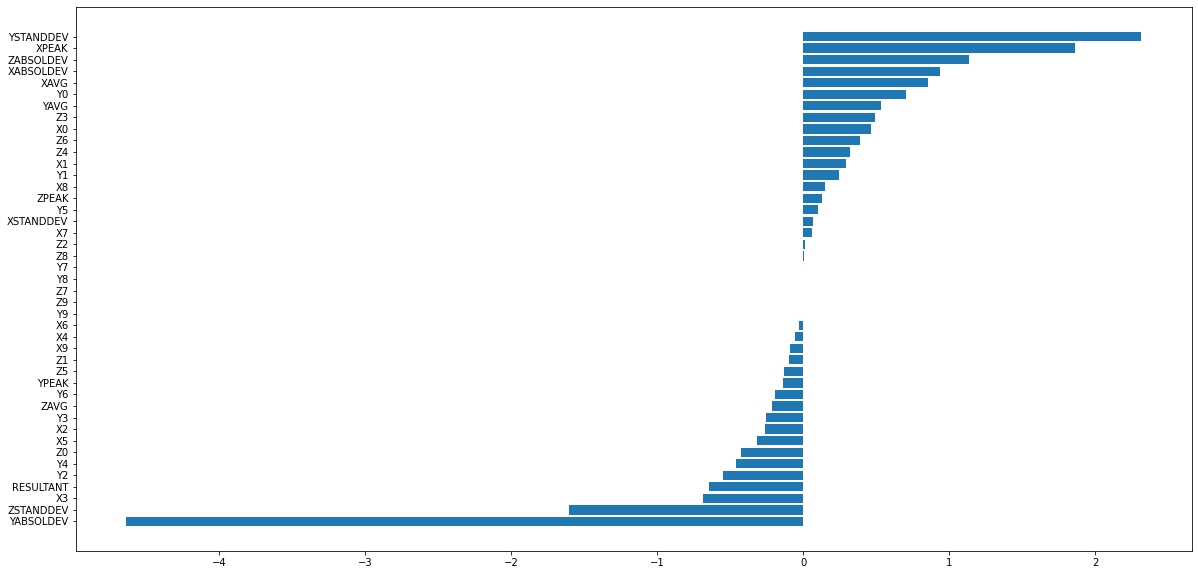

[[ 0  0 10  0  0  0  0  0  0  0  0  0  2  6  0  0  0  0]
 [ 0  0 13  0  0  0  0  0  0  0  0  0  4  1  0  0  0  0]
 [ 0  0  3  0  0  0  0  0  0  0  0  0 10  5  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2 16  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  5  0  0  0  0  3 10  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  7 11  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  3 15  0  0  0  0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  2 11  0  0  0  0]
 [ 0  0  7  0  0  0  0  1  0  0  0  0  9  1  0  0  0  0]
 [ 0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 10  8  0  0  0  0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0 13  0  0  0  0  0]
 [ 0  0 12  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


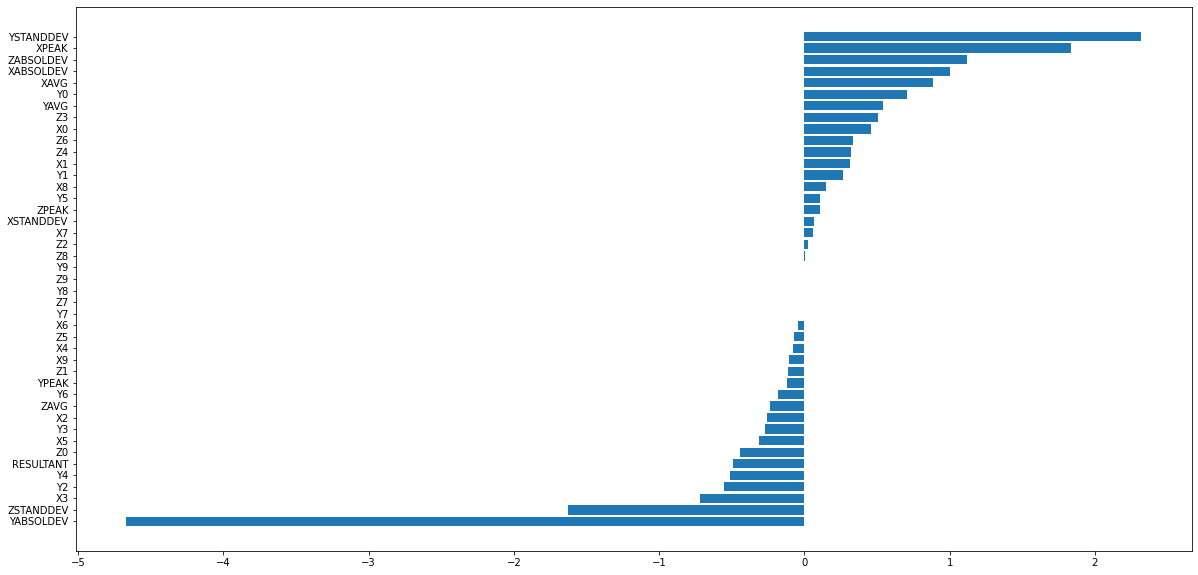

[[ 0  0  1  0  0  0  0  2  0  0  0  0  6  9  0  0  0  0]
 [10  0  1  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0]
 [ 0  0  2  0  0  0  0 11  0  0  0  0  2  3  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  4 14  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 24 21  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  3 15  0  0  0  0]
 [ 0  0  0  0  0  0  0  6  0  0  0  0  1 11  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  3 15  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 10  8  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  2 15  0  0  0  0]
 [ 0  0  1  0  0  0  0  1  0  0  0  0 10  6  0  0  0  0]
 [12  0  2  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 12  5  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0]
 [ 0  0 11  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


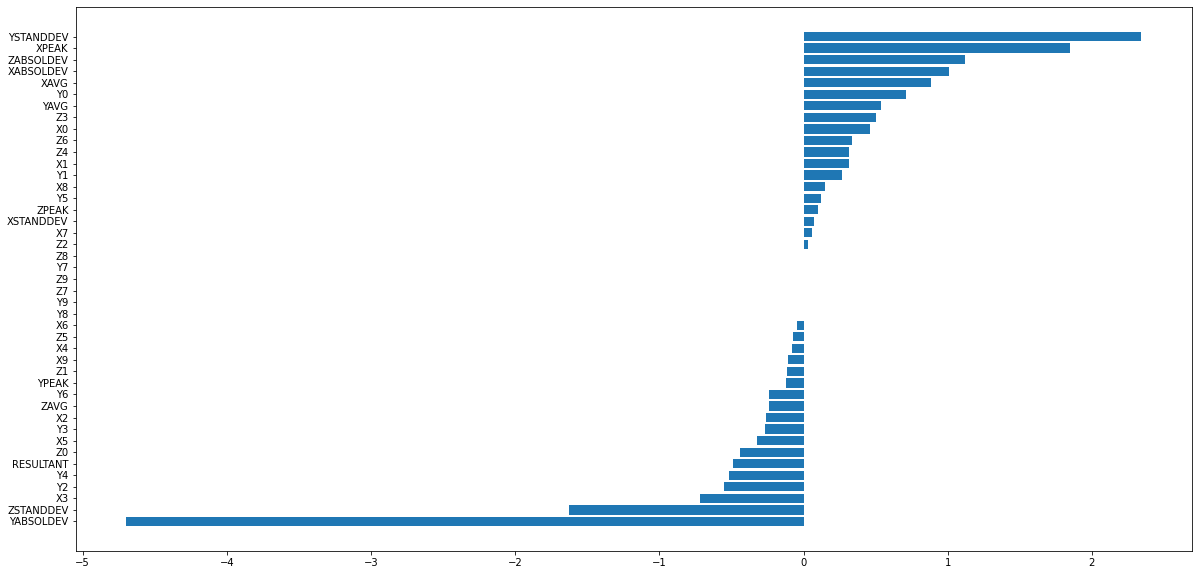

[[ 0  0  1  0  0  0  0  0  0  0  0  0 13  4  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0]
 [ 0  0  7  0  0  0  0  0  0  0  0  0  4  7  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  2 15  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  3  0  0  0  0  1  0  0  0  0  5  9  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  3 15  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  4 14  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  5 13  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2 16  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  0  0  1 15  0  0  0  0]
 [ 0  0 17  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 3  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [ 0  0  9  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


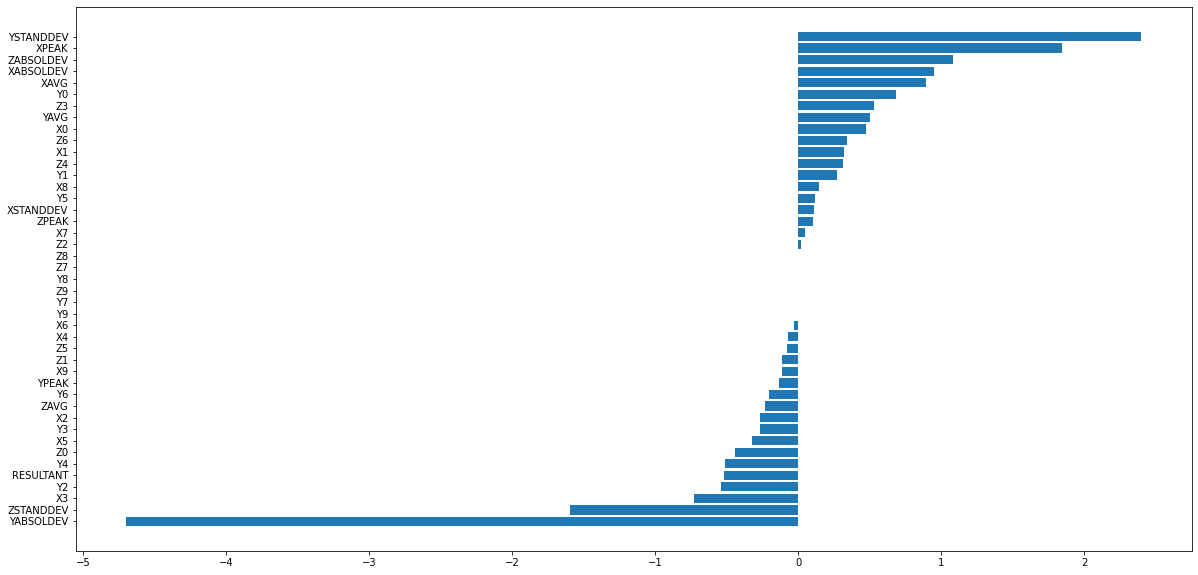

[[ 0  0  3  0  0  0  0  0  0  0  0  0  2 13  0  0  0  0]
 [ 0  0 17  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  0  0 13  3  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  4  0  0  0  0  0 14  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2 16  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2 16  0  0  0  0]
 [ 0  0  6  0  0  0  0  0  0  0  0  0  3  9  0  0  0  0]
 [ 0  0 12  0  0  0  0  1  0  0  0  0  4  1  0  0  0  0]
 [ 0  0 17  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 13  5  0  0  0  0]
 [ 0  0 16  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [ 0  0 11  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


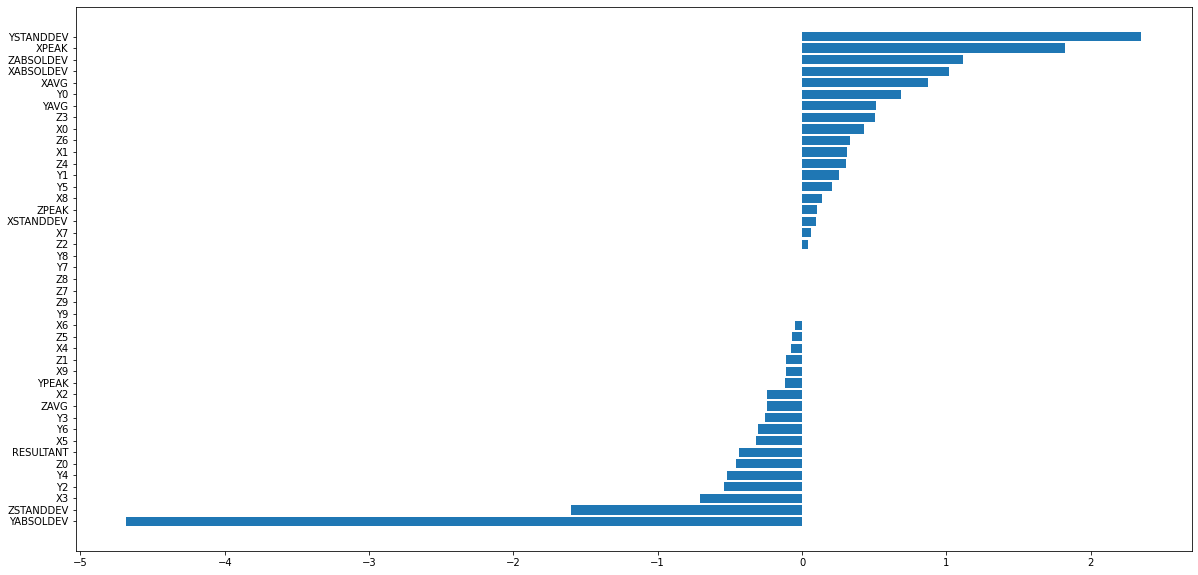

[[ 0  0  6  0  0  0  0  0  0  0  0  0  6  6  0  0  0  0]
 [ 0  0 13  0  0  0  0  0  0  0  0  0  5  0  0  0  0  0]
 [ 0  0  9  0  0  0  0  0  0  0  0  0  2  7  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  3 15  0  0  0  0]
 [ 0  0 12  0  0  0  0  0  0  0  0  0  3  3  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  0  0  1 15  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  0  0  8  8  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  0  0  0  0  0 15  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  1 16  0  0  0  0]
 [ 0  0 12  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0]
 [ 0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  0 13  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2 16  0  0  0  0]
 [ 0  0  9  0  0  0  0  2  0  0  0  0  7  0  0  0  0  0]
 [ 0  0 14  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


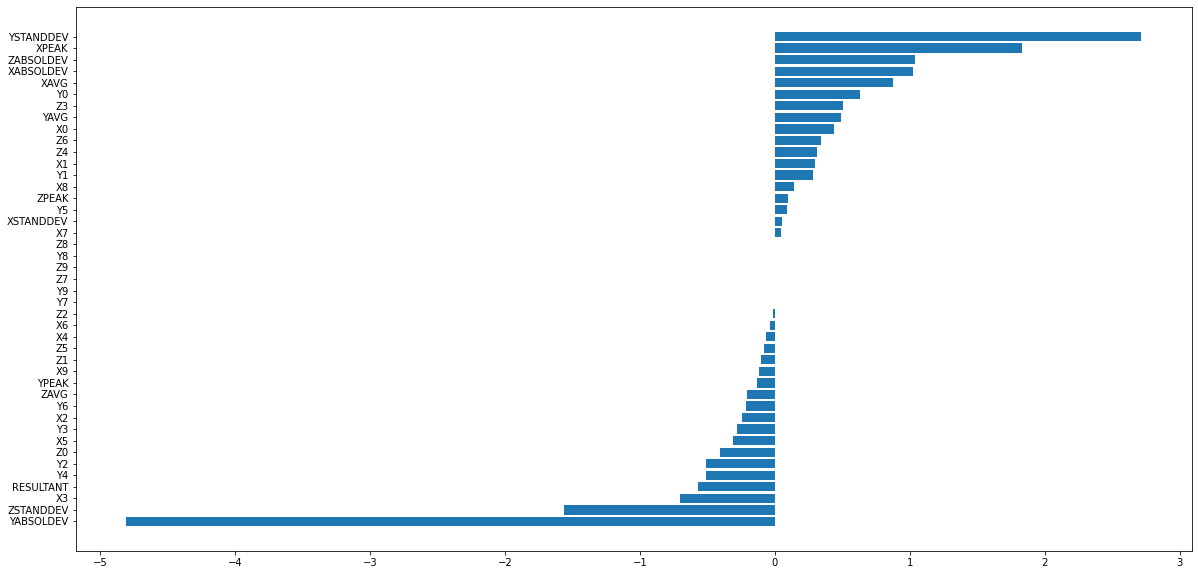

[[ 0  0  0  0  0  0  0  0  0  0  0  0  2 16  0  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  6 11  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2 16  0  0  0  0]
 [ 0  0  1  0  0  0  0  2  0  0  0  0  4 11  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2 16  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  9  9  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 14  4  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  0  0  0 13  1  0  0  0  0]
 [15  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 13  5  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


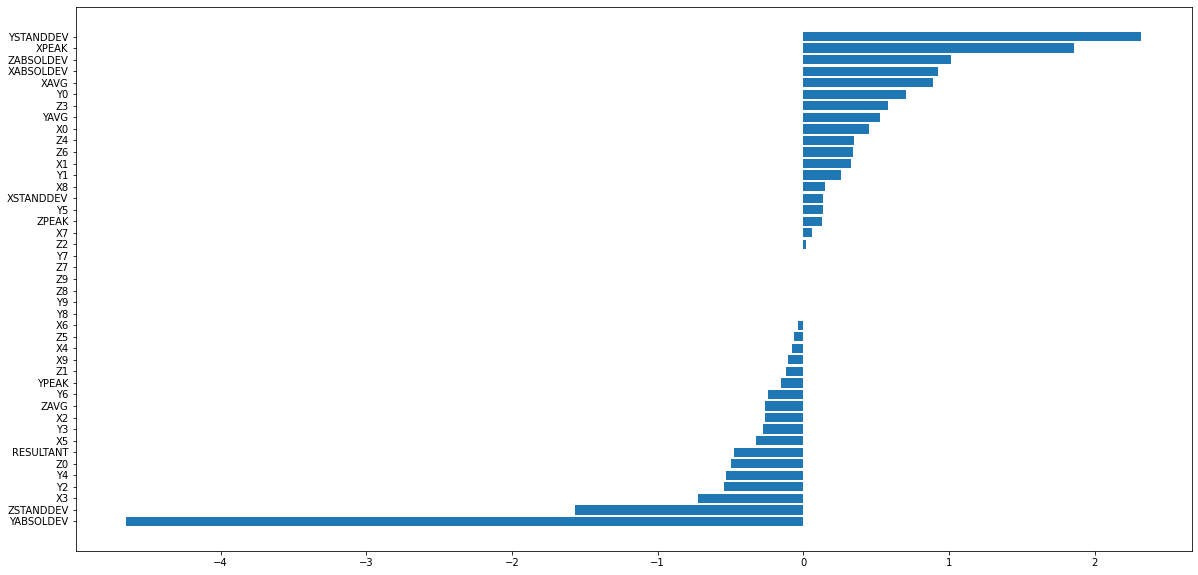

[[ 0  0  5  0  0  0  0  0  0  0  0  0  5  8  0  0  0  0]
 [ 0  0 11  0  0  0  0  0  0  0  0  0  2  5  0  0  0  0]
 [ 0  0  8  0  0  0  0  0  0  0  0  0  9  1  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  8  9  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  4  0  1  0  0  0 13  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0]
 [ 0  0  1  0  0  0  0  2  0  0  0  0  0 15  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  0  0  8  8  0  0  0  0]
 [ 0  0 15  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [ 0  0 17  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [ 0  0 15  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [ 0  0 12  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


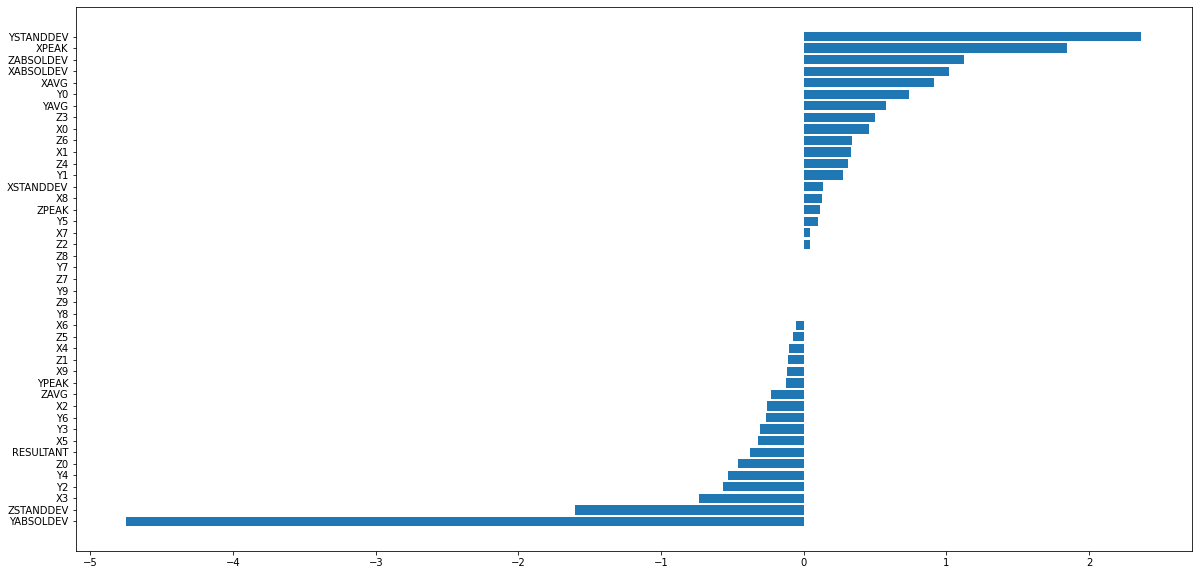

[[ 0  0  1  0  0  0  0  0  0  0  0  0  3 14  0  0  0  0]
 [ 1  0  5  0  0  0  0  0  0  0  0  0 10  2  0  0  0  0]
 [ 0  0  9  0  0  0  0  0  0  0  0  0  6  3  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  7 10  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  8 10  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2 16  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  1 16  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  1 16  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2 16  0  0  0  0]
 [ 0  0 11  0  0  0  0  0  0  0  0  0  5  2  0  0  0  0]
 [ 6  0  5  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0]
 [ 3  0 14  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  9  9  0  0  0  0]
 [ 0  0  1  0  0  0  0  1  0  0  0  0  4 12  0  0  0  0]
 [ 0  0 14  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


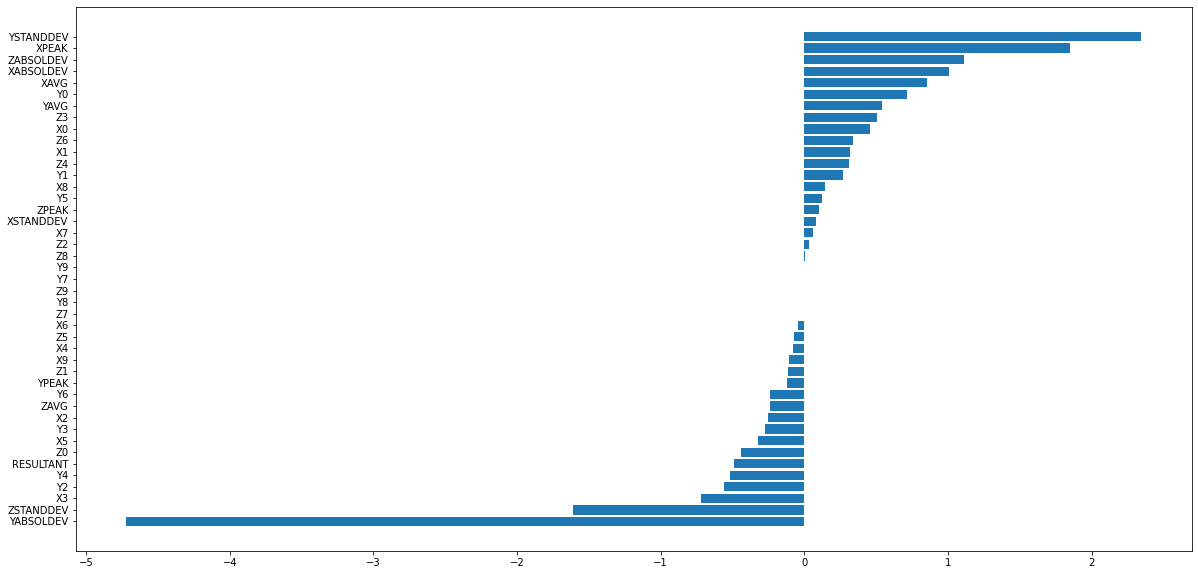

[[ 0  0  0  0  0  0  0  1  0  0  0  0  2 15  0  0  0  0]
 [14  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 12  0  0  0  0  0  0  0  0  0  5  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  3 15  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  0  0  0  0  2 13  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  9  9  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2 16  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0 17  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0 16  1  0  0  0  0]
 [ 2  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 17  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 15  3  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0 13  3  0  0  0  0]
 [ 0  0 11  0  0  0  0  1  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


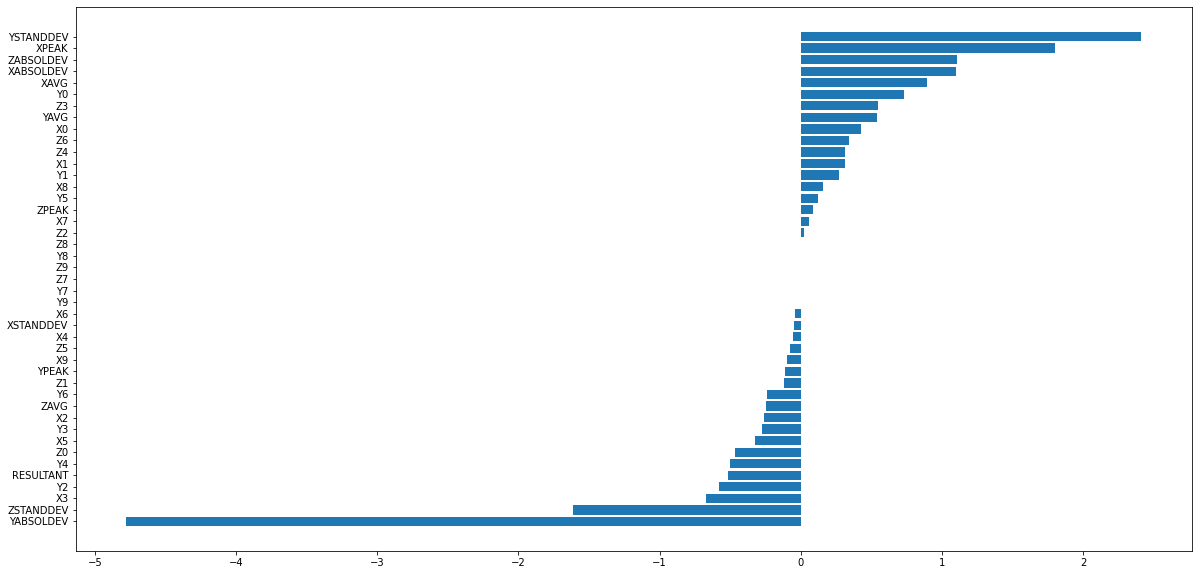

[[ 0  0 12  0  0  0  0  0  0  0  0  0  3  3  0  0  0  0]
 [ 1  0 16  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0 13  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  3 15  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  0  0  0  0  0 15  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  3 15  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  5 13  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  0 16  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  7 10  0  0  0  0]
 [ 0  0 14  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0]
 [ 0  0 15  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  6 12  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0]
 [ 0  0 13  0  0  0  0  1  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


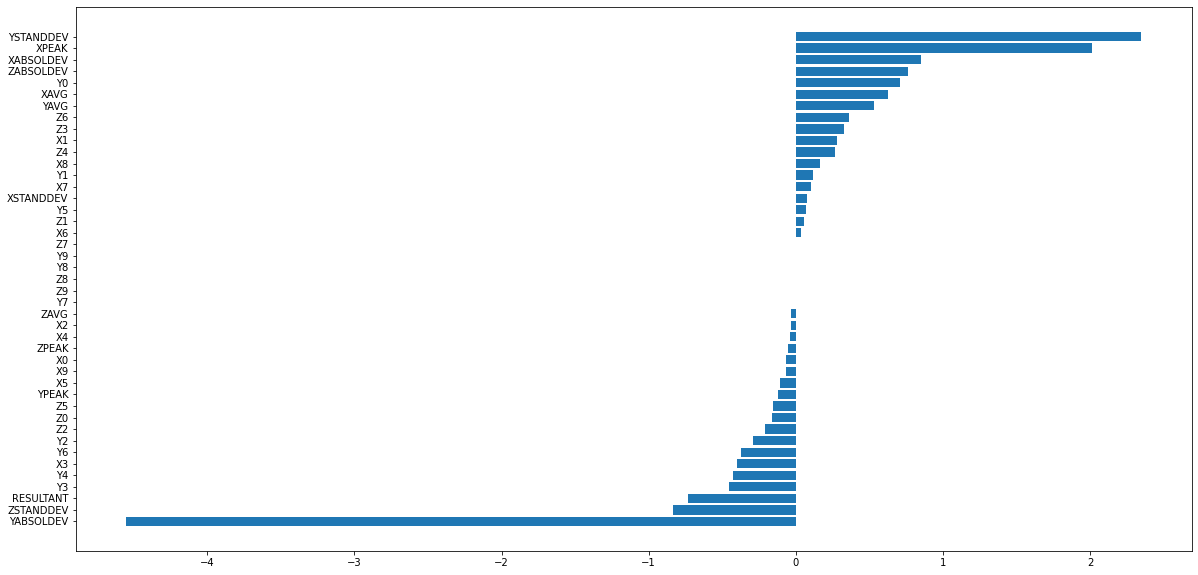

[[ 0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 13  8  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2 21  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 22  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  5 17  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  9 14  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  3 19  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  5 17  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  7 16  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 22  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 13  9  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0 10 12  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 22  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  3 19  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 23  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.00      0.00      0.00        22
           2       0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


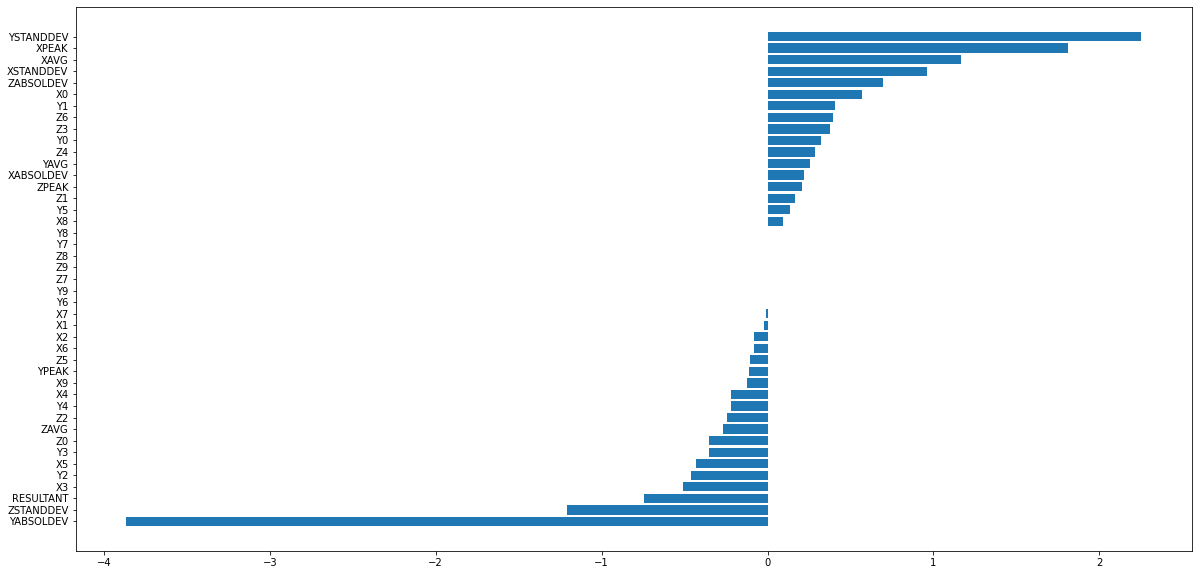

[[ 0  0  0  0  0  0  0  0  0  0  0  0 22  0  0  0]
 [ 1  0  9  0  0  0  0  0  0  0  0  0 12  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 14  8  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0 22  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 22  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 22  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 23  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 22  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  3 19  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 23  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  1 20  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 15  7  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  9 14  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0 21  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 22  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  6 16  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.00      0.00      0.00        22
           2       0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


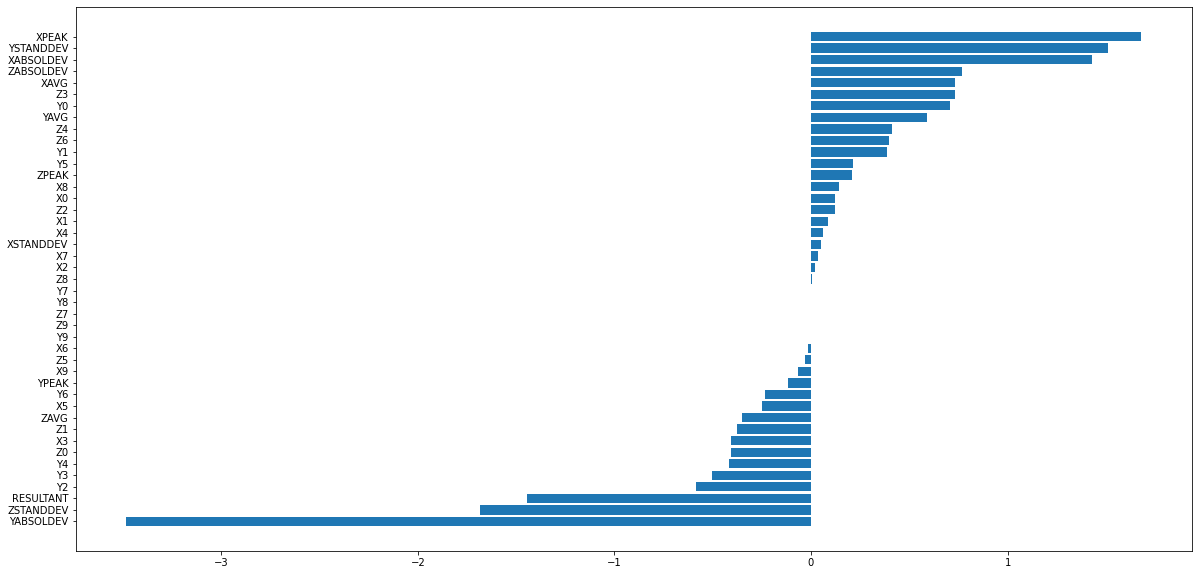

[[ 0  0  1  0  0  0  0  0  0  0  0  0 21  0  0  0  0]
 [ 2  0 14  0  0  0  0  0  0  0  0  0  6  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 20  2  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 22  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 22  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 22  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 23  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 22  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0 21  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0 22  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 22  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  5 17  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  7 16  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  3 19  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 22  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 23  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  4 18  0  0  0]]
              precision    recall  f1-score   support

           0       0.00   

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


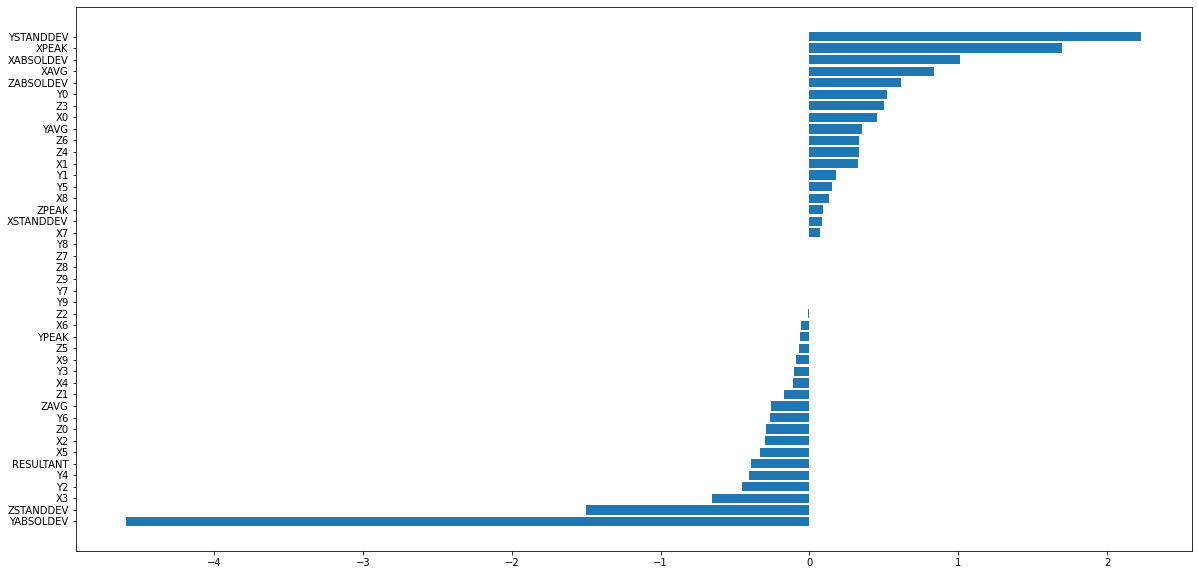

[[ 0  0  0  0  0  0  0  0  0  0  0  0 22  0  0  0]
 [21  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2 20  0  0]
 [ 0  0  0  0  0  0  0  1  0  4  0  0  1 17  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 13  9  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  4 17  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 22  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 21  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 22  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2 21  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 13  9  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  7 15  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  4 19  0  0]
 [ 0  0  0  0  0  0  0  2  0  1  0  0  1 18  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  7 15  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  7 16  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.00      0.00      0.00        22
           2       0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


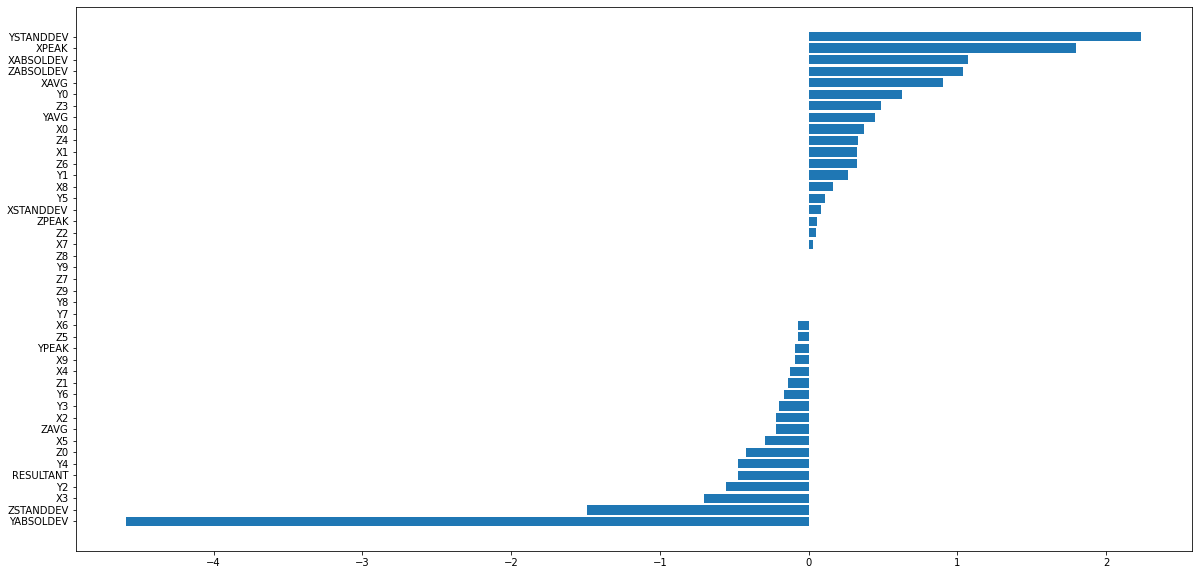

[[ 0  0  4  0  0  0  0  0  0  0  0  0 14  0  0  0  0  0]
 [ 2  0 10  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2 16  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2 16  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  5 13  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  2 15  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  3 13  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  5 13  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0 15  2  0  0  0  0]
 [ 0  0  9  0  0  0  0  0  0  0  0  0  9  0  0  0  0  0]
 [10  0  1  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0]
 [ 2  0  9  0  0  0  0  0  0  0  0  0  6  1  0  0  0  0]
 [ 1  0 10  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


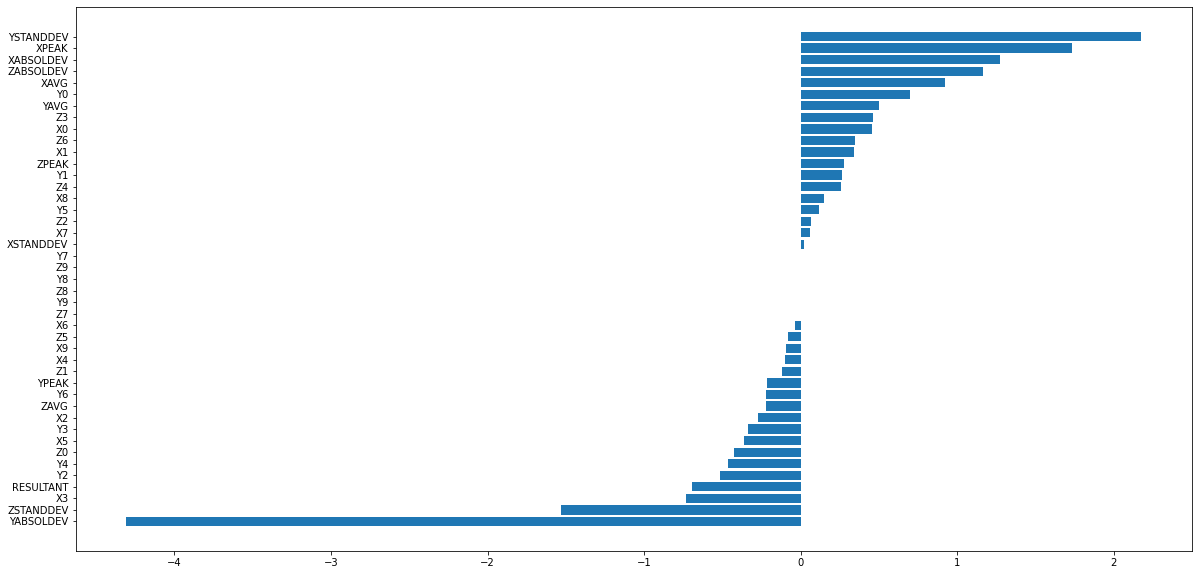

[[ 0  0  1  0  0  0  0  0  0  0  0  0 16  0  0  0]
 [15  0  1  0  0  0  0  0  0  0  0  0  2  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  2 15  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  6 12  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 12  6  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0 16  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  4 14  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  4 14  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0 21  9  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  4 13  0  0]
 [ 1  0  5  0  0  0  0  1  0  0  0  0  6  5  0  0]
 [ 0  0 10  0  0  0  0  0  0  0  0  0  8  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  6 12  0  0]
 [ 0  0  0  0  0  0  0  9  0  0  0  0  7  2  0  0]
 [ 0  0  8  0  0  0  0  0  0  0  0  0  7  3  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.00      0.00      0.00        18
           2       0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


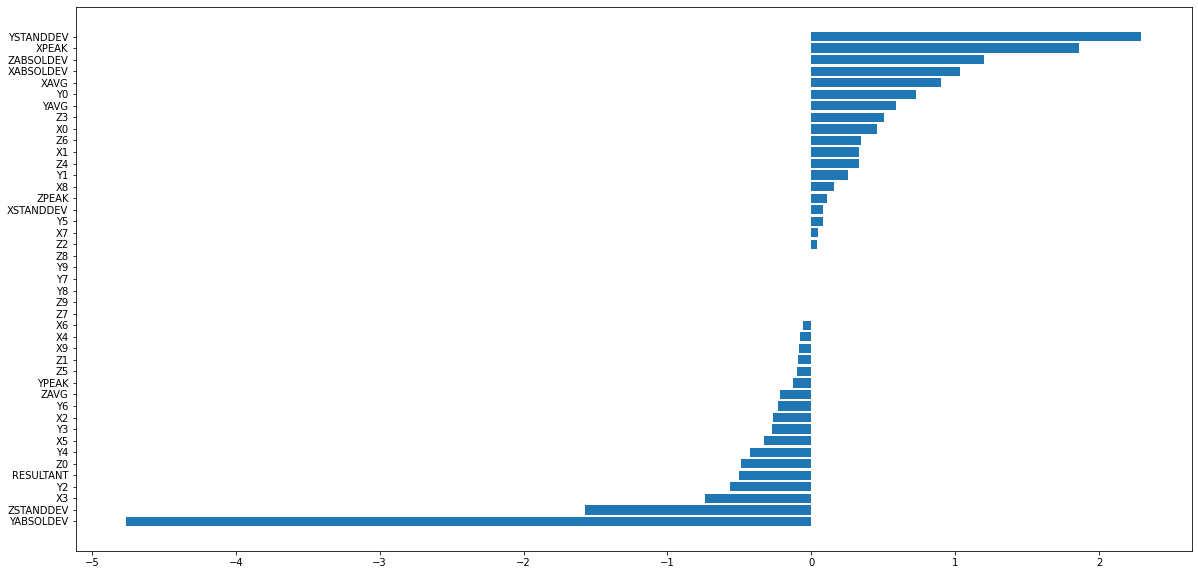

[[ 0  0  5  0  0  0  0  0  0  0  0  0  1 11  0  0  0  0]
 [ 2  0 11  0  0  0  0  0  0  0  0  0  4  1  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  0  0  9  7  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2 16  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  4 14  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2 16  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2 16  0  0  0  0]
 [ 0  0  3  0  0  0  0  0  0  0  0  0  7  8  0  0  0  0]
 [ 0  0 15  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [ 6  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  2 15  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  9  9  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


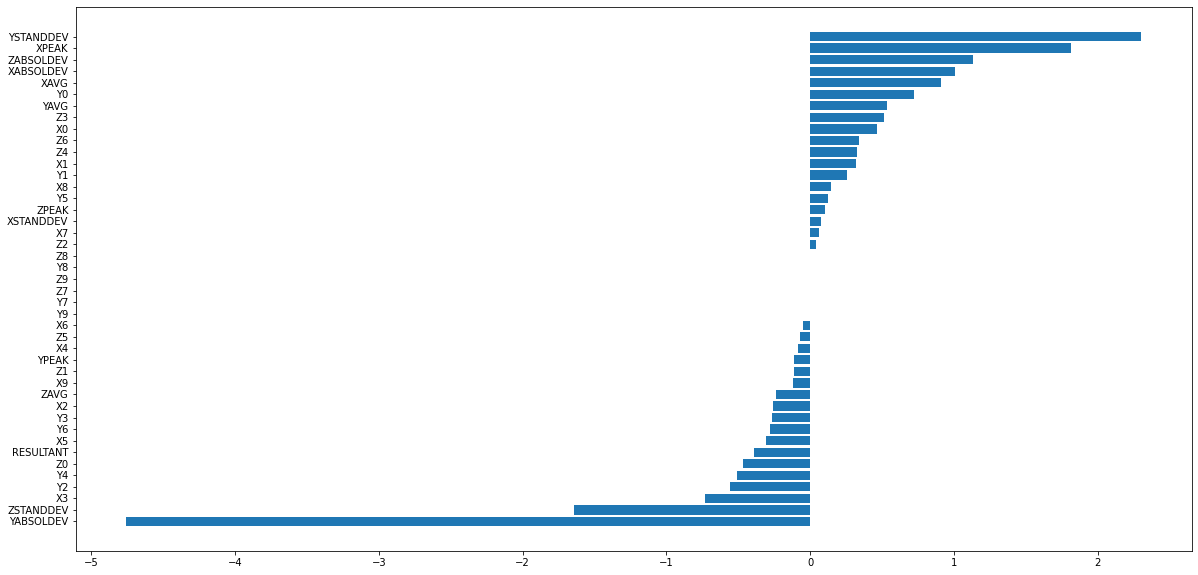

[[ 0  0  0  0  0  0  0  1  0  0  0  0 16  0  0  0  0  0]
 [ 0  0  5  0  0  0  0  3  0  0  0  0 10  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  1  0  0  0  0 15  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  4  0  0  0  0 14  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  3  0  0  0  0 14  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0 16  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0 17  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  1  0  0 13  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  1  0  0  0  0 28  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0]
 [ 0  0  3  0  0  0  0  0  0  0  0  0 15  0  0  0  0  0]
 [ 0  0  5  0  0  0  0  7  0  0  0  0 15  0  0  0  0  0]
 [ 0  0  8  0  0  0  0  1  0  0  0  0 16  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0]
 [ 0  0  6  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0]
 [ 0  0  7  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


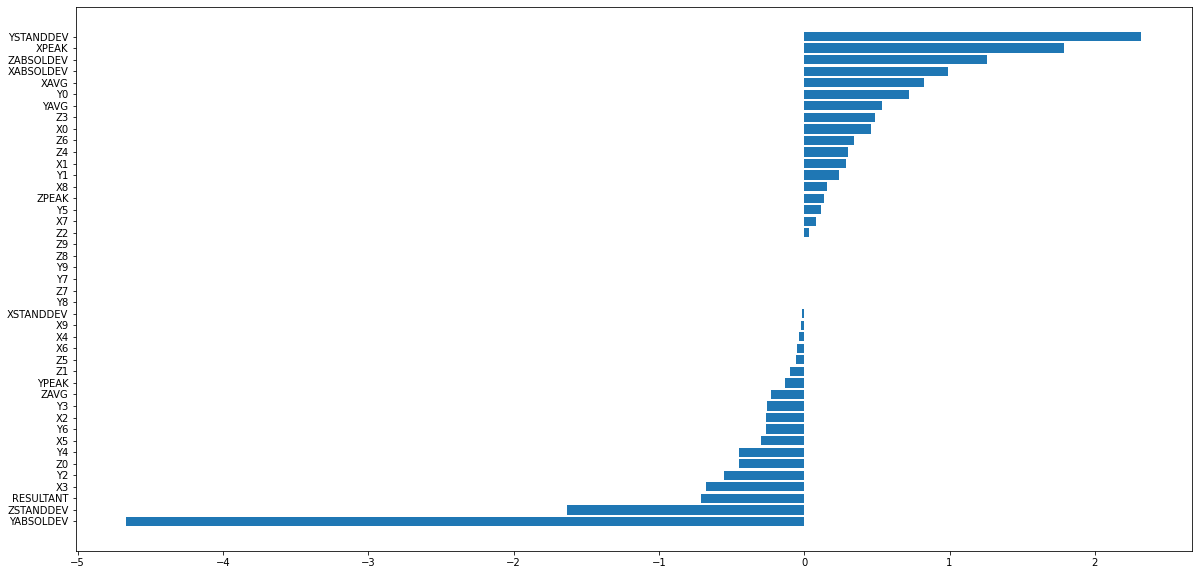

[[ 0  0  0  0  0  0  0  0  0  0  0  0  8  9  0  0  0  0]
 [16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  1  0  0  0  0 22  5  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  3 15  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 13  5  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  5 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  4  0  0  0  0  6  8  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  2 15  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  1 16  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 11  7  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0 15  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  7 11  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


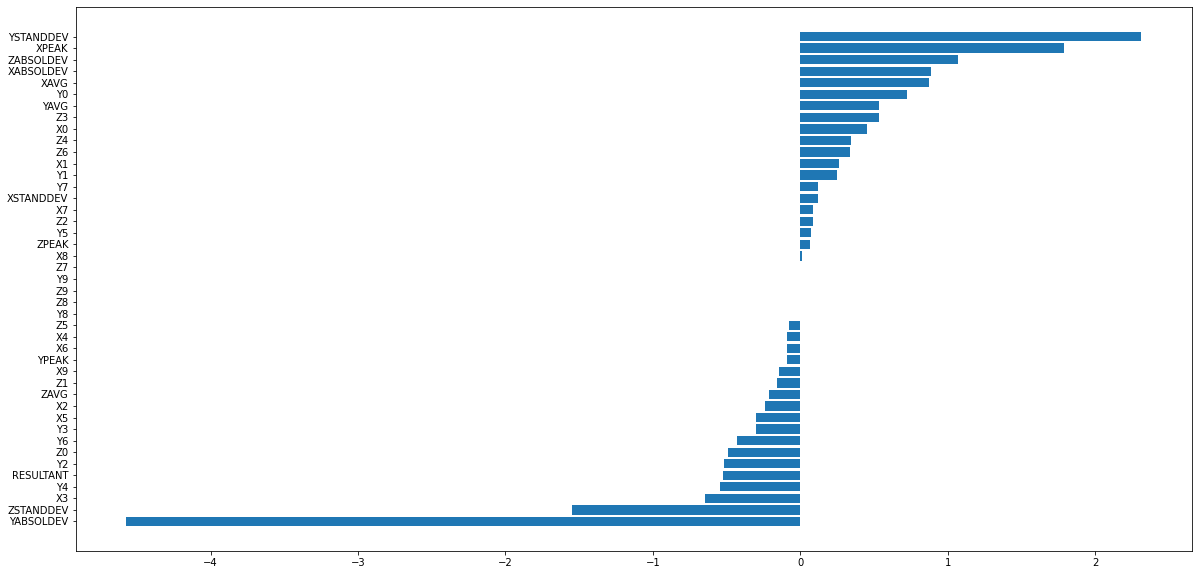

[[ 0  0  8  0  0  0  0  0  0  0  0  0  3  6  0  0  0  0]
 [ 0  0 12  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0]
 [ 1  0  7  0  0  0  0  0  0  0  0  0  8  2  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0 12  0  0  0  0  0  0  0  0  0  1  5  0  0  0  0]
 [ 0  0  1  0  0  0  0  1  0  0  0  0  1 15  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  0  0  0  2 12  0  0  0  0]
 [ 0  0  2  0  0  0  0  1  0  0  0  0  3 12  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  0  0  0  0  1 14  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  0  0  0  2 12  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0]
 [12  0  3  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  2 15  0  0  0  0]
 [ 0  0  8  0  0  0  0  0  0  0  0  0  6  4  0  0  0  0]
 [ 0  0 17  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


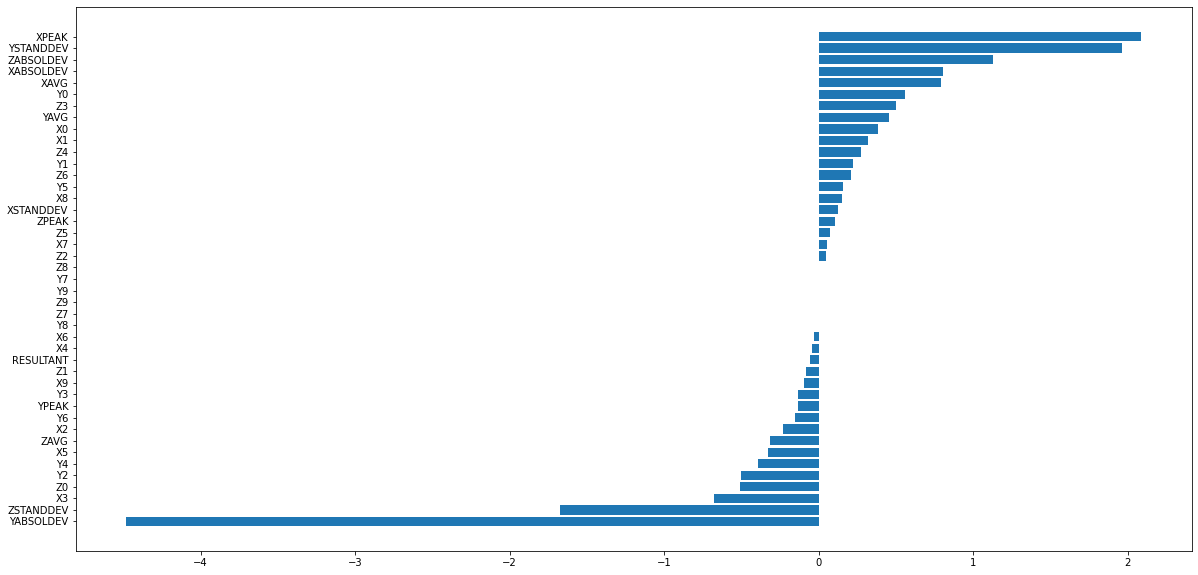

[[ 0  0  0  0  0  0  0  0  0  0  0  0 15  3  0  0  0  0]
 [16  0  1  0  0  0  0  0  0  0  0  0  2  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  8 10  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  5 13  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  3 15  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  5 13  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  3 13  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  5 13  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  5 13  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  6 12  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 17  1  0  0  0  0]
 [ 2  0  4  0  0  0  0  0  0  0  0  0 11  1  0  0  0  0]
 [11  0  1  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  8 10  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


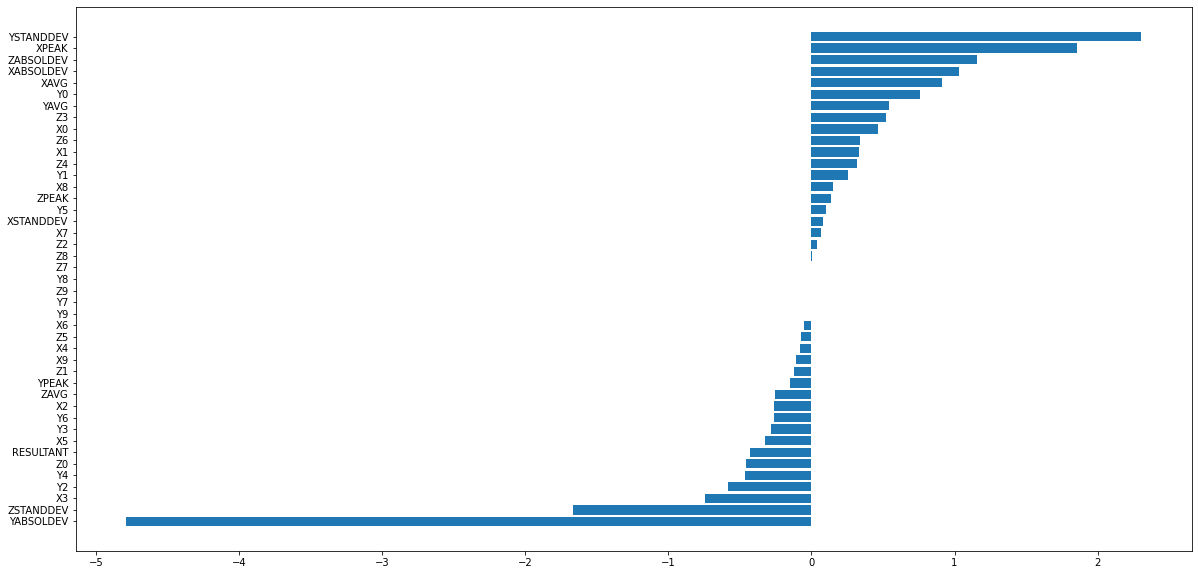

[[ 0  0  0  0  0  0  0  0  0  0  0  0  1 16  0  0  0  0]
 [ 1  0 11  0  0  0  0  0  0  0  0  0  5  1  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  3 14  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  0  0  0  0  2 13  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  1 16  0  0  0  0]
 [ 0  0 10  0  0  0  0  1  0  0  0  0  0  7  0  0  0  0]
 [ 0  0 11  0  0  0  0  0  0  0  0  0  6  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [ 0  0  0  0  0  0  0 12  0  1  0  0  3  2  0  0  0  0]
 [ 0  0  7  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


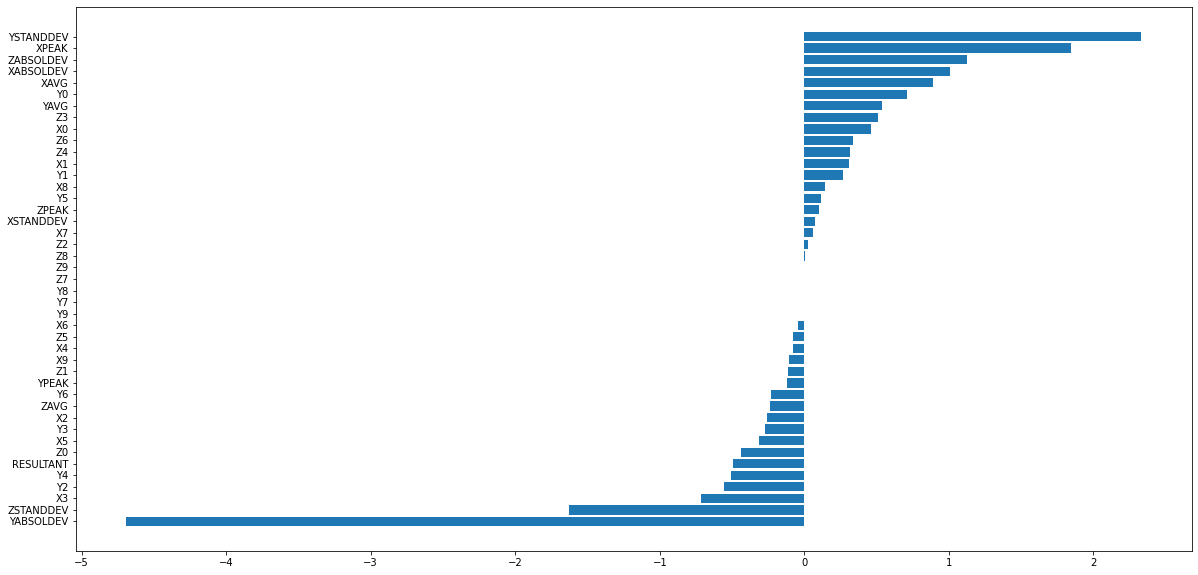

[[ 0  0  0  0  0  0  0  0  0  0  0  0  6 12  0  0  0  0]
 [ 7  0  5  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0]
 [ 0  0  3  0  0  0  0  0  0  0  0  0  7  8  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  1 16  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0 17  0  0  0  0]
 [ 0  0  1  0  0  0  0  3  0  0  0  0  0 14  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  1 16  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [ 0  0  9  0  0  0  0  1  0  0  0  0  0  9  0  0  0  0]
 [ 0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  7 10  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  4  0  0  2  8  0  0  0  0]
 [ 0  0 14  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


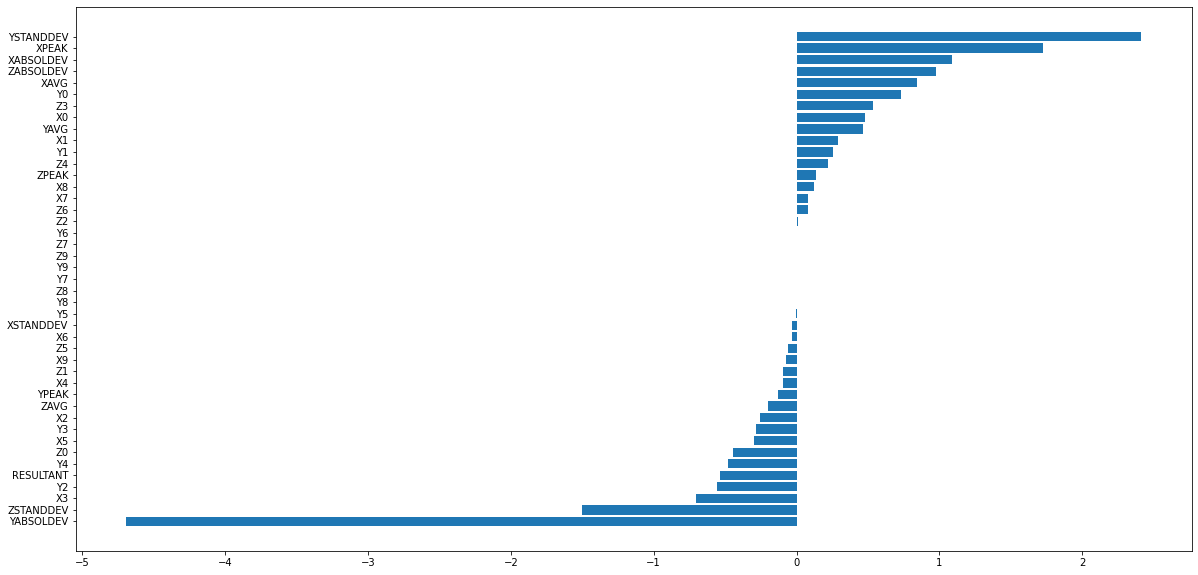

[[ 0  0  3  0  0  0  0  0  0  0  0  0 13 10  0  0  0  0]
 [ 0  0 11  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  0  0 16  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  7 11  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0 12  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  0  0  0  0  6  9  0  0  0  0]
 [ 0  0  0  0  0  0  0  4  0  0  0  0  3 11  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  9  9  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  0  0  0  0  2 13  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0 13  4  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  0  0  0 14  0  0  0  0  0]
 [ 0  0 15  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 17  1  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
#Loop for taking each dataset in sequence
for fileindex,filelist in enumerate(files):
    overall_acc_dic = {}    # overall accelerometer dictionary
    overall_precision_dic = {}   # overall precision dictionary
    overall_recall_dic = {}    # overall recall dictionary
    overall_f1_dic = {}  # for F1 score
    scaler = StandardScaler()  
    le = preprocessing.LabelEncoder()  
    data = pd.concat( [ pd.read_csv(csvfile) for csvfile in filelist ] )  
    print(data.shape)   # (23074, 93)
    
    #Get all the subject id list
    subject_id_list = list(set(data.loc[:, "class"]))
    print(subject_id_list) 
    
    accuracies = []
    
    #For each subject id and apply LOSO for that subject id
    for subject_id in subject_id_list:
        train_data = data[data["class"]!=subject_id]
        test_data = data[data["class"]==subject_id]

        #Select only the 43 features
        X1_train = train_data.loc[:, "X0":"ZSTANDDEV"]
        X2_train = train_data.loc[:, 'RESULTANT']   
        y_train = train_data.loc[:, "ACTIVITY"]
  


        X1_test = test_data.loc[:, "X0":"ZSTANDDEV"]
        X2_test = test_data.loc[:, 'RESULTANT']   
        y_test = test_data.loc[:, "ACTIVITY"]


        #Use np.column.stack to stack the 43 features
        X_train = np.column_stack((np.array(X1_train),np.array(X2_train)))
        X_train = scaler.fit_transform(X_train)
        X_test = np.column_stack((np.array(X1_test),np.array(X2_test)))
    

        y_train = le.fit_transform(y_train)
        le_name_mapping = dict(zip(le.transform(le.classes_),le.classes_))
        y_test = le.fit_transform(y_test)

        print("Subject ID %s:"% (subject_id))
        
        #Function to plot feature importance. Removed the code where we column stack only the features which was out put of this function
        svm_feature(X_train,y_train)

        #X_train,y_train = sklearn.utils.shuffle(X_train,y_train,random_state=0)
        
        #Hyperparameter search for the following paramters to train SVM. This is currectly commented as it takes more time


        #Commented the SVM training with hyperparameter search results
        #clf = svm.SVC(C=C_val, coef0=coef0_val, degree=degree_val, gamma=gamma_val, kernel=kernel_val)
        clf = svm.SVC(kernel='linear')

        clf.fit(X_train,y_train)

        y_pred = clf.predict(X_test)

        #Print the confusion matrix
        cf = sklearn.metrics.confusion_matrix(y_test, y_pred)
        print(cf)
        
        #print the classification report
        print(classification_report(y_test, y_pred))
        
        #Compute the score information for each activity
        labels=list(set(y_pred))
        label_acc_dic = {}
        label_precision_dic = {}
        label_recall_dic = {}
        label_f1_dic = {}
        i = 0
        for label in labels:
            TP, FP, FN, TN = calculate_cf(cf, i, to_print=True)
            decode_label = le_name_mapping[label]
            actual_class = activity_names[decode_label]
            label_acc_dic[decode_label] = ((TP+TN)/(TP+FP+FN+TN))*100
            if TP != 0:
                label_precision_dic[decode_label] = (TP)/(TP+FP)
                label_recall_dic[decode_label] = (TP)/(TP+FN)
                label_f1_dic[decode_label] = (TP)/(TP+ (0.5 *(FP+FN)))
            else:
                label_precision_dic[decode_label] = 0
                label_recall_dic[decode_label] = 0
                label_f1_dic[decode_label] = 0
            i +=1

        #Get the accuracy score for the LOSO validation for that subject ID
        acc = sklearn.metrics.accuracy_score(y_test, y_pred)
        accuracies.append((acc*100))
        
        #Print the accuracy, precision, recall and f1-measure for each acitivity
        print("Subject ID %s: %.2f%%"% (subject_id,(acc*100)))
        t = PrettyTable(['Class', 'Accuracy', 'Precision', 'Recall', 'F1-Measure'])
        for activity in dict(sorted(label_acc_dic.items())):
            t.add_row([activity_names[activity],str(str(round(label_acc_dic[activity],2))+"%"),round(label_precision_dic[activity],2),round(label_recall_dic[activity],2),round(label_f1_dic[activity],2)])
            #List the scores for each subject to find the overall scores
            if activity in overall_acc_dic:
                temp_acc_list = overall_acc_dic[activity]
                temp_pre_list = overall_precision_dic[activity]
                temp_re_list = overall_recall_dic[activity]
                temp_f1_list = overall_f1_dic[activity]
                overall_acc_dic[activity] = temp_acc_list + [round(label_acc_dic[activity],2)]
                overall_precision_dic[activity] = temp_pre_list + [round(label_precision_dic[activity],2)]
                overall_recall_dic[activity] = temp_re_list + [round(label_recall_dic[activity],2)]
                overall_f1_dic[activity] = temp_f1_list + [round(label_f1_dic[activity],2)]
            else:
                overall_acc_dic[activity] = [round(label_acc_dic[activity],2)]
                overall_precision_dic[activity] = [round(label_precision_dic[activity],2)]
                overall_recall_dic[activity] = [round(label_recall_dic[activity],2)]
                overall_f1_dic[activity] = [round(label_f1_dic[activity],2)]

        #Print the table of scores for each activity for a subject
        print(t)
    
    #Print Overall accuracy
    accuracy = sum(accuracies)/len(accuracies)
    print(accuracy)
    
    #Compute the average scores for overall subjects
    for key in overall_acc_dic:
        sum_acc_key = 0
        temp_list = overall_acc_dic[key]
        for i in temp_list:
            sum_acc_key += i
        if sum_acc_key != 0:
            overall_acc_dic[key] = round(sum_acc_key/len(temp_list),2)
        else:
            overall_acc_dic[key] = 0
    
    for key in overall_precision_dic:
        sum_precision_key = 0
        temp_list = overall_precision_dic[key]
        for i in temp_list:
            sum_precision_key += i
        if sum_precision_key != 0:
            overall_precision_dic[key] = round(sum_precision_key/len(temp_list),2)
        else:
            overall_precision_dic[key] = 0
    

    for key in overall_recall_dic:
        sum_recall_key = 0
        temp_list = overall_recall_dic[key]
        for i in temp_list:
            sum_recall_key += i
        if sum_recall_key != 0:
            overall_recall_dic[key] = round(sum_recall_key/len(temp_list),2)
        else:
            overall_recall_dic[key] = 0
    
    
    for key in overall_f1_dic:
        sum_f1_key = 0
        temp_list = overall_f1_dic[key]
        for i in temp_list:
            sum_f1_key += i
        if sum_f1_key != 0:
            overall_f1_dic[key] = round(sum_f1_key/len(temp_list),2)
        else:
            overall_f1_dic[key] = 0
    
    
    #Print the overall score for each acitivity
    print("Overall Score for %s"%file_dict[fileindex])
    to = PrettyTable(['Class', 'Accuracy', 'Precision', 'Recall', 'F1-Measure'])
    for activity in dict(sorted(label_acc_dic.items())):
        to.add_row([activity_names[activity],str(str(overall_acc_dic[activity])+"%"),overall_precision_dic[activity],overall_recall_dic[activity],overall_f1_dic[activity]])

    print(to)
    print("-----------------------------------------------------------------------------------------")
